## Data Scientists
- Walker Teotônio Correia de Barros
- Maria Luiza Leite dos Santos
- Benn Arthur de Souza Fonseca Amaral
- Kennyo Wescley Elias Cavalcante

## Introduction
This analysis aims to provide metrics that assist investors in making decisions in the business intelligence application domain

In [1]:
!pip install seaborn
!pip install scikit-learn
!pip install plotly

## Modules (Collections of database)

In [4]:
#Data Vizualizations
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Machine Learning Library
from sklearn.datasets import make_blobs # function to generate aleatory dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn

#Math and Linear Algebra
import numpy as np
from math import sqrt
from scipy.stats import variation
#Create DataFrames
import pandas as pd

#Anapy Modules
'''Anapy is a repository created to solve problems involving statistical measures in our solution.'''
from anapy import means
from anapy import setData
from anapy import measures

## Data

#### Available historical series 
http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/

Contains the historical quotation information regarding the trading of all market paper for a period of one year, sorted by the fields Record Type, Trade Date, BDI Code, Company Name and Trading Code


<blockquote>Those datas are from Bovespa, in October of the year 2022<blockquote>

## Pre-processing of data 

#### Stage 1 - Structuring

 

To obtain the necessary data for the sample analysis, it was necessary to use some data preprocessing techniques. Since our sample was derived from a txt file, and the columns were not named, this had to be done manually using the .columns attribute, and the values had to be adjusted with commas.

In [5]:
#this file is compressed in the datasets repository, 
#extract it before running this code snippet
arquivo_bovespa = 'https://raw.githubusercontent.com/data-science-ci/actions-price-analysis/main/datasets/COTAHIST_M102022.TXT' 


#Define the size of fields
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

# Read the data and receive two positional arguments, widhts who have the fields size and header = 0
dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)


# Name the columns
# Data structure available at http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Remove last line
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Adjust values with a comma (divide the values of these columns by 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]


##### Data types and name of columns
We used the info() method to check, for the columns we have, the data type for each of them, although some were not what we expected like date_pregao, which returned "object" instead of "date". However, we chose not to do this transformation, because when we made tests, the data type "object " had a better result with most of the numpy and pandas methods

In [7]:
## Get Variable information
dados_acoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tipo_registro                 181806 non-null  int64  
 1   data_pregao                   181806 non-null  object 
 2   cod_bdi                       181806 non-null  float64
 3   cod_negociacao                181806 non-null  object 
 4   tipo_mercado                  181806 non-null  int64  
 5   empresa                       181806 non-null  object 
 6   especificacao_papel           181806 non-null  object 
 7   prazo_dias_merc_termo         148349 non-null  float64
 8   moeda_referencia              181806 non-null  object 
 9   preco_abertura                181806 non-null  float64
 10  preco_maximo                  181806 non-null  float64
 11  preco_minimo                  181806 non-null  float64
 12  preco_medio                   181806 non-nul

#### Stage 2 - Remove Missing Data
During pre-processing, we also found data that did not make sense for analysis, or that were absurdly discrepant from the context of the application, probably caused by errors in the collection, so it was necessary to eliminate records that could cause problems in the measurements obtained

In [8]:
#Identify missing data
dados_acoes.isnull().sum()

tipo_registro                       0
data_pregao                         0
cod_bdi                             0
cod_negociacao                      0
tipo_mercado                        0
empresa                             0
especificacao_papel                 0
prazo_dias_merc_termo           33457
moeda_referencia                    0
preco_abertura                      0
preco_maximo                        0
preco_minimo                        0
preco_medio                         0
preco_ultimo_negocio                0
preco_melhor_oferta_compra          0
preco_melhor_oferta_venda           0
numero_negocios                     0
quantidade_papeis_negociados        0
volume_total_negociado              0
preco_exercicio                     0
ìndicador_correcao_precos           0
data_vencimento                     0
fator_cotacao                       0
preco_exercicio_pontos              0
codigo_isin                         0
num_distribuicao_papel              0
dtype: int64

In [9]:
## Removing missing data from df
dados_acoes = dados_acoes.dropna(axis=1)
dados_acoes.isnull().sum()

tipo_registro                   0
data_pregao                     0
cod_bdi                         0
cod_negociacao                  0
tipo_mercado                    0
empresa                         0
especificacao_papel             0
moeda_referencia                0
preco_abertura                  0
preco_maximo                    0
preco_minimo                    0
preco_medio                     0
preco_ultimo_negocio            0
preco_melhor_oferta_compra      0
preco_melhor_oferta_venda       0
numero_negocios                 0
quantidade_papeis_negociados    0
volume_total_negociado          0
preco_exercicio                 0
ìndicador_correcao_precos       0
data_vencimento                 0
fator_cotacao                   0
preco_exercicio_pontos          0
codigo_isin                     0
num_distribuicao_papel          0
dtype: int64

###### Anlysis of column "Indicadores de Correção de Preços"

{'mode': 0    0.0
Name: ìndicador_correcao_precos, dtype: float64, 'mean': 0.0, 'meadian': 0.0}


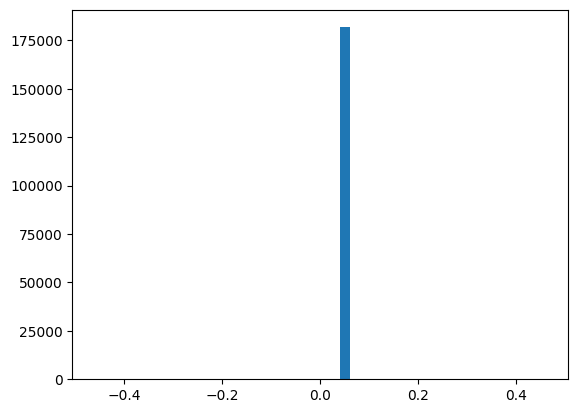

In [10]:
#There seems to be some noisy data here
plt.hist(x = dados_acoes["ìndicador_correcao_precos"], rwidth = 0.2)
indicador_correcao_precos = {
    "mode" : dados_acoes["ìndicador_correcao_precos"].mode() ,
    "mean" : dados_acoes["ìndicador_correcao_precos"].mean() ,
    "meadian" : dados_acoes["ìndicador_correcao_precos"].median()
}

## This column reveals nothing relevant
print(indicador_correcao_precos)

#Remove the column data_actions["price_correction_indicator"]
dados_acoes = dados_acoes.drop(["ìndicador_correcao_precos"], axis = "columns")

###### Analysis of column "preco_exercicio_pontos"

{'mode': 0    0.0
Name: preco_exercicio_pontos, dtype: float64, 'mean': 16459467.784341551, 'meadian': 0.0}


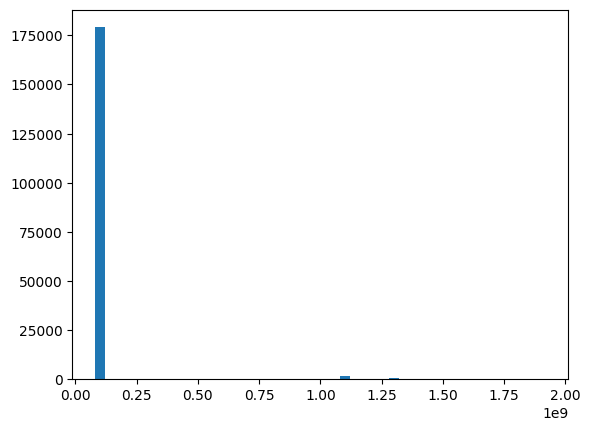

In [11]:
#There seems to be some noisy data here
plt.hist(x = dados_acoes["preco_exercicio_pontos"], rwidth = 0.2)
preco_exercicio_pontos = {
    "mode" : dados_acoes["preco_exercicio_pontos"].mode() ,
    "mean" : dados_acoes["preco_exercicio_pontos"].mean() ,
    "meadian" : dados_acoes["preco_exercicio_pontos"].median()
}
## This column reveals nothing relevant
print(preco_exercicio_pontos)
#Remove the column data_actions["price_correction_indicator"]
dados_acoes = dados_acoes.drop(["preco_exercicio_pontos"], axis = "columns")

#### Stage 3 - Sorting

In this case, we used the trading date to sort values 

In [12]:
#Sorts by dates of the last auctions for each record
dados_acoes = dados_acoes.sort_values(by=['data_pregao'])
dados_acoes

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
0                   1    20221003      2.0          ELMD3            10   
158385              1    20221003     82.0       VALEW731            80   
54388               1    20221003     78.0       BPACL266            70   
158374              1    20221003     82.0       VALEN780            80   
103762              1    20221003     82.0       NTCOW178            80   
...               ...         ...      ...            ...           ...   
58580               1    20221031     78.0       EGIEL418            70   
155990              1    20221031     78.0        VALEA92            70   
173714              1    20221031     78.0       BOVVK120            70   
41283               1    20221031     82.0       BBASX278            80   
37134               1    20221031     82.0       AMERX125            80   

            empresa especificacao_papel moeda_referencia  preco_abertura  \
0       ELETROMIDIA          ON      NM               R$           10.80   
158385    VALEE  FM          ON      NM               R$            2.90   
54388          BPAC          UNT     N2               R$            1.90   
158374        VALEE          ON      NM               R$            6.00   
103762        NTCOE          ON      NM               R$            3.25   
...             ...                 ...              ...             ...   
58580         EGIEE          ON      NM               R$            0.77   
155990         VALE          ON      NM               R$            4.22   
173714     BOVV  FM                  CI               R$            1.03   
41283         BBASE          ON      NM               R$            0.70   
37134         AMERE          ON      NM               R$            0.38   

        preco_maximo  ...  preco_melhor_oferta_compra  \
0              11.73  ...                       11.40   
158385          2.90  ...                        1.30   
54388           1.95  ...                        0.00   
158374          6.00  ...                        0.00   
103762          3.30  ...                        2.92   
...              ...  ...                         ...   
58580           1.19  ...                        0.00   
155990          5.02  ...                        0.00   
173714          1.03  ...                        0.00   
41283           0.70  ...                        0.30   
37134           0.40  ...                        0.01   

        preco_melhor_oferta_venda  numero_negocios  \
0                           11.44            680.0   
158385                       2.85             41.0   
54388                        0.00              2.0   
158374                       0.00              1.0   
103762                       0.00              5.0   
...                           ...              ...   
58580                        0.00              6.0   
155990                       0.00            153.0   
173714                       0.00              1.0   
41283                        0.88              1.0   
37134                        0.33              7.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
0                           216300.0               2469914.0             0.00   
158385                      110300.0                237538.0            69.84   
54388                         1500.0                  2900.0            26.60   
158374                         500.0                  3000.0            74.66   
103762                       21700.0                 70780.0            17.87   
...                              ...                     ...              ...   
58580                         4600.0                  3724.0            41.09   
155990                       32200.0                135846.0            70.41   
173714                           0.0                     1.0           120.00   
41283                          200.0              

#### > Those columns won't be usefull for data analysis, that's why we'll be removing it from the dataset

In [13]:
dados_acoes.drop(["moeda_referencia"], axis=1, inplace=True) 
dados_acoes.drop(["fator_cotacao"], axis=1, inplace=True)

#### > Narrow the data by company

In [14]:
#return a Series containing counts of unique values
x = dados_acoes["empresa"].value_counts()

In [15]:
x

PETRE           10027
VALEE            6220
PETR             4858
BBASE            3892
MGLUE            3198
                ...  
YUM BRANDS          1
PULTEGROUP I        1
PROCORE TECH        1
EXPEDIA GROU        1
JP DV USMID         1
Name: empresa, Length: 2176, dtype: int64

##### >> In this case: PETRE

In [16]:
#empresa1 is an object that represents the company Petrobrás
empresa_1 = dados_acoes[dados_acoes["empresa"] == "PETRE"]

## How are the prices of Petrobrás latest trades centered?

#### First the price data of the last trades will be allocated to a one-dimensional Series object 

In [17]:
#Get the last business price  of PETRE
PETRE_last_value = empresa_1["preco_ultimo_negocio"]
#get data as an numpy array 
PETRE_arr = np.array(PETRE_last_value)
type(PETRE_last_value)
type(PETRE_arr)

#Sort price of PETRE's last trades
PETRE_arr.sort()
print(PETRE_arr)

[1.000e-02 1.000e-02 1.000e-02 ... 4.877e+01 4.927e+01 4.977e+01]


In [18]:
PETRE_last_value.describe()

count    10027.000000
mean         4.105726
std          5.729424
min          0.010000
25%          0.240000
50%          1.700000
75%          5.750000
max         49.770000
Name: preco_ultimo_negocio, dtype: float64

#### The "central_tendency_measures" dictionary contains data on the measures of central tendency of the Series in question

- In this case the object of the series is about "Petrobras", but we can use this same idea to get information about other investment possibilities

- We have own module to get statics about an company as a dict : get_central_tendency_measures(<|series|>)

- To use it, first is needed set meta_data of who company and who column should be used, by using set_meta_data method()

In [19]:
petre_meta_data = setData.set_meta_data(dados_acoes , "PETRE", "preco_ultimo_negocio")
type(petre_meta_data)

dict

- Now we can use get_central_tendency_measures by using petre_meta_data as argument

In [20]:
petre_statics = measures.get_central_tendency_measures(petre_meta_data["column"])

#Is the same thing of:

```
central_tendency_measures = {
    "mean": PETRE_last_value.mean(),
    "mode": PETRE_last_value.mode(dropna = True),
    "median": PETRE_last_value.median(), 
    "max": PETRE_last_value.max(),
    "min": PETRE_last_value.min(),
}
pd.Series(central_tendency_measures)
```


The same process can be maked for any company and to get variability measures processing an amount of data in just two simple steps

In [21]:
companies = dados_acoes["empresa"].unique()
print(type(companies[0]))
print(len(companies))

#object to store central tendency values
companies_data_tc = {}
#object to store variability measures
companies_data_vm = {}
for i in range(0 , len(companies)-1):
    companie = setData.set_meta_data(dados_acoes , companies[i] , "preco_ultimo_negocio")
    companies_data_tc[companies[i]] = measures.get_central_tendency_measures(companie["column"])
    companies_data_vm[companies[i]] = measures.get_variability_measures(companie["column"])


<class 'str'>
2176
[12.4  11.41 11.59 11.66 11.52 11.55 11.54 12.02 12.2  12.34 11.8  11.68
 12.03 12.01 13.02 13.06 13.5  13.25 13.73 13.58 14.08 13.79 13.96 13.85
 13.7  13.75 13.53 13.3  13.9  13.28 13.38 12.9  12.93 13.03 11.74 11.86
 11.74 11.97 11.65 12.   12.03]
[4.5  1.95 2.18 1.68 4.05 5.49 4.4  4.06 2.06 4.64 4.85 0.83 1.66 1.25
 0.99 0.5  0.32 0.54 0.65 3.71 3.36 5.73 2.55 1.23 1.41 2.6  1.09 2.97
 3.37 2.95 1.56 1.23 2.04 0.79 0.6  4.54 1.01 3.7  0.49 0.39 0.34 2.19
 3.28 2.81 1.01 1.79 2.47 1.17 1.44 3.26 3.89 4.42 4.8  4.15 5.22 3.76
 3.51 1.6  0.94 1.69 4.29 2.7  3.25 2.11 2.43 1.65 1.53 1.9  2.38 1.2
 0.93 2.33 0.59 0.76 0.55 0.46 2.65 1.28 1.06 3.83 4.13 4.48 3.54 4.89
 5.23 5.48 1.69 3.23 2.09 4.2  5.28 4.42 4.25 4.98 5.81 5.25 6.35 2.99
 2.39 5.65 3.67 0.69 0.55 3.56 1.13 1.86 1.49 0.9  3.13 1.8  2.81 2.43
 3.86 4.84 1.51 1.68 4.88 4.21 4.45 5.64 5.99 2.03 2.54 1.27 1.66 1.
 3.24 3.68 0.65 0.78 0.49 2.67 2.38 1.99 3.09 4.74 3.5  3.97 2.65 4.21
 3.3  3.76 2.47 2.84 4.

[8.000e-02 5.000e-01 8.000e-02 1.600e+00 1.220e+00 1.010e+00 7.300e-01
 5.400e-01 4.700e-01 4.100e-01 3.500e-01 1.790e+00 1.220e+00 2.040e+00
 6.000e-02 1.000e-01 4.400e-01 9.000e-02 1.200e-01 1.780e+00 1.800e+00
 1.460e+00 1.050e+00 7.800e-01 3.500e-01 2.500e-01 6.500e-01 1.700e-01
 1.520e+00 4.070e+00 3.900e-01 1.760e+00 5.900e-01 4.800e-01 2.300e-01
 3.100e-01 6.700e-01 7.900e-01 3.300e-01 4.100e-01 5.000e-01 1.520e+00
 3.100e-01 3.000e-01 1.360e+00 6.000e-02 3.000e-02 3.100e-01 9.000e-01
 6.000e-02 5.100e-01 7.000e-02 1.300e-01 1.770e+00 1.290e+00 1.100e+00
 1.550e+00 9.000e-02 1.700e-01 8.500e-01 6.200e-01 2.100e-01 4.600e-01
 2.900e+00 1.300e-01 7.000e-02 1.980e+00 5.900e-01 3.800e-01 1.450e+00
 1.290e+00 3.800e-01 6.800e-01 8.600e-01 4.000e-02 9.400e-01 2.400e-01
 1.470e+00 3.700e-01 2.500e-01 1.800e-01 2.040e+00 4.000e-01 1.100e+00
 1.000e-01 6.000e-02 3.300e-01 6.600e-01 1.500e-01 1.280e+00 2.500e-01
 7.000e-02 8.000e-02 5.500e-01 1.930e+00 1.440e+00 4.400e-01 1.320e+00
 3.900

[0.16 0.07 0.02 0.11 0.04 0.22 0.49 0.01 0.01 0.01 0.02 0.12 0.02 0.02
 0.01 0.05 0.64 0.15 0.48 0.23 0.07 0.01 0.01 0.03 0.01 0.01 0.19 0.01
 0.06 0.01 0.01 0.07 0.01 0.01 0.14 0.02 0.34 0.06 0.01 0.09 0.02 0.5
 0.09 0.01 0.06 0.57 0.03 0.02 0.41 0.2  0.1  0.03 0.02 0.01 0.05 0.02
 0.01 0.05 0.01 0.01 0.01 0.08 0.13 0.02 0.01 0.02 0.01 0.01 0.01 0.01
 0.01 0.02 0.1  0.11 0.01 0.01 0.01 0.03 0.01 0.17 0.01 0.01 0.27 0.21
 0.01 0.14 0.05 0.06 0.03 0.15 0.01 0.01 0.03 0.02 0.16 0.1  0.01 0.01
 0.15 0.01 0.01 0.02 0.03 0.01 0.01 0.01 0.04 0.56 0.05 0.03 0.02 0.01
 0.01 0.01 0.3  0.01 0.01 0.01 0.1  0.26 0.16 0.01 0.01 0.01 0.11 0.08
 0.01 0.05 0.18 0.25 0.01 0.01 0.43 0.01 0.15 0.01 0.01 0.01 0.01 0.07
 0.09 0.02 0.5  0.45 0.15 0.01 0.03 0.02 0.01 0.15 0.18 0.23 0.32 0.4
 0.11 0.01 0.01 0.04 0.01 0.05 0.06 0.01 0.15 0.62 0.46 0.03 0.19 0.01
 0.01 0.48 0.11 0.19 0.01 0.12 0.01 0.01 0.01 0.35 0.18 0.02 0.01 0.01
 0.15 0.05 0.01 0.14 0.01 0.02 0.03 0.03 0.14 0.04 0.09 0.51 0.01 0.11
 0.02 0.

[ 0.18  0.3   0.23  3.46  2.23  6.1   2.43  8.    5.    1.8   1.73  0.64
  0.73  0.58  0.17  0.06  0.15  1.59  0.08  0.08  0.82  0.38  0.35  0.49
  1.45  1.59  1.23  0.89  1.05  0.1   0.22  0.14  0.56  0.3   0.42  1.41
  3.4   3.6   8.15  3.65 12.59  2.6   3.56  4.55  4.04  3.49  3.25  0.2
  4.4   5.03  5.3   2.25  3.05  1.7   1.45  3.62  7.12  2.81  3.5   4.
  4.7  10.7   2.5   0.08  0.15  0.6   0.22  0.07  0.06  0.15  0.06  0.68
  0.82  2.3   0.28  0.46  0.44  0.39  2.5   0.45 10.8   2.6   1.57  7.
  0.2   0.3   0.2   0.85  2.59  0.78  3.17  0.78  3.59  0.19  2.9   1.42
  6.22  4.38  3.98  3.4   2.51  1.56  1.9   4.4   5.15  3.    5.58  5.35
  4.34  3.6   2.93  2.45  1.25  2.03  3.5   1.03  0.83  0.6   0.49  0.44
  0.14  0.1 ]
[2.32 2.4  0.93 0.57 0.37 0.24 1.05 1.85 1.59 1.24 2.88 2.75 1.96 0.71
 2.23 4.53 3.65 1.76 3.02 0.49 2.31 1.45 0.8  2.35 3.87 3.64 2.16 0.73
 0.41 1.3  2.46 1.99 2.85 1.2  0.56 4.4  2.79 2.34 3.49 0.9  2.65 2.74
 1.67 2.79 1.01 2.85 3.63 0.69 4.53 2.85 4.08 2.

[1.000e-01 9.500e-01 1.510e+00 9.500e-01 8.900e-01 1.400e-01 7.000e-02
 2.700e+00 1.710e+00 2.770e+00 9.000e-02 1.230e+00 1.000e-01 1.500e-01
 9.000e-02 8.000e-02 4.000e-02 4.000e-02 6.000e-02 2.390e+00 1.730e+00
 6.000e-02 9.000e-02 1.300e+00 2.300e-01 2.320e+00 1.450e+00 3.050e+00
 3.000e-02 1.000e-01 1.100e+00 2.040e+00 8.500e-01 3.500e-01 3.000e-02
 1.050e+00 4.000e-02 4.000e-02 2.300e-01 1.120e+00 2.000e-01 6.400e-01
 2.000e-01 8.400e-01 9.000e-02 1.200e-01 2.600e-01 4.500e-01 1.000e-02
 1.000e-02 2.400e-01 1.200e-01 7.000e-02 1.000e-02 1.100e+00 1.550e+00
 9.300e-01 2.200e-01 2.000e-02 8.400e-01 1.800e+00 2.000e-02 9.000e-02
 1.200e+00 1.700e-01 4.200e-01 2.500e-01 2.070e+00 2.100e-01 3.000e-01
 3.600e-01 2.000e-02 7.000e-02 1.930e+00 4.000e-02 3.000e-02 2.670e+00
 2.000e-02 1.100e-01 1.000e-01 8.000e-02 3.920e+00 4.000e-02 6.250e+00
 2.000e-01 1.810e+00 1.300e-01 7.000e-02 6.200e-01 5.200e-01 4.000e-02
 3.590e+00 1.470e+00 2.250e+00 1.800e-01 3.500e-01 1.300e-01 8.000e-02
 6.000

[2.000e-01 6.500e-01 4.200e-01 5.100e-01 3.400e-01 1.100e-01 7.000e-02
 8.900e-01 2.200e-01 5.900e-01 8.000e-01 9.000e-01 7.000e-01 1.280e+00
 7.300e-01 1.200e+00 5.000e-02 1.900e-01 7.000e-02 3.000e-02 5.000e-02
 8.800e-01 4.020e+00 6.400e-01 4.500e-01 6.500e-01 4.700e-01 2.000e-02
 3.000e-02 7.000e-02 6.000e-02 6.900e-01 1.100e-01 2.300e-01 1.000e-02
 2.100e+00 4.600e-01 2.250e+00 2.100e-01 7.900e-01 7.100e-01 7.500e-01
 9.100e-01 6.000e-01 5.200e-01 1.000e-02 9.600e-01 2.300e-01 4.800e-01
 2.800e-01 3.600e-01 8.000e-02 6.100e-01 2.000e-02 5.000e-02 6.000e-02
 6.000e-02 7.100e-01 7.000e-02 8.000e-02 6.700e-01 5.000e-02 1.500e-01
 1.300e-01 1.600e-01 3.000e-01 4.500e-01 2.700e-01 3.000e+00 9.000e-02
 7.000e-02 6.800e-01 6.100e-01 2.000e-02 5.000e-02 8.900e-01 3.100e-01
 1.000e-02 9.200e-01 5.200e-01 2.800e-01 6.900e-01 2.500e-01 5.000e-01
 2.550e+00 3.400e-01 7.000e-01 2.000e-02 2.000e-02 6.000e-02 7.000e-01
 8.000e-02 2.000e-01 1.300e-01 1.000e-01 7.000e-02 3.800e-01 3.700e-01
 8.000

[0.2  0.25 0.33 0.29 0.16 0.21 0.01 0.28 0.08 0.3  0.32 0.08 0.25 0.29
 0.39 0.21 0.2  0.21 0.4  0.5  0.26 0.39 0.26]
[7.60e-01 2.00e+00 1.00e+00 1.40e-01 2.00e-01 3.00e-02 1.00e-02 6.00e-02
 9.00e-02 6.00e-02 5.00e-02 1.30e-01 4.00e-02 1.55e+00 3.00e-01 2.30e-01
 3.60e-01 8.20e-01 2.30e-01 6.50e-01 5.40e-01 4.20e-01 1.70e-01 9.00e-02
 1.60e-01 9.00e-02 1.25e+00 6.00e+00 1.08e+00 1.86e+00 2.50e+00 2.00e-01
 1.60e-01 1.72e+00 3.60e-01 2.40e-01 1.00e-01 1.00e-02 1.30e-01 4.80e-01
 4.10e-01 2.00e-02 1.00e-02 2.00e-02 4.00e-02 7.00e-02 4.00e-02 1.00e-02
 3.00e-02 7.00e-02 9.00e-02 8.00e-02 6.00e-02 7.00e-02 7.00e-02 7.80e-01
 1.70e-01 5.80e+00 1.43e+00 1.40e-01 9.40e-01 9.00e-02 7.00e-01 1.50e+00
 7.00e-02 5.00e-02 6.00e-02 6.00e-02 2.94e+00 1.00e-01 1.58e+00 5.00e-02
 5.00e-02 3.00e-02 3.00e-02 4.40e-01 9.00e-02 4.00e-01 5.00e+00 1.00e-01
 1.60e-01 7.80e-01 1.30e-01 1.10e-01 2.30e-01 2.00e-01 3.70e-01 2.80e-01
 3.00e-01 3.00e-02 1.00e+00 8.50e-01 2.00e-02 3.00e-02 2.00e-02 2.00e-02
 2.00e

[1.00e-01 5.50e-01 1.40e+00 1.38e+00 1.46e+00 6.00e-02 4.00e-02 2.50e-01
 2.10e-01 1.10e-01 2.69e+00 8.10e-01 6.90e-01 3.00e-01 5.00e-01 2.00e-02
 1.71e+00 4.10e-01 9.60e-01 7.90e-01 5.20e-01 6.50e-01 2.10e+00 1.69e+00
 3.40e+00 3.00e-02 2.00e-02 1.00e-02 2.25e+00 3.60e-01 2.50e-01 1.70e-01
 2.10e-01 2.00e-01 2.50e-01 1.80e+00 4.70e-01 2.80e-01 9.60e-01 4.00e+00
 1.10e+00 9.40e-01 6.00e-01 7.80e-01 4.40e-01 2.70e-01 2.70e-01 2.30e+00
 3.31e+00 3.90e+00 1.99e+00 2.37e+00 4.40e-01 2.00e-02 2.77e+00 5.00e-01
 2.00e-01 1.70e-01 8.00e-02 5.00e-02 2.37e+00 2.57e+00 2.47e+00 2.30e+00
 5.00e-01 6.90e-01 6.00e-01 3.00e-01 2.08e+00 2.36e+00 7.60e-01 1.09e+00
 7.00e-02 3.80e+00 1.40e-01 1.45e+00 5.50e-01 5.20e-01 3.90e-01 1.90e-01
 1.62e+00 1.26e+00 1.93e+00 5.10e-01 9.90e-01 4.00e-02 2.00e-02 4.00e-02
 2.60e-01 4.10e-01 3.30e-01 5.50e-01 4.00e-02 1.68e+00 1.54e+00 2.00e-02
 2.00e-02 2.00e-02 3.70e-01 4.50e-01 3.00e-01 2.50e-01 2.00e-02 1.49e+00
 7.10e-01 5.30e-01 1.25e+00 2.60e-01 9.00e-01 2.10e

[  1.94   0.65   6.     7.52   5.     1.2    4.     3.     0.56   0.63
   2.12   1.62 108.   110.   112.   114.   116.   118.   120.     9.08
  11.15   0.55   0.8    0.4 ]
[0.5  1.15 5.16 3.21 4.22 1.48 0.34 0.72 2.36 1.46 0.15 1.06 0.35 0.26
 0.2  0.17 0.05 1.45 0.67 3.29 0.23 0.12 0.13 0.8  0.34 0.25 1.25 0.8
 0.7  0.3  1.61 1.   3.75 0.9  0.8  3.8  2.72 1.67 1.27 2.66 0.45 0.23
 0.63 0.2  0.04 2.17 1.7  1.   0.25 0.52 1.08 1.82 1.59 0.86 6.75 0.34
 0.31 0.52 0.24 1.6  1.3  0.05 0.05 0.12 0.34 0.25 0.1  0.59 1.35 1.59
 0.25 0.35 0.22 0.35 1.15 2.25 0.98 2.28 5.39 0.95 2.14 0.49 0.18 0.23
 0.8  0.7  0.99 0.5  0.72 0.26 1.38 2.22 0.55 0.09 0.09 0.14 0.01 0.37
 0.22 0.14 1.93 1.75 0.99 0.44 0.25 0.12]
[2.81 2.81 0.1  2.15 0.24 2.78 0.17 0.01 0.62 0.08 0.07 0.2  2.3  2.89
 0.08 0.05 0.14 2.3  0.41 0.08 0.05 0.09 0.17 0.06 0.07 0.6  3.91 0.15
 1.07 0.01 0.01 0.11 0.04 0.35 0.2  7.64 7.84 8.04 0.11 0.15 2.61 0.21
 2.12 2.74 0.09 3.28 0.15 0.05 3.36 0.12]
[1.20e-01 3.70e+00 8.90e-01 1.00e+0

[6.3100e+02 3.8830e+03 1.4490e+03 1.7500e+03 4.8970e+03 3.4070e+03
 4.2870e+03 3.6000e+01 5.0000e+01 3.6200e+02 1.5300e+02 9.0000e+01
 2.2010e+03 1.1000e+02 1.1700e+04 9.2700e+02 5.3200e+03 1.2000e+02
 3.1500e+02 2.3700e+03 1.0755e+04 3.6000e+02 9.2800e+02 8.7400e+02
 1.7000e+02 1.1000e+03 3.3130e+03 2.9700e+03 3.7610e+03 1.0000e+01
 3.1000e+03 1.3730e+03 3.2500e+02 2.6050e+03 4.1800e+02 3.2900e+02
 8.9000e+02 5.9420e+03 1.3000e+02 6.4360e+03 1.1500e+04 2.3330e+03
 2.0300e+03 1.7760e+03 2.3160e+03 2.1500e+02 4.7000e+03 4.4600e+02
 6.7400e+02 1.8100e+03 5.4200e+02 2.8840e+03 6.7600e+02 3.9740e+03
 1.5600e+03 3.5600e+03 9.6000e+02 8.6300e+03 4.2700e+02 5.0400e+02
 3.5900e+02 5.3100e+02 1.5000e+02 1.0000e+02 6.9320e+03 6.1520e+03
 8.7000e+02 1.3000e+04 5.2140e+03 3.6500e+02 8.0000e+03 1.0000e+01
 1.2900e+03 9.8700e+02 3.1600e+02 1.0740e+03 2.9000e+01 7.5600e+02
 1.0000e+00 6.9000e+02 1.1000e+02 1.5500e+02 6.1900e+02 1.5000e+01
 1.2610e+03 4.6300e+02 2.0000e+00 2.0600e+02 4.9570e+03 2.1350

[0.1  0.2  0.28 0.12 0.25 0.3  0.1  0.06 0.28 0.06 0.1  0.07 0.12 0.13
 0.28 0.18 0.05 0.07 0.16 0.06 0.21 0.03 0.02 0.16 0.08 0.15 0.02 0.09
 0.28 0.02 0.17 0.13 0.14 0.19 0.03 0.13 0.24 2.7  2.6  0.15 0.33 0.07
 0.02 0.15 0.13 0.02 0.06 0.1  0.08 0.06 0.1  0.05 0.07 0.03 0.1  0.06
 0.3  0.02 0.05 0.1 ]
[0.07 0.35 0.66 0.55 0.41 0.29 0.23 0.15 0.43 0.23 0.1  0.09 0.27 0.67
 0.27 0.06 0.06 0.05 0.08 0.1  0.14 0.88 0.04 0.21 0.02 0.04 0.72 0.25
 1.19 0.14 0.06 0.01 0.21 0.01 0.65 0.01 0.05 0.01 0.05 0.14 0.04 0.01
 0.02 0.11 0.23 0.86 0.75 0.01 0.05 0.17 0.05 1.   0.87 0.01 0.06 0.01
 0.23 0.21 0.1  0.05 0.15 0.04 0.15 0.08 0.26 0.21 0.25 0.08 0.3  0.02
 0.07 0.05 0.22 0.21 0.02 0.04 0.08 0.95 0.1  0.3  0.41 0.17 0.31 0.03
 0.21 0.12 0.7  0.01 0.01 0.01 0.02 0.24 6.   7.   0.8  6.6  7.2  7.4
 0.18 1.28 0.01 0.04 0.02 0.51 0.15 0.15 0.23 0.04 0.3  0.15 0.24 0.09
 0.1  0.33 0.07 0.06 0.04 0.32 0.12 0.11 0.24 0.08 0.41 0.2  0.15 0.04
 0.1  0.09 0.04 0.04 0.1  0.2  0.09 0.27 0.13 0.35 0.37 

[0.7  3.95 3.7  ... 0.04 1.4  0.28]
[3.00e-01 1.60e-01 1.47e+00 1.28e+00 1.04e+00 8.20e-01 5.00e-01 3.30e-01
 6.60e-01 9.30e-01 4.40e-01 3.10e+00 3.68e+00 4.64e+00 4.90e-01 3.80e-01
 2.50e-01 3.50e+00 1.30e+00 2.50e+00 5.20e-01 3.10e-01 1.30e+00 9.00e-02
 2.80e+00 2.06e+00 2.00e-01 4.00e-01 3.00e-01 2.15e+00 2.50e-01 1.10e-01
 1.70e-01 1.64e+00 2.05e+00 2.03e+00 2.20e-01 1.80e-01 4.00e+00 7.90e-01
 4.80e-01 4.30e-01 3.30e-01 2.00e-01 2.40e-01 1.92e+00 4.90e-01 8.00e-02
 3.35e+00 4.00e+00 3.43e+00 1.66e+00 1.70e-01 4.30e-01 2.90e+00 1.00e+00
 1.77e+00 3.52e+00 1.67e+00 9.00e-02 2.00e-02 3.30e-01 5.50e-01 1.98e+00
 3.90e-01 1.70e+00 2.40e+00 2.80e+00 5.32e+00 4.80e+00 1.10e-01 1.40e-01
 4.10e-01 2.11e+00 3.50e-01 1.00e-02 5.55e+00 4.60e+00 2.90e+00 1.82e+00
 1.90e+00 3.05e+00 3.57e+00 1.18e+00 1.50e+00 1.84e+00 3.70e-01 1.63e+00
 3.00e-02 2.42e+00 3.10e+00 3.91e+00 3.70e-01 5.50e-01 1.20e+00 1.33e+00
 2.00e+00 2.00e-01 1.50e+00 8.00e-02 1.90e-01 3.40e-01 2.86e+00 5.10e-01
 3.50e-01 1.67e

[0.05 0.57 0.39 0.93 0.13 0.07 0.28 0.5  0.24 0.79 0.25 0.75 0.05 0.1
 0.5  0.23 0.38 0.5  0.23 0.81 0.33 0.11 0.05 0.23 0.63 0.52 0.71 0.47
 0.92 0.31 0.15 0.35 0.07 0.64 1.06 0.06 0.04 0.82 0.15 0.43 0.2  0.32
 0.45 0.69 0.79 0.53 1.05 0.33 0.18 0.19 0.46 0.86 0.04 0.06 0.17 0.28
 0.93 0.33 0.1  0.04 0.83 0.02 0.62 0.41 0.89 0.05 0.4  0.14 0.55 1.08
 0.29 0.68 0.02 0.04 0.01 0.18 0.96 0.34 0.81 0.13 0.23 0.54 0.28 0.48
 1.08 1.   0.54 0.75 0.73 1.33 0.3  0.74 0.51 1.49 0.75 1.25 1.07 0.52
 1.   1.35 0.16 0.28 0.98 1.29 0.36 0.47 1.06 0.72 0.99 0.43 0.64 0.26
 0.19 0.32 0.94 0.47 0.65 1.12 0.72 0.45 0.36 0.21 0.89 1.24 0.57 1.47
 0.4  0.68 0.75 0.45 0.16 0.27 1.05 1.28 0.34 0.48 0.95 0.75 1.03 0.61
 0.5  0.81 1.1  0.3  1.49 0.37 0.18 1.07 0.25 0.12 0.2  0.5  0.78 0.33
 0.39 0.76 0.51 0.5  0.34 0.76 1.   0.82 0.18 0.54 0.32 0.61 0.84 0.92
 0.63 0.41 0.24 1.15 0.42 0.44 0.3  0.67 0.91 0.2  0.65 0.38 0.22 0.1 ]
[0.08 1.55 4.36 ... 0.59 0.09 0.4 ]
[0.02 0.11 0.04 0.03 0.6  0.16 0.03 0.02 

[0.13 0.35 0.55 0.15 0.15 4.54 3.66 0.22 2.39 1.06 4.12 0.28 0.01 0.12
 1.4  0.04 0.31 0.21 0.18 2.29 2.68 3.06 3.95 1.91 0.25 0.28 1.4  0.14
 1.5  1.81 0.62 1.32 1.6  2.32 2.06 0.84 2.   1.35 0.62 1.4  2.15 0.09
 1.7  1.2  0.7  0.22 0.23 2.55 2.65 1.1  0.08 0.11 0.23 0.33 0.15 0.05
 1.35 1.   1.6  1.7  0.07 0.11 0.06 0.4  1.8  0.21 1.4  0.17 1.85 5.29
 1.5  0.94 4.89 1.3  0.4 ]
[0.43 0.73 0.22 0.17 0.5  0.22 0.27 0.68 0.52 0.28 0.4  0.56 0.22 0.65
 0.53 0.23 0.61 0.75 0.7  0.83 0.7  0.62 0.48 0.21 0.91 1.33 1.03 0.81
 1.4  0.8  0.57 0.99 0.28 0.88 0.63 0.51 0.4  0.66 0.51]
[4.80e-01 4.10e-01 2.60e-01 6.20e-01 8.10e-01 1.15e+00 5.10e-01 4.00e-01
 2.50e-01 5.00e-02 2.00e-01 7.60e-01 2.60e-01 2.60e-01 2.42e+00 1.48e+00
 1.00e-01 7.10e-01 8.00e-01 1.00e-01 5.70e-01 6.00e-01 4.90e-01 5.50e-01
 1.20e-01 1.26e+00 3.90e-01 3.90e-01 1.65e+00 2.33e+00 1.22e+00 7.50e-01
 8.50e-01 3.50e-01 1.55e+00 3.00e-01 1.00e-01 6.00e-01 1.20e+00 3.30e-01
 2.00e-02 1.45e+00 1.00e-01 1.56e+00 1.88e+00 9.20e-01

[1.10e-01 3.40e-01 4.10e-01 3.87e+00 2.00e-01 5.13e+00 1.30e-01 6.00e-02
 3.70e+00 1.80e-01 2.20e+00 4.50e-01 4.60e-01 5.90e-01 2.00e-02 1.00e-01
 2.10e-01 5.00e-02 2.50e-01 5.00e-02 3.13e+00 1.13e+00 3.20e+00 6.00e-02
 2.00e-02 3.60e-01 3.00e-01 6.00e-02 1.08e+00 7.00e-02 4.70e-01 6.00e-02
 4.20e-01 4.00e-02 1.20e+00 1.12e+00 4.00e-01 2.10e-01 5.60e-01 2.70e-01
 7.00e-02 5.30e+00 1.00e-02 1.00e-02 3.50e-01 7.00e-02 5.90e-01 7.60e-01
 3.80e-01 2.00e-02 3.80e-01 5.00e-02 7.70e-01 6.70e-01 2.40e-01 3.00e-02
 1.91e+00 3.20e-01 7.10e-01 6.00e-02 1.50e-01 7.10e-01 3.30e-01 2.20e-01
 2.00e-02 7.00e-02 3.30e-01 1.00e-02 6.00e-02 2.20e-01 3.00e-02 5.00e-02
 3.40e-01 5.50e-01 1.00e-01 1.65e+00 3.00e-02 3.40e+00 6.30e-01 4.00e-02
 7.00e-02 1.50e-01 3.20e-01 2.40e-01 9.60e-01 4.50e-01 9.00e-02 1.30e-01
 3.90e-01 3.00e-01 5.00e-01 5.53e+00 3.00e-01 1.00e-02 2.00e-01 1.67e+00
 3.63e+00 5.80e-01 4.60e-01 7.00e-01 3.00e-02 6.00e-02 7.70e-01 9.50e-01
 1.62e+00 5.80e-01 7.00e-01 2.50e-01 5.70e-01 3.00e

[5.000e-01 1.880e+00 2.000e-02 1.600e+00 1.040e+00 1.140e+00 3.150e+00
 1.300e-01 2.800e-01 2.000e-02 1.520e+00 1.060e+00 6.500e-01 1.000e-02
 3.400e+00 8.400e-01 1.100e+00 1.380e+00 9.300e-01 9.000e-02 3.400e-01
 5.700e-01 1.790e+00 2.000e-02 1.730e+00 3.000e-01 1.090e+00 1.250e+00
 1.450e+00 6.700e-01 2.020e+00 5.000e-02 3.980e+00 1.500e+00 3.270e+00
 2.490e+00 9.600e-01 1.220e+00 8.000e-01 8.000e-01 2.060e+00 9.500e-01
 7.800e-01 3.000e-02 1.100e+00 1.240e+00 1.740e+00 1.600e+00 3.330e+00
 2.750e+00 2.300e+00 1.640e+00 8.000e-02 2.450e+00 9.300e-01 3.150e+00
 4.900e-01 2.800e-01 1.400e+00 1.500e+00 1.550e+00 1.000e-02 1.000e+00
 2.540e+00 1.050e+00 2.200e-01 1.340e+00 2.390e+00 1.440e+00 2.570e+00
 1.820e+00 1.000e-02 1.100e-01 6.600e-01 1.590e+00 1.960e+00 7.100e-01
 1.780e+00 1.200e+00 1.900e-01 4.900e-01 9.700e-01 1.000e-01 1.070e+00
 1.200e-01 1.000e-02 3.290e+00 2.180e+00 1.870e+00 1.200e+00 1.140e+00
 9.400e+00 1.030e+00 1.230e+00 9.500e-01 8.400e-01 1.000e-02 1.560e+00
 8.000

[2.70e-01 1.93e+00 2.90e+00 1.50e-01 3.50e-01 1.17e+00 3.10e-01 9.40e-01
 7.60e-01 4.10e-01 6.00e-01 6.00e-02 7.00e-02 2.90e+00 4.00e-01 1.80e-01
 1.70e-01 1.10e-01 5.20e+00 1.00e-02 4.00e-02 7.00e-02 4.00e-02 2.80e-01
 1.60e-01 1.72e+00 1.30e-01 2.30e-01 5.00e-02 3.00e-02 2.00e-02 2.00e-02
 2.10e-01 5.00e-02 8.00e-02 1.64e+00 4.20e-01 4.10e-01 5.20e-01 1.50e+00
 1.70e-01 1.63e+00 2.00e-02 1.50e-01 3.00e-02 5.00e-02 8.00e-02 9.00e-02
 1.00e-02 6.00e-02 1.58e+00 1.50e+00 2.50e-01 3.50e-01 4.50e-01 5.60e-01
 1.90e+00 1.50e-01 1.63e+00 2.70e-01 7.00e-02 2.30e-01 3.20e-01 5.70e-01
 4.60e-01 5.00e-02 5.00e-02 4.00e-02 1.00e-01 2.00e-02 2.00e-02 4.70e-01
 7.80e-01 7.56e+00 2.00e-02 6.00e-02 5.00e-02 1.10e-01 5.00e-02 4.80e-01
 1.00e-01 1.60e-01 2.00e-01 2.50e-01 4.90e-01 3.70e-01 1.20e-01 8.00e-01
 1.50e-01 2.00e-02 1.10e-01 2.10e+00 4.80e-01 5.00e-02 4.00e-02 3.00e-02
 5.00e-02 2.60e-01 3.70e-01 5.70e-01 2.07e+00 1.40e-01 3.00e-02 9.70e-01
 3.00e-02 1.00e-02 1.00e-02 2.00e-02 1.50e+00 4.00e

[0.03 2.82 0.22 ... 0.41 0.02 0.03]
[0.09 0.37 0.15 0.4  0.04 0.46 0.27 0.2  0.13 0.48 2.   0.7  1.89 0.13
 0.16 1.89 1.9  2.07 0.11 0.16 1.82 0.38 1.86 1.94 0.11 1.39 0.12 0.12
 0.12 0.44 0.8  0.75 0.17 0.4  1.   0.65 0.12 0.14 0.18 0.61 0.18 0.31
 0.08 0.16 0.29 0.1  0.16 0.43 1.85 0.86 1.06 1.75 0.48 0.03 0.14 0.05
 0.22 0.11 0.07 2.21 0.12 0.41 1.73 0.61 1.65 1.55 0.12 0.5  0.78 0.34
 0.17 0.05 0.03 0.43 0.17 0.15 0.13 0.02 0.02 1.9  0.17 0.38 0.1  1.
 0.8  0.09 1.82 0.72 1.3  0.1  0.4  0.09 0.02 8.8  0.39 0.55 0.74 1.01
 1.2  1.37 3.19 6.8  6.4  5.6  5.8  6.   6.2  0.01 0.01 0.01 0.07 0.08
 0.06 0.08 0.11 0.72 0.15 0.16 0.22 0.17 0.15 0.13 0.12 0.06 0.2  0.47
 0.12 0.11 0.12 0.1  0.15 0.6  0.03 0.01]
[0.02 0.25 1.4  0.34 0.07 0.11 0.11 0.14 0.1  0.17 1.1  0.07 0.05 0.05
 0.02 0.06 1.   0.02 0.19 1.4  0.19 0.11 0.01 0.03 0.05 0.01 0.79 0.1
 1.   0.94 0.04 0.01 0.01 0.01 0.01 0.01 0.02 0.01 0.1  0.91 0.03 0.01
 1.3  0.01 1.   0.89 0.05 0.01 0.02 0.01 0.05 0.04 0.02 0.15 0.08 1.42
 0

[1.200e+00 3.100e-01 2.300e-01 4.300e-01 1.000e-02 1.300e-01 3.000e-02
 9.000e-01 8.000e-01 4.300e-01 1.900e-01 9.000e-01 8.000e-02 1.000e-02
 1.300e+00 1.420e+00 1.300e-01 2.000e-01 2.000e-02 8.000e-01 2.500e-01
 1.000e+00 3.800e+00 1.900e-01 1.200e+00 5.400e-01 1.540e+00 2.800e-01
 8.000e-02 1.940e+00 2.300e-01 3.900e-01 1.010e+00 5.000e-02 2.300e-01
 3.800e-01 1.600e-01 1.800e+00 3.000e-01 1.500e-01 3.000e-02 4.500e-01
 1.600e-01 6.000e-02 1.500e-01 1.000e-02 2.500e-01 8.200e-01 8.000e-01
 4.000e-01 7.500e-01 3.400e-01 4.000e-01 2.300e-01 7.300e-01 4.800e-01
 1.300e-01 1.000e-01 2.400e-01 4.200e-01 2.600e-01 4.300e-01 9.000e-01
 3.000e-01 4.300e-01 3.700e-01 3.000e-01 7.900e-01 2.000e-02 8.000e-02
 5.000e-01 1.100e-01 1.000e-01 9.000e-02 7.800e-01 1.600e-01 6.000e-02
 9.000e-02 3.200e-01 1.000e-01 1.000e-02 2.000e-02 1.300e-01 8.500e-01
 3.200e-01 5.600e-01 2.000e-02 1.000e-02 8.000e-02 1.000e-02 9.500e-01
 1.200e+00 1.400e-01 1.450e+00 3.000e-02 3.200e-01 5.900e-01 2.900e-01
 6.600

[0.15 0.2  0.25 0.12 0.08 0.26 0.16 0.2  0.14 0.09 0.29 0.12 0.1  0.14
 0.34 0.07 0.2  0.13 0.07 0.13 0.07 0.1  0.22 0.14 0.28 0.08 0.24 0.1
 0.1  0.54 0.62 0.09 0.22 0.35 0.28 0.09 0.04 0.34 0.11 0.23 0.15 0.2
 0.29 0.76 0.1  1.61 1.   0.07 0.17 1.86 0.34 0.09 0.6  0.65 0.44 0.05
 0.35 0.65 0.84 0.09 0.14 3.3  3.6  3.9  0.82 0.07 0.19 0.13 0.24 0.71
 0.85 0.07 0.19 0.25 0.71 0.55 0.07 0.18 0.34 0.56 0.22 0.43 0.81 0.04
 2.1  0.34 0.53 0.08 0.43 0.19 0.12 0.28 0.37]
[8.17 8.24 8.04 8.   7.94 7.88 7.81 7.79 8.32 8.16 7.99 8.2  8.13 7.93
 7.92 8.4  8.65 8.49 8.44 8.45 8.71 8.5  9.06 8.24 8.11 8.15 8.31 8.02
 8.23 8.47 8.61 8.05 8.13 7.95 7.86 7.95 8.33 8.33 7.95 8.04 7.95 7.75
 8.1  7.76 7.53 7.6  8.24 7.78 8.02 7.35 7.36 7.68 7.45 7.92 7.42 7.36
 7.84 7.54 7.37 7.14 7.14 7.43 7.76 7.22 7.33 7.36 7.29 7.19 7.13 7.21
 7.36 7.38 7.29 8.11 7.1  7.12 7.35 7.36 7.68 7.12 7.19 7.4  7.32 7.28
 7.24 7.3  7.53 7.78 7.26 7.75 7.71 7.66 7.94 7.88 7.78 7.84 7.86 7.68]
[1.18 2.27 2.67 2.29 0.62 0.43 

[4.440e+00 1.500e+00 5.800e-01 8.000e-02 2.900e-01 1.550e+00 1.350e+00
 5.000e-02 9.500e-01 1.700e-01 1.000e+00 2.750e+00 2.300e+00 2.320e+00
 1.090e+00 9.700e-01 1.250e+01 5.750e+00 3.100e+00 3.250e+00 8.000e-02
 9.400e-01 2.000e-02 1.000e-02 4.000e-02 5.000e-02 2.200e-01 1.500e-01
 1.000e+00 3.000e-02 8.900e-01 1.150e+00 5.000e-02 1.310e+00 5.400e+00
 1.670e+00 3.650e+00 3.200e+00 1.210e+00 2.670e+00 1.950e+00 4.900e-01
 4.900e+00 5.950e+00 6.160e+00 5.200e+00 9.330e+00 2.670e+00 1.160e+00
 1.780e+00 1.500e+00 4.600e+00 3.530e+00 8.000e-02 2.800e-01 6.000e-02
 1.000e+00 2.000e-02 3.000e-02 4.000e-02 2.800e-01 2.000e-02 4.300e-01
 6.000e-02 1.000e-01 2.380e+00 1.060e+00 3.000e+00 2.390e+00 1.280e+00
 1.440e+00 6.180e+00 3.400e+00 4.120e+00 6.200e-01 6.000e-02 1.740e+00
 1.600e-01 8.800e-01 2.000e-02 2.300e-01 1.500e+00 2.000e-02 1.000e-02
 6.000e-02 7.700e-01 2.950e+00 1.000e-02 2.870e+00 4.000e-01 1.600e+00
 2.000e-01 4.700e-01 6.260e+00 3.200e-01 6.100e+00 2.080e+00 1.570e+00
 7.700

[1.11 1.73 1.75 2.17 1.4  0.42 0.7  1.1  1.49 1.46 0.91 0.67 1.76 1.26
 1.17 2.18 0.96 1.2  1.14 0.54 0.64 0.52 0.49 0.99 0.9  0.38 1.38 0.98
 0.74 1.28 0.75 0.79 0.38 0.25 0.16 0.74 0.87 0.4  0.54 0.77 1.05 0.26
 0.4  0.16 1.32 0.76 0.99 0.53 1.46 1.2  0.62 1.37 0.27 0.43 0.82 0.93
 0.81 0.44 1.11 0.56 1.05 1.52 1.22 0.6  0.42 0.73 0.55 1.24 0.92 0.21
 1.14 1.5  0.5  0.36 0.5  0.59 1.37 0.76 0.98 1.72 0.59 1.12 0.47 1.06
 0.9  0.66 0.89 0.65 1.47 1.04 0.88 1.56 0.3  0.52 0.76 1.47 0.5  1.92
 1.42 0.77 1.15 1.18 0.7  1.51 1.15 0.74 0.32 0.74 0.27 0.38 0.7  0.11
 0.16 0.43 0.29 0.45 0.94 1.   0.53 0.63 0.17 1.12 0.37 0.35 0.51 0.46
 0.38 0.76 1.03 0.6  0.8  0.81 1.28 0.56 0.33 0.41 0.24 0.24 0.14 0.4
 0.95 0.63 0.62 0.85 0.22 0.14 0.09 0.39 0.13 0.25 0.54 0.21 0.28 0.55
 0.83 0.85 0.61 0.23 0.31 0.53 0.44 0.39 0.63 0.33 1.37 0.64 0.51 0.46
 0.76 0.42 0.92 0.57 0.75 0.63 0.31 1.15 0.69 0.94 1.22 0.85 1.11 0.28
 0.31 1.14 0.52 1.32 0.66 0.88 0.35 0.62 0.95 0.72 0.78 0.28 0.97 0.78
 0.43 0

[0.48 2.5  0.08 0.25 0.46 0.74 0.04 0.05 0.18 0.05 0.46 0.68 0.24 2.2
 1.1  0.11 0.03 7.6  3.05 0.67 0.44 0.31 0.12 2.47 0.14 1.6  0.06 0.79
 0.27 1.08 0.35 0.81 2.9  3.6  4.15 0.2  1.76 2.25 2.36 0.39 0.04 3.86
 0.89 0.26 1.23 1.25 1.24 5.83 0.01 2.22 0.7  0.33 0.1  6.12 0.03 0.08
 0.08 4.2  1.49 1.18 0.04 0.56 0.31 1.42 0.05 0.32 2.43 0.95 0.48 0.38
 2.3  1.34 4.41 1.21 5.15 1.61 1.14 0.76 0.6  0.16 3.37 1.1  1.4  2.51
 1.92 0.23 1.97 0.18 0.24 0.02 0.03 0.32 0.04 0.03 4.93 0.05 0.02 0.09
 0.12 0.14 0.07 2.01 0.21 1.61 0.18 4.32 0.3  0.37 0.05 0.01 0.93 0.57
 0.9  1.07 1.35 0.99 0.03 1.   0.05 1.82 1.27 0.99 0.63 0.06 0.4  0.02
 0.05 0.89 0.48 0.37 0.13 0.41 0.06 2.35 0.17 1.57 0.11 0.12 0.02 0.15
 0.2  0.04 0.02 0.03 0.26 0.04 5.36 0.2  0.03 0.22 2.4  0.87 1.11 1.62
 0.23 0.11 2.75 0.05 0.68 0.23 0.99 0.29 0.33 2.45 0.4  0.63 0.08 0.11
 0.01 6.02 1.18 3.65 3.57 0.14 1.81 2.64 0.3  0.43 5.88 0.79 0.19 1.45
 0.95 0.46 0.07 0.03 0.07 0.07 0.49 2.2  5.14 0.03 0.03 1.21 1.74 4.65
 3.8  0

[1.   0.23 0.97 0.61 0.36 1.47 1.13 0.87 0.64 0.09 0.16 0.98 0.33 0.53
 0.4  0.74 1.02 1.3  0.53 0.2  0.09 1.51 0.39 0.74 0.95 1.09 0.87 0.42
 0.62 0.56 1.02 0.57 0.39 0.08 0.15 0.41 1.04 0.6  0.08 1.   0.36 0.55
 0.82 1.43 1.1  0.11 0.63 0.77 0.61 0.81 1.52 0.98 0.32 1.25 0.15 0.47
 0.82 0.12 0.53 0.8  1.03 1.39 0.24 0.37 0.52 0.86 1.33 0.94 0.38 1.25
 0.78 0.08 0.17 1.76 0.81 0.5  0.95 1.28 0.07 0.15 1.32 0.81 0.35 0.37
 0.52 1.11 1.4  1.74 1.03 1.74 1.35 0.79 0.79 0.39 0.87 0.7  1.47 1.15
 1.07 0.59 1.65 1.06 0.82 0.38 0.64 1.1  0.8  0.56 1.36 0.25 0.39 0.82
 1.1  1.7  1.08 0.89 1.47 0.64 0.51 1.43 0.71 1.17 1.61 0.41 0.25 1.22
 0.91 0.62 0.86 0.68 1.02 1.48 1.12 0.57 0.37 2.03 1.4  0.95 0.82 1.44
 1.13 1.48 0.4  0.57 0.87 0.65 1.19 1.79 0.73 1.18 0.3  0.85 1.4  0.5
 0.63 0.92 1.17 1.81 0.22 0.56 1.1  0.78 0.5  1.26 0.9  0.49 0.43 0.98
 1.32 1.92 0.66 0.9  1.24 1.55 1.05 1.6  0.43 0.67 0.47 0.17 0.3  1.32
 0.82]
[0.74 0.42 0.33 0.14 0.44 0.92 0.5  0.95 0.61 0.37 0.2  0.75 0.6  1.04


[0.32 0.52 0.08 0.5  0.33 0.24 0.41 0.4  0.11 0.48 0.04 1.   0.5  0.08
 0.9  0.29 0.26 0.08 0.07 0.85 0.4  0.4  1.   0.07]
[2.35 0.1  0.25 0.28 0.21 0.31 0.1  0.29 0.16 0.36 0.21 0.28 0.36 1.3
 0.4  0.42 0.12 0.44 1.55 0.35 0.3  1.45 0.1  7.   8.   6.   0.05 0.21
 0.25 0.17 0.2  0.58 0.28 0.32 0.31 0.29 0.38 0.64 1.8  0.15 0.19 0.23
 0.23 0.36 0.18 0.17 0.24 1.03]
[0.05 0.8  0.02 0.02 0.02 0.09 1.15 1.3  1.5  0.9  0.68 0.35 0.06 1.2
 0.38 0.19 0.01 0.51 0.21 0.16 0.44 0.05 0.02 0.06 0.27 0.05 0.2  0.84
 0.1  2.92 1.28 0.71 1.13 0.1  0.05 0.03 0.4  0.18 0.01 0.02 0.02 0.02
 0.02 0.02 0.04 0.11 1.7  1.66 0.12 0.94 0.36 1.29 0.04 0.08]
[0.04 0.19 0.05 0.1  0.01 0.04 0.09 0.16 0.14 0.21 0.08 0.01 0.02 0.04
 0.16 0.05 0.06 0.1  0.17 0.16 0.13 0.07 0.1  0.05 0.02 0.01 0.23 0.09
 0.31 0.22 0.16 0.14 0.1  0.17 0.03 0.05 0.1  0.1  0.13 0.2  0.02 0.14
 0.04 0.08 0.02 0.12 0.01 0.05 0.03 0.09 0.15 0.01 0.08 0.08 0.03 0.02
 0.02 0.15 0.11 0.08 0.06 0.02 0.03 0.02 0.04 0.14 0.09 0.06 0.12 0.03
 0.1

[1.57 2.82 2.65 2.54 2.1  2.62 1.58 1.75 1.29 1.16 0.74 1.04 1.43 1.72
 0.88 0.59 0.18 0.29 0.38 0.57 0.69 0.37 1.36 0.19 0.84 1.11 0.1  0.07
 0.08 0.19 0.52 0.45 0.62 0.8  1.01 0.47 1.26 0.75 0.48 0.65 0.84 1.04
 0.37 0.09 0.2  1.58 1.31 1.55 1.86 0.12 0.24 0.62 0.92 0.41 0.78 0.99
 1.23 0.8  1.08 1.63 1.34 0.71 0.4  0.23 0.15 0.55 0.73 1.18 0.17 0.13
 0.3  0.94 0.94 1.12 0.71 0.09 0.49 0.41 0.05 0.81 1.48 1.7  1.02 0.74
 1.56 1.28 2.11 1.82 0.98 1.5  1.61 0.79 1.28 1.33 2.07 1.78 1.46 1.23
 1.56 1.25 0.78 1.   0.99 1.18 1.51 2.08 1.94 0.77 1.52 1.23 1.38 1.98
 2.26 2.56 1.15 2.03 1.68 1.6  0.88 1.13 1.72 1.96 0.68 1.56 1.32 2.27
 1.41 1.93 0.89 1.02 1.09 1.46 1.64 0.47 0.6  0.82 1.33 1.5  1.78 1.11
 0.8  0.77 0.39 1.23 0.99 0.6  1.11 1.82 1.54 2.67 1.66 2.09 2.36 2.17
 1.93 1.23 0.9  0.7  1.44 1.67 1.04 1.45 1.12 1.97 1.19 0.92 2.05 1.9
 2.36 1.57 1.89]
[1.340e+00 3.800e-01 4.300e-01 1.200e+00 1.520e+00 1.520e+00 5.000e-01
 2.500e-01 1.450e+00 1.200e+00 1.595e+01 8.670e+00 2.150e+00 

[8.700e-01 1.910e+00 2.200e+00 7.400e-01 5.100e-01 6.900e-01 9.500e-01
 2.100e-01 9.100e-01 1.310e+00 2.950e+00 5.300e+00 6.550e+00 8.300e+00
 1.090e+00 2.030e+00 4.800e+00 6.100e-01 1.530e+00 1.720e+00 6.800e-01
 2.370e+00 2.100e-01 1.500e-01 4.400e-01 6.200e-01 9.000e-02 7.600e-01
 3.000e+00 1.980e+00 2.340e+00 7.100e-01 9.000e-02 2.600e+00 1.470e+00
 8.300e-01 1.170e+00 9.000e-01 1.750e+00 8.000e-02 9.000e-02 5.000e-02
 3.000e-01 4.400e-01 3.100e-01 1.410e+00 2.000e+00 6.000e-02 5.900e-01
 4.900e-01 3.000e-01 9.900e-01 1.700e-01 3.500e-01 2.000e+00 5.000e-02
 4.300e-01 1.590e+00 5.000e-02 3.400e-01 1.900e+00 2.500e-01 1.550e+00
 1.340e+00 2.000e-02 6.000e-02 5.000e-02 5.300e-01 4.600e-01 6.200e-01
 4.000e-01 1.900e-01 1.700e+00 3.600e-01 3.800e-01 1.600e-01 2.400e-01
 2.700e+00 5.500e-01 5.800e-01 1.640e+00 3.010e+00 2.550e+00 4.000e-02
 4.000e-02 4.000e-01 1.000e-01 3.000e-02 9.000e-02 1.600e-01 5.800e-01
 1.000e-02 2.000e-02 4.800e-01 8.000e-01 3.100e+00 2.400e-01 3.000e-02
 3.000

[20.53  3.72  3.76 17.97  3.52  3.69 18.47  3.7   3.5  18.42  4.18  3.65
  3.45 17.97  3.42  3.62 18.01  3.41 17.89  3.64 18.32 18.17 17.8   3.64
  3.43 17.78  3.62  3.45 18.17 17.74  3.41  3.63  3.61 17.7   3.41 17.82
 18.21  3.43 17.7   3.62  3.67  3.42 17.94  3.77 17.9   3.42  3.66  3.62
  3.36 17.66  3.38 17.61  3.61  3.69  3.94  3.6   4.1   3.6   3.35 17.63
 17.72  3.37  3.61  3.37 17.5   3.33  3.59  3.58  3.31 17.45  3.35 17.73
  3.63  3.64 17.86  3.39 18.13  3.66  3.35 17.75 17.93  3.37  3.68 18.01
 19.22 17.96  3.37  3.69  3.39 17.87  3.7   3.67  3.4  18.05  3.64  3.32
 18.04 19.43 18.57 18.7   3.85  3.7   3.93  3.71  3.44 18.34  3.47 18.3
  3.7   3.8   3.55 18.95  3.78  3.55 19.    3.79 18.6   3.52 19.85 19.09
 18.57  3.51  3.75  3.68  3.71  3.46 18.37  3.71  3.44 18.33 18.65  3.51
  3.79  3.49  3.83 18.86 19.32  3.85  3.56 19.    3.86  3.84  3.56 19.16
  3.85  3.85  4.03  3.92 19.1   3.53  3.85 19.14  3.53  3.85]
[0.12 0.27 0.32 0.09 0.06 0.13 0.17 0.23 0.21 0.29 0.07 0.14 0.

[0.46 1.25 0.65 1.46 0.9  1.64 0.35 0.62 1.07 0.63 0.27 0.51 1.01 0.35
 0.75 0.6  0.76 0.41 0.45 0.22 0.38 0.89 0.1  0.71 0.57 0.98 0.74 0.78
 0.22 0.5  0.17 0.37 1.27 0.68 0.6  0.72 0.84 1.42 1.11 0.73 0.91 0.32
 0.31 0.99 0.62 0.14 0.7  0.67 1.02]
[0.37 0.35 0.22 0.07 0.41 0.27 0.63 0.7  0.35 0.19 0.08 0.34 0.47 0.34
 0.1  0.21 0.76 0.21 0.4  0.56 0.36 0.22 0.81 0.57 0.11 0.41 0.53 0.86
 0.3  0.75 0.45 0.18 0.66 0.92 1.01 0.5  0.71 0.21 0.09 0.31 0.45 0.81
 0.56 0.87 0.61 0.38 0.21 0.08 1.15 0.17 0.45 0.68 0.26 0.26 0.75 0.27
 0.63 0.39 0.37 0.25 0.51 0.7  0.22 0.36 0.53 0.52 0.23 0.53 0.35 0.75
 0.25 0.26 0.39 0.23 0.35 0.17 0.36 0.35 0.36 0.6  0.21 0.25 0.13 0.48
 0.21 0.57 0.4  0.22 0.12 0.55 0.37 0.45 0.53 0.82 0.89 0.22 0.48 0.97
 0.38 0.27 0.4  0.45 0.28 0.15 0.59 0.55 0.38 0.22 0.4  0.09 0.22 0.42
 0.18 0.06 0.13 0.13 0.13 0.55]
[0.16 0.31 0.01 0.13 0.43 0.12 0.14 0.05 0.23 0.1  0.37 0.14 0.03 0.04
 0.08 0.55 0.55 0.01 0.17 0.09 0.19 0.01 0.02 0.25 0.1  0.02 0.01 0.2
 0.02 0.0

[1.   2.17 1.73 1.46 1.22 1.22 0.93 0.74 0.48 0.42 1.01 1.28 1.06 0.86
 1.54 0.78 0.52 0.4  0.32 0.26 0.38 0.56 1.1  0.77 0.91 1.39 1.24 0.78
 0.5  0.63 0.17 0.26 0.17 0.98 0.78 0.6  1.18 0.42 0.73 1.58 0.88 1.04
 0.08 0.26 0.53 0.79 1.51 0.18 0.29 0.95 0.64 0.36 1.27 1.05 0.76 1.35
 0.96 0.27 0.55 0.16 0.85 1.45 0.07 1.33 0.86 1.06 0.4  0.12 0.22 0.91
 1.5  0.7  1.13 1.81 1.65 1.35 1.21 1.33 1.62 1.62 0.63 0.79 1.21 1.05
 1.44 1.3  1.55 0.61 0.79 1.   1.19 1.13 0.69 0.99 1.88 1.22 1.41 1.06
 1.67 1.34 2.2  1.67 1.98 2.05 2.   0.58 1.25 0.97 0.74 2.09 1.78 1.52
 1.49 1.02 1.45 0.85 1.11 0.8  0.68 0.5  1.21 0.36 0.83 0.29 0.58 0.39
 1.24 1.15 0.68 0.67 1.39 1.74 1.55 1.1  1.35 2.07 2.4  0.74 1.01 1.7
 1.33 0.63 0.92 2.04 0.68 1.32 1.58 1.65 1.09 0.89]
[6.19 6.53 5.86 6.09 5.91 6.   6.42 6.15 6.26 6.17 6.38 6.38 6.24 6.35
 6.29 6.16 6.14 6.15 6.23 6.31 5.86 6.1  6.11 5.9  5.91 6.03 6.09 6.24
 5.95 6.09 6.06 6.13 6.08 6.   6.17 6.07 6.17 6.1  6.06 6.14 6.   6.11
 5.74 5.8  6.05 5.69 5.68 

[ 0.44  0.98  0.4   0.2   1.    1.03  0.63  0.16  1.11  1.25  0.64  0.34
  0.35  0.31  2.5   0.88  0.68  0.58  0.5   0.4   0.8   0.2   0.23  0.72
  0.55  2.25  0.43  1.4  19.   20.5   1.98  0.4   0.17  0.82  1.15  0.45]
[0.52 1.5  1.55 2.15 1.15 0.57 0.43 0.29 0.97 1.34 2.05 0.84 1.25 0.67
 0.19 0.45 1.   1.74 1.03 0.81 0.54 0.27 0.96 0.93 0.83 0.16 0.71 0.65
 0.39 1.02 0.58 0.99 0.77 0.2  0.2  0.93 0.53 0.15 0.02 0.1  0.77 0.44
 1.05 1.3  1.1  1.02 0.96 0.53 1.1  1.07 0.49 2.35 0.35 0.53 0.96 1.17
 0.3  0.27 0.44 0.73 0.45 0.49 0.27 0.35 1.07 1.63 1.01 0.52 0.26 0.65]
[0.04 0.1  0.06 0.05 0.02 0.08 0.07 0.1  0.04 0.03 0.02 0.1  0.06 0.02
 0.13 0.08 0.01 0.08 0.04 0.04 0.01 0.07 0.1  0.08 0.04 0.07 0.03 0.1
 0.03 0.07 0.11 0.04 0.19 0.07 0.04 0.07 0.04 0.12 0.05 0.04 0.1  0.09
 0.15 0.04 0.09 0.02 0.15 0.2  0.14 0.08 0.04 0.12 0.09 0.08 0.06 0.03
 0.15 0.1  0.06 0.04 0.16 0.14 0.11 0.04 0.08 0.14 0.16 0.21 0.25 0.1
 0.17 0.05 0.07 0.12 0.04 0.11 0.17 0.03 0.18 0.02 0.08 0.11 0.06 0.04


[0.06 0.22 0.11 0.05 0.07 0.1  0.75 0.09 0.1  0.12 0.06 0.18 0.79 0.21
 0.07 0.03 0.75 0.17 0.03 0.42 0.05 0.67 0.15 0.11 0.01 0.02 0.69 0.5
 0.07 0.12 0.02 0.01 0.01 0.01 0.07 0.46 0.67 0.15 0.01 0.53 0.06 0.44
 0.44 0.25 0.02 0.12 0.63 0.21 0.6  0.06 0.44 0.05 0.21 0.11 0.51 0.11
 0.05 0.19 0.05 0.09 0.36 0.05 0.4  0.44 0.6  0.24 0.4  0.14 0.09 0.24
 0.08 0.4  0.44 0.6  0.1  0.17 0.14 0.41 0.09 0.45 0.05]
[0.83 0.95 0.74 0.37 0.48 0.67 0.58 0.29 0.32 0.62 0.44 0.84 0.95 0.61
 0.55 0.35 0.44 0.85 0.22 0.45 0.65 0.95 0.73 0.58 0.31 0.25 0.64 0.53
 0.42 0.83 0.58 0.4  0.22 0.24 0.17 0.47 0.45 0.65 0.34 0.67 0.6  0.55
 0.41 0.28 0.39 0.13 0.56 0.08 0.11 0.18 0.15 0.37 0.29 0.42 0.11 0.3
 0.2  0.14 0.5  0.55 0.39 0.11 0.09 0.3  0.32 0.4  0.44 0.87 0.85 0.62
 0.54 0.76 0.53 0.7  0.56 0.85 0.41 0.85 0.42 0.47 0.76 0.57 0.7  0.67
 0.86 0.63 0.7  0.52 0.61 0.41 0.46 0.47 0.38 0.57 0.51 0.22 0.49 0.35
 0.54 0.56 0.63 0.28 0.7  0.5  0.63 0.45 0.5  0.35 0.77 0.43 0.65 0.4
 0.42 0.52 0.33 0.7  0.

[2.650e+00 1.080e+00 7.900e-01 1.115e+01 3.200e-01 8.000e-01 9.300e-01
 3.800e-01 2.010e+00 2.310e+00 2.000e-02 5.900e-01 6.600e-01 3.870e+00
 4.220e+00 4.380e+00 7.000e-02 1.500e-01 2.700e+00 1.400e+00 1.570e+00
 2.800e-01 7.100e+00 2.900e-01 1.800e+00 4.700e-01 3.600e-01 2.200e-01
 1.200e-01 5.600e-01 7.100e-01 1.000e-02 4.440e+00 4.500e-01 4.080e+00
 8.800e-01 2.700e+00 2.800e-01 1.310e+00 8.400e-01 8.500e-01 2.200e-01
 3.600e-01 4.500e-01 5.000e-01 1.490e+00 1.920e+00 1.950e+00 4.000e-01
 8.850e+00 3.000e+00 3.000e-02 1.210e+00 1.050e+00 2.210e+00 7.800e-01
 1.700e-01 1.100e+00 1.210e+00 3.600e-01 1.720e+00 1.550e+00 3.450e+00
 4.410e+00 5.000e-02 8.400e-01 1.300e-01 2.100e-01 3.000e+00 1.110e+00
 3.200e-01 3.500e-01 5.000e-01 6.800e-01 2.200e+00 5.900e-01 1.660e+00
 4.980e+00 4.050e+00 5.200e-01 3.300e+00 1.640e+00 3.200e-01 1.090e+00
 1.280e+00 5.200e+00 4.700e-01 1.600e-01 1.100e-01 9.050e+00 4.200e-01
 6.200e-01 3.800e-01 3.630e+00 1.420e+00 8.700e-01 3.580e+00 1.180e+00
 1.600

[0.49 0.3  0.24 0.51 0.62 0.8 ]
[11.34 12.09 17.78 11.96 12.15 17.94 11.91 12.98 11.3  17.44 11.31 11.38
 11.74 17.16 16.73 11.05 11.21 16.78 11.05 11.09 16.59 16.73 11.05 12.45
 16.22 16.25 10.77 10.78 10.77 10.87 10.84 10.93 10.82 16.31 16.26 10.83
 10.88 11.07 10.65 16.17 16.88 10.85 12.22 11.57 16.06 10.7  10.61 10.89
 10.86 15.85 10.47 10.48 15.87 11.79 10.67 10.31 15.6  11.11 10.48 10.26
 15.7  10.73 16.48 10.99 16.3  10.81 11.11 16.58 11.15 17.09 16.92 11.05
 17.11 11.15 11.24 17.4  11.21 16.86 11.34 17.86 11.52 11.59 11.49 12.19
 11.37 17.78 11.8  11.42 17.79 11.37 18.   11.72 17.37 11.15 11.68 17.34
 11.16 11.6  16.95 10.91 11.14 10.73 16.89 11.35 11.34 11.17 17.8  11.17
 17.39 11.37 17.43 11.35 17.32 12.09 17.35 11.47 17.29 11.37]
[0.54 1.5  0.89 1.06 2.16 0.23 1.09 0.65 0.83 1.71 1.66 1.21 0.7  0.54
 0.81 0.23 0.39 1.5  0.59 1.   0.92 1.   1.67 1.57 1.71 1.57 0.14 0.98
 1.63 2.14 1.   1.35 0.85 1.5  1.05 1.22 1.46 1.   0.79 1.6  1.72 1.11
 1.41 1.6  1.61 1.09 1.22 1.44 1.05 

[0.51 0.59 1.17 0.6  0.33 0.4  0.99 0.65 0.66 0.74 0.6  0.36 0.76 0.87
 0.84 0.51 1.06 0.82 1.06 0.48 0.34 0.65 0.92 0.29 0.64 0.59 0.46 0.14
 0.32 0.7  1.04 0.48 1.3  0.42 0.75 0.79 0.6  0.41 0.88 0.59 0.27 0.91
 0.49 0.53 0.3  0.7  0.36 0.65 0.5  0.25 0.25 0.55 0.73 0.57 1.1  1.42
 1.14 0.81 0.53 0.32 0.2  0.7 ]
[0.19 0.05 0.25 0.16 0.14 0.14 0.02 0.04 0.29 0.13 0.05 0.08 0.01 0.7
 0.05 0.2  0.35 1.22 0.03 0.29]
[0.5  0.45 0.15 0.15 0.07 0.13 0.14 0.07 0.04 0.71 0.06 0.14 0.9  0.16
 0.1  0.04 0.86 0.13 0.06 0.88 0.6  0.77 0.13 0.08 0.06 0.99 0.13 0.04
 0.14 0.81 0.3  0.12 0.05 0.25 0.56 0.6  0.19 0.04 0.1  0.35 0.04 0.1
 0.07 0.29 0.17 0.13 0.2  0.75 0.02 0.2  0.03 0.14 0.26 0.28 0.46 0.06
 0.14 0.88 0.66 0.15 0.69 0.14 0.12 0.02 0.89 0.02 0.1  0.51 0.05 0.07
 0.39 7.4  0.1  0.65 0.14 0.26 0.06 0.2  0.05 0.05 0.1  0.19 0.24 0.11
 0.6  0.06 0.05 0.15 0.1  0.5  0.19 0.12 0.06 0.19 0.05 0.11 0.07 0.05
 0.89 0.2  0.26 0.46 0.12 0.05]
[0.84 1.37 0.8  1.02 1.13 1.35 1.24 0.14 1.1  0.67 0.2

[1.27 0.42 0.21 0.5  0.09 0.14 0.65 0.57 0.37 0.55 0.15 0.25 0.88 0.71
 1.11 0.89 1.12 1.33 0.23 0.71 0.83 0.37 0.58 0.42 0.61 0.86 1.14 1.06
 1.62 0.89 1.33 0.22 1.37 0.8  0.54 0.66 0.84 0.35 1.06 0.63 0.91 1.21
 0.4  1.41 0.92 1.48 0.77 0.97 1.23 1.03 0.69 0.42 0.24 0.84 1.01 0.27
 0.45 0.78 1.   1.57]
[5.000e-01 4.600e-01 1.000e-01 1.000e+00 3.000e-02 2.000e-02 1.280e+00
 1.150e+00 1.150e+00 8.000e-01 1.200e-01 5.600e-01 3.800e-01 8.200e-01
 8.000e-02 5.000e-02 9.500e-01 1.000e-02 1.000e-02 1.890e+00 2.100e+00
 1.150e+00 9.000e-01 3.400e-01 1.300e+00 5.400e-01 1.100e+00 1.200e+00
 1.200e-01 5.800e-01 4.400e-01 9.000e-01 1.420e+00 9.680e+00 2.000e-02
 6.000e-02 9.300e-01 1.270e+00 1.100e+00 4.500e-01 2.220e+00 1.100e+00
 1.530e+00 1.200e-01 5.900e-01 1.000e-01 5.200e-01 3.000e-02 6.200e-01
 1.600e-01 9.700e-01 4.800e-01 1.000e-01 1.090e+00 2.000e-02 2.000e-02
 9.000e-02 7.000e-01 5.000e-02 4.000e-02 1.080e+00 5.000e-01 1.110e+00
 8.000e-02 4.500e-01 6.300e-01 6.900e-01 9.100e-01 4.20

[236.94 215.26 217.88 212.63 209.14 215.4  215.5  214.75 225.74 228.72
 208.7  206.3  208.6  213.   209.9  214.15 216.41 215.5  214.4  210.
 213.   221.55 225.7  226.7  227.74 222.9  227.34 226.9  220.24]
[10.86  9.99 10.83 11.11 10.5  10.46 10.4  10.42 10.3  10.76 10.43 10.36
 10.32 10.35 10.4  10.31 10.48 10.29 10.36 10.41 10.3  10.38 10.36 10.62
 10.19 10.23 10.26 10.4  10.6  10.19 10.31 10.25 10.21 10.2  10.13 10.48
 10.08 10.18 10.06 10.2  10.05 13.45 10.01 10.16 10.02 10.14 10.23 10.42
  9.98 10.05  9.96 10.05 10.09 10.25 10.29 10.85 10.1  10.25 10.25 10.36
 10.41 10.29 10.42 10.39 10.51 10.4  10.54 10.49 10.56 10.61 10.57 10.49
 10.6  10.7  10.52 10.88 10.93 10.85 10.97 10.96 10.46 10.55 10.95 10.82
 10.6  10.48 10.58 10.5  10.56 10.45 10.4  10.57 10.14 10.35 10.13 10.33
 10.61 10.44 10.43 10.48 10.39 10.63 10.64 11.15 10.41 10.5  10.52 10.4
 10.76 10.82 10.74 10.73]
[25.02 25.99 26.05 25.8  25.83 25.83 25.84 25.8  25.42 25.5  25.24 25.09
 25.09 25.17 25.17 25.19 24.87 24.91 24.

[4.000e-01 1.900e-01 5.800e-01 2.500e-01 1.700e-01 5.500e-01 2.000e-01
 1.000e+00 3.000e+00 1.000e-01 2.100e-01 2.000e-01 4.500e-01 1.500e-01
 2.300e-01 1.002e+01 1.700e-01 9.380e+00 1.000e-01 2.000e-01 1.330e+00
 2.000e-01 6.600e-01 4.500e-01 8.000e-01 2.000e-01 5.000e-01 2.500e+00
 7.000e-01 3.000e-01 9.760e+00 1.300e+00 1.043e+01 4.000e-01 5.300e-01
 1.100e+00 1.500e-01 2.000e-02 8.000e-01 7.000e-02 2.000e-01 1.975e+01
 1.350e+00 3.125e+01 3.000e-01 8.100e-01 2.000e-01 3.500e-01 2.500e-01
 1.800e-01 1.000e+00 2.100e-01 3.000e-01 9.600e-01 2.200e-01]
[4.46 4.48 5.2  5.9  6.33 3.02 3.76 4.35 5.   1.83 2.49 1.45 4.36 4.1
 6.08 6.5  3.54 2.87 3.87 3.   2.32 5.1  3.77 1.   1.32 1.85 2.84 3.5
 3.37 5.61 5.48 4.45 3.64 3.39 1.27 2.07 2.16 3.85 2.9  0.39 0.58 2.62
 0.83 1.74 1.2  2.14 3.36 3.78 2.94 0.66 1.16 1.86 2.49 2.48 3.4  4.04]
[1.34 1.63 1.   0.46 0.55 1.18 1.49 0.85 1.94 1.19 1.41 0.96 1.9  1.39
 1.6  1.63 2.19 1.   1.26 0.72 0.52 1.   0.25 1.69 1.43 0.54 0.44 0.98
 0.72 1.23 0.91 

[0.19 0.15 0.3  0.02 0.17 0.15 0.19 0.17 0.09 0.07 0.05]
[ 9.9  10.03  9.67  9.69  9.66  9.66 10.53  9.72  9.67  9.6   9.62  9.6
  9.68 10.33 10.93  9.56 10.26  9.45  9.51  9.66  9.53  9.54  9.7   9.68
  9.78  9.56  9.7   9.47  9.45  9.65  9.71  9.51  9.53 10.13 10.7   9.26
  9.38  9.27  9.3   9.28  9.29  9.42  9.31  9.34  9.33  9.35  9.58  9.38
  9.61 10.74 10.12  9.4   9.32  9.56  9.32  9.4   9.43  9.5   9.5   9.35
  9.67  9.31  9.51  9.83  9.61  9.78  9.65 10.41  9.7   9.92]
[0.37 0.26 0.57 0.89 1.39 0.54 0.8  1.09 1.46 0.11 0.2  0.29 0.72 1.04
 0.47 0.11 0.86 0.24 0.05 0.5  0.42 0.09 0.65 0.93 0.28 0.43 0.2  0.79
 0.03 0.24 0.4  0.9  0.62 0.06 0.74 0.37 0.15 0.03 0.18 0.34 0.12 0.04
 0.02 0.13 0.29 0.04 0.52 0.1  0.02 0.08 0.21 0.44 0.02 0.15 0.26 0.45
 0.66 0.06 0.12 0.3  0.01 0.12 0.2  0.34 0.52 0.81 0.01 0.66 0.11 0.29
 0.04 0.01 0.11 0.37 0.57 0.85 0.2  0.15 0.05 0.02 0.01 0.16 0.26 0.09
 0.7  0.43 0.73 0.47 0.11 0.17 0.29 0.54 0.35 0.73 1.03 0.99 0.7  0.27
 0.09 0.16 0.61 0.43

[1.28 2.13 1.2  1.4  1.29 1.64 0.95 0.68 0.53 1.21 1.05 1.4  0.4  0.51
 0.93 0.67 1.59 0.6  0.79 0.29 0.42 0.89 1.25 1.53 0.85 1.21 1.   1.42
 0.84 0.37 0.58 1.19 0.29 1.09 1.69 0.29 0.19 0.15 0.56 0.57 0.69 1.06
 1.09 0.11 0.16 0.3  0.39 0.64 0.78 0.98 1.19 0.56 0.57 0.84 0.46 0.24
 0.12 0.26 1.14 0.93 0.7  0.6  1.5  1.2  0.49 0.75 0.3  0.58 0.94 0.2
 0.1  0.7  1.16 0.44 0.05 0.2  0.07 0.37 0.23 1.3  0.68 0.67 0.89 1.22
 0.71 0.89 0.6  1.31 1.79 1.6  1.04 1.37 1.97 2.23 0.72 0.99 1.18 0.58
 1.47 1.1  1.58 1.   1.77 1.32 1.2  0.86 1.34 1.76 1.83 1.3  1.61 1.04
 2.26 1.7  2.03 1.43 1.17 1.74 0.85 1.32 1.86 1.6  1.04 1.26 0.72 1.33
 0.91 0.44 0.53 1.53 1.1  0.98 0.75 0.43 1.42 0.52 0.91 1.25 1.62 0.9
 1.23 0.67 0.38 0.87 0.29 0.54 0.81 1.03 0.62 1.18 1.73 0.86 0.48 1.44
 1.   0.79 1.45 1.15 0.56 0.68 0.85 1.26 0.74 1.   0.41 0.98 1.05 1.33
 0.97 1.63 0.68 1.48]
[0.34 0.76 1.14 0.17 0.26 0.98 0.47 0.35 0.67 0.89 1.25 1.44 1.93 1.5
 0.47 1.21 1.29 1.15 0.47 0.59]
[4.200e-01 2.700e-01 5.100

[3.700e-01 4.500e-01 5.600e-01 2.000e-02 1.700e-01 2.900e-01 9.000e-02
 2.000e-02 2.300e+00 2.700e+00 6.000e-02 1.300e-01 5.000e-01 3.100e-01
 2.100e-01 3.000e-02 2.850e+00 3.000e-02 5.000e-02 4.400e-01 1.020e+00
 2.000e-02 2.000e-02 2.100e-01 1.600e-01 9.300e-01 9.700e-01 9.200e-01
 2.220e+00 2.000e-01 1.170e+00 2.300e-01 1.190e+00 1.350e+00 1.000e-02
 3.000e-02 9.100e-01 8.000e-02 3.000e-02 4.000e-02 3.000e-02 9.000e-01
 1.600e-01 7.800e-01 1.010e+00 4.500e-01 1.000e-02 5.000e-02 1.880e+00
 1.500e+00 7.700e-01 1.010e+00 4.080e+00 1.200e-01 3.000e-02 4.400e-01
 4.500e+00 1.400e-01 5.000e-02 2.100e+00 1.900e-01 2.000e-02 4.900e-01
 2.000e-01 2.000e-02 3.000e-02 1.500e-01 1.000e-02 1.600e-01 2.900e-01
 1.000e-01 2.000e-02 2.000e-02 2.000e-02 7.000e-01 1.270e+00 3.000e-02
 1.200e-01 2.800e-01 2.700e-01 1.900e-01 1.400e-01 2.300e+00 9.100e-01
 1.300e-01 2.200e-01 5.000e-01 1.210e+00 2.000e-02 2.000e-02 3.000e-02
 1.000e-02 1.000e-02 2.500e-01 2.200e-01 1.100e-01 2.100e-01 8.400e-01
 5.000

[0.9  0.65 0.44 0.55 0.36 0.68 0.53 0.34 0.49 0.3  0.6  0.64 0.75 0.51
 0.54 0.33 0.78 0.3  0.32 0.45 0.5  0.35 0.28 0.4  0.23 0.59 0.6  0.2
 0.46 0.32 0.35 0.14 0.02 0.23 0.52 0.47 0.7  0.32 0.55 0.48 0.33 0.65
 0.35 0.03 0.23 0.62 0.47 0.43 0.17 0.31 0.2  0.39 0.55 0.61 0.82 0.18
 0.35 0.56 0.74 0.76 0.49 0.33 0.71 0.55 0.94 0.23 1.25 0.8  0.21]
[0.13 0.02 0.06 0.1  0.08 0.04 0.1  0.88 0.15 0.09 0.14 0.02 0.75 0.02
 0.13 0.04 0.02 0.06 0.02 0.87]
[0.03 0.8  0.48 0.28 0.18 0.2  0.25 0.12 0.32 0.88 0.18 0.09 0.8  0.08
 0.36 0.23 0.2  0.2  0.06 0.15 0.04 0.1  0.67 0.63 0.17 0.08 0.1  0.24
 0.05 0.24 0.01 0.25 0.24 0.08 0.06 9.62 0.01 0.42 0.07 0.03 0.17 0.12
 0.33 0.05 0.1  0.27 0.35 0.21 0.33 0.1  0.03 0.01 0.26 0.2  0.5  0.1
 0.32 0.21 0.26 0.5  0.15 0.05]
[1.25]
[0.1]
[0.08 0.4  0.4  0.47 0.29 0.58 0.72 0.16 0.15 0.22 0.15 0.15 0.23 0.36
 0.89 1.21 0.25 0.15 0.15 1.29 8.   0.21 0.31 0.23 0.35 0.08 0.13 0.18
 0.26]
[6.52 5.54 5.47 5.44 5.61 5.41 5.49 6.04 5.93 5.9  6.29 5.99 5.85 5.9


[0.9  3.59 4.04 2.32 2.64 3.   3.38 4.46 4.17 3.73 3.97 1.77 1.5  1.31
 2.21 0.58 0.88 0.29 0.38 0.46 1.56 2.7  3.25 2.47 2.94 2.04 1.6  0.85
 0.68 1.33 1.15 2.87 2.62 2.38 1.22 1.04 1.49 1.8  3.17 0.92 1.75 1.16
 1.44 2.99 2.13 0.72 2.69 2.6  1.62 1.31 2.71 1.1  0.87 0.73 0.53 1.78
 2.22 2.   2.49 2.07 0.3  0.39 0.56 0.73 1.93 1.58 1.75 2.28 0.8  1.03
 0.6  0.43 2.92 1.31 2.54 2.16 1.95 1.97 2.18 2.42 1.67 0.34 0.5  0.62
 0.81 2.75 2.82 3.37 2.63 2.24 3.1  1.79 2.01 2.49 3.1  3.4  3.71 3.4
 2.83 3.9  4.68 3.66 3.91 2.15 3.11 2.85 3.27 3.76 2.63 2.86 2.65 2.5
 3.44 3.46 3.73 4.11 5.17 4.76 3.25 4.04 4.38 3.81 4.34 4.85 3.23 3.73
 3.54 4.43 3.01 4.05 3.96 3.66 4.16 1.8  1.93 1.66 1.36 1.53 1.41 1.16
 1.11 1.01 0.9  1.2  2.61 2.8  2.   2.19 2.42 3.18 1.68 2.58 3.01 2.57
 2.31 2.65 2.19 1.72 1.9  2.23 2.32 2.07 2.89 3.28 3.77 3.67 2.25 3.11
 2.71 2.87 3.32 3.22 2.57 2.19 3.18 2.85 3.09 2.38 2.67 2.8  2.6  1.06
 1.37 1.61 0.42 0.98 0.54 0.68 0.81]
[1.1  0.38 0.15 0.22 0.6  1.2  0.02 0.28 0

[24.6  24.55 24.23 30.57 23.87 23.88 30.71 24.32 23.67 31.14 31.   23.61
 31.19 23.53 31.2  23.59 30.91 23.58 23.55 30.73 23.28 25.13 23.39 31.11
 31.14 23.38 30.89 30.76 23.47 24.27 23.36 30.   30.75 23.35 23.23 23.39
 22.93 30.5  30.1  22.86 22.99 23.58 24.22 23.98 30.3  22.77 22.7  30.
 30.26 23.15 31.   23.25 30.3  23.15 30.89 23.27 30.42 23.31 30.98 23.49
 23.26 32.   24.19 31.4  23.3  25.25 24.19 23.83 30.96 31.99 23.69 23.85
 31.29 25.56 31.29 23.86 23.99 24.   30.05 30.4  23.71 30.3  23.63 30.3
 25.23 30.39 23.8  24.44 30.3  23.9  24.2  30.79 24.69 24.2  30.3  30.33
 24.48 29.93 24.5  25.11]
[29.81  7.3   1.5  26.22 26.03 27.18  0.06 26.01 26.05 25.88 25.9  26.02
  0.06 26.4  26.79 27.   26.47 26.93  0.41  0.15  4.48  0.56 26.83 27.
 26.93  0.04 27.47 27.26  1.62 26.69 26.78  0.48  1.69  0.79 27.88 27.26
 27.63 27.83  0.25 27.8  27.71  0.2  27.89 29.98  1.19 27.69 28.05  0.5
  0.65 27.94 28.21  1.4   0.96  0.55  0.14  0.22  0.97 28.2  27.92 30.23
 29.92  0.4   1.    3.27  4.95 

[1.4  0.55 0.35 0.15 0.45 0.35 0.1  0.1  0.02 0.25 0.45 0.1  0.4  0.02
 0.32 0.45 0.21 0.09 0.3  0.22 0.05 0.88 0.01 0.4  0.22 0.1  0.05 1.
 1.03 0.21 0.05 0.05 0.08 0.31 1.8  0.01 0.01 0.7  0.52 0.2  0.15 0.05
 0.71 0.47 0.31 0.69 0.44 0.51 0.06 0.35 0.18 0.58 0.26 1.57 0.15 0.35
 0.44 0.4  0.39 0.5  0.49 0.39 0.37 2.48 1.35 0.8  0.74 0.55]
[1.42 1.98 2.39 1.67 1.19 1.43 2.85 3.04 2.46 3.45 3.54 2.36 2.56 3.13
 3.5  1.09 1.31 1.63 1.94 2.17 2.42 2.26 2.54 1.99 1.65 1.25 2.49 3.2
 2.72 3.06 3.37 0.8  1.45 1.18 0.97 2.29 2.11 1.79 0.55 2.99 1.07 1.24
 1.64 2.2  2.16 2.36 0.8  0.63 2.79 2.93 3.01 3.89 3.55 2.43 2.47 2.02
 1.68 1.16 1.72 1.47 0.56 2.37 0.39 2.16 0.66 1.25 0.92 1.89 2.67 0.67
 2.35 0.57 1.27 1.01 1.83 1.71 2.3  2.45 1.09 0.76 0.65 1.94 0.37 3.3
 3.65 3.98 2.99 2.71 3.65 2.35 3.54 3.77 2.94 2.52 2.7  3.13 3.22 1.83
 2.32 3.12 3.46 2.49 2.13 3.21 1.52 1.94 2.45 2.19 1.13 2.14 1.63 2.38
 2.51 2.57 3.52 3.33 1.21 1.95 1.63 2.05 2.41 2.74 2.76 3.11 3.73 3.43
 4.22 4.51 3.14 3.5

[70.   55.62 58.12 58.   58.15 57.69 57.66 59.24 60.57 59.44 59.78 60.21
 60.8  59.01 60.72 63.42 64.58 66.2  69.96 72.55]
[157.6  151.77 155.1  157.46 158.29 150.72 141.68 140.35 137.4  133.98
 138.67 139.41 138.46 138.71 142.38 146.58 149.59 145.99 157.58 161.08]
[528.01 506.87 511.81 516.2  515.61 509.42 509.5  482.66 466.04 461.
 495.84 514.66]
[65.3  55.61 58.06 57.11 56.49 55.17 54.5  53.74 57.38 59.3  61.33 62.45
 61.16 60.55 62.59 64.77 65.13 66.53 65.6  66.7 ]
[249.8  246.48 249.91 240.56 233.9  240.   239.16 247.42 236.87 243.06
 249.12 244.14 241.31 242.76 247.75 254.21 257.43 253.25 254.54]
[5.79 5.74 5.75 5.85 5.85 5.77 5.89 5.86 5.73 5.82 5.93 5.79 5.95 5.81
 5.98 5.97 5.76 5.85 6.   6.03 5.85 5.78 6.05 5.8  5.97 5.76 5.8  5.97
 5.79 5.91 6.43 5.8  5.92 5.8  5.8  5.85 5.85 5.8  5.79 5.79 5.98 5.99
 5.81 5.95 5.8  5.78 5.99 5.87 6.   5.97 5.83 6.05 5.86 5.83 6.03 6.1
 5.84 6.05 5.83 6.03 5.82 6.1  5.81 6.08 5.77 5.78 6.07 6.14 5.75 6.07
 5.75 5.8  6.02 5.8  6.03 5.8  5.93 

[51.76 49.   49.19 48.45 47.9  47.33 46.9  47.95 49.   48.84 49.12 49.13
 49.46 48.24 48.13 51.   52.16 53.3  52.6  53.62]
[5.44 5.51 5.5  5.81 5.48 5.54 5.53 5.53 5.54 5.53 5.42 5.41 5.72 6.17
 5.53 5.61 5.38 5.46 5.42 5.26 5.25 5.54 5.41 5.35 5.23 5.24 5.19 5.27
 5.06 5.01 5.13 5.2  5.26 5.27 5.28 5.3  5.32 5.25 5.31 5.47 5.41 5.43
 5.46 5.42 6.15 5.35 5.39 5.29 5.3  5.09 5.03 5.25 5.1  5.45 5.22 5.72
 5.36 5.44 5.31 5.25]
[0.08 0.09 0.21 0.43 0.24 0.23 0.1  0.4  0.14 0.05 0.56 0.34 0.26 0.18
 0.05 0.11 0.34 0.13 0.55 0.05 0.12 0.55 0.18 0.55 0.33 0.12 0.25 0.34
 0.13 0.52 0.04 0.09 0.46 0.16 0.22 0.48 0.3  0.13 0.4  0.04 0.06 0.16
 0.16 0.29 0.03 0.13 0.69 0.42 0.27 0.14 0.3  0.13 0.04 0.03 0.13 0.43
 0.26 0.68 0.32 0.15 0.17 0.47 0.05 0.03 0.55 0.84 0.13 0.24 0.42 0.33
 0.69 0.5  0.64 0.6  0.22 0.35 0.32 0.43 0.42 0.47 0.3  0.23 0.7  0.68
 0.11 0.38 0.24 0.31 0.58 0.17 0.52 0.68 0.07 0.2  0.31 0.21 0.39 0.46
 0.12 0.24 0.33 0.2  0.72 0.47 0.5  0.14 0.79 0.13 0.26 0.19 0.33 0.46
 0.

[2.21 2.34 2.35 2.28 2.3  2.24 2.41 2.3  2.23 2.21 2.27 2.29 2.55 2.23
 2.23 2.23 2.22 2.2  2.25 2.18 2.16 2.27 2.2  2.21 2.17 2.16 2.18 2.21
 2.17 2.18 2.15 2.22 2.15 2.14 2.21 2.19 2.26 2.15 2.14 2.16 2.17 2.17
 2.15 2.29 2.08 2.08 2.12 2.12 2.12 2.13 2.17]
[45.95 43.48 43.56 44.26 42.5  42.55 42.12 42.08 43.01 42.48 42.8  45.23
 42.66 42.62 42.18 42.25 44.7  45.12 44.73 44.25 44.3  45.58 46.61 44.9
 44.42 43.5  43.88 43.93 43.67 44.5  44.46 45.33 45.29 45.82 45.55 45.41
 45.57 45.74 48.46 46.57 45.68 45.46 44.69 48.73 45.52 45.58 44.5  43.35
 43.5  44.49 44.58 44.93 45.13 45.42 45.   45.11 46.02]
[14.75 14.15 14.1  14.35 14.5  14.52 14.53 15.5  15.08 15.   15.35 14.74
 15.08 14.79 14.6  14.49 14.6  14.77 14.84 14.68 14.65 14.56 14.6  14.7
 14.47 14.78 14.86 15.12 14.82 15.25 15.51 15.47 15.64 15.   15.4  14.75
 14.8  14.59 14.54 14.52 14.52 14.6  14.43 14.47]
[22.72 24.   25.   24.   24.38 24.09 27.   23.   27.   23.   22.03  0.
 23.   23.  ]
[280.   278.99 253.01 256.   279.   280.

[1.2  1.25 0.99 1.02 1.29 1.26 1.   1.28 0.99 0.98 1.29 0.98 1.25 1.
 1.29 1.3  0.99 1.28 0.97 0.98 1.26 1.   1.26 1.26 0.99 1.   1.24 1.
 1.27 1.   1.27 0.98 1.24 0.97 1.24 1.   1.27 1.26 0.99 1.   1.27 1.
 1.25 1.24 0.97 1.23 0.96 1.23 0.94 1.24 0.96 0.94 1.2  0.96 1.21 0.97
 1.24 1.22 0.96 0.98 1.21 1.22 0.94 1.21 0.94 0.89 1.2  0.85]
[12.84 13.3  13.34 13.25 13.82 13.92 13.9  13.99 14.44 14.55 14.31 14.34
 14.32 14.32 14.46 14.72 14.3  14.2  14.86 14.07 14.74 14.37 14.86 13.9
 13.96 13.78 13.7  13.96 13.46 13.81 14.57 13.63 13.68 12.9  13.06 13.29
 13.29 12.96 12.87 12.82 12.78 13.83 12.87 13.2  13.16 13.76 14.04 13.02
 12.97 12.87 12.84 13.11 13.38 13.39 14.01 13.66 13.61 13.46 14.19 13.84
 13.48 13.51 14.27 13.04 13.21 13.17 13.29 13.77 13.05 14.   13.14 14.23
 13.14 12.92 12.96 13.01 13.64 13.11 13.13 12.79 13.17 13.13 13.36 13.34
 13.27 12.94 13.17 13.23 13.01 13.1  13.06 13.77 12.98 12.42 12.47 12.43
 12.35 12.24 12.38 12.42 12.57 12.57 12.84 13.19 12.35 12.31 12.34 12.28
 12.

[60.83 57.82 58.9  59.82 59.8  58.99 59.06 59.26 59.51 58.25 59.09 59.09
 58.35 56.86 56.48 59.25 60.67 61.82 60.93 62.05]
[27.73 27.45 28.   28.12 28.11 27.66 27.06 27.15 27.92 27.45 27.99 28.1
 28.1  27.74 27.5  28.89 28.11 28.52]
[2.5  2.6  2.6  2.58 2.6  2.61 2.6  2.63 2.6  3.07 2.79 2.61 2.65 2.63
 2.62 2.62 2.6  2.53 2.58 2.6  2.86 2.54 2.6  2.54 2.84 2.82 2.85 2.84
 2.98 2.99 3.01 3.18 3.41 3.11 3.08 3.08 3.15 3.08 3.08 3.07 3.02 3.07
 3.14 3.05 3.02 3.06 2.71 2.74 2.72 2.63 2.62 2.5  2.71 2.62 2.48 2.6
 2.54 2.53 2.51 2.5  2.85 2.53 2.5  2.5  2.49]
[55.15 56.62 57.98 59.17 58.63 56.81 55.29 55.01 56.15 55.8  57.44 57.33
 55.36 53.12 53.21 55.78 56.82 56.63 55.05 55.76]
[32.23 29.67 29.75 29.75 24.52 30.4  24.75 31.92 30.41 24.8  25.19 29.71
 29.8  24.89 30.04 30.31 24.89 29.8  24.9  29.75 30.12 24.75 29.3  30.31
 29.26 24.59 29.45 29.32 29.21 24.51 24.54 24.87 24.24 28.96 24.22 29.01
 29.43 28.81 24.16 28.89 24.17 30.54 28.95 28.61 23.5  28.64 23.99 29.19
 30.37 28.85 23.94 28.

[375.  357.2 365. ]
[207.98 182.96 193.58]
[568.86 499.32 534.02 525.4  553.29]
[2.19 2.76 2.52 2.5  2.5  2.66 2.55 2.75 2.81 2.88 2.89 2.83 2.77 2.91
 2.92 2.83 2.75 2.75 2.63 2.63 2.77 2.6  2.57 2.58 2.69 2.7  2.7  2.6
 2.61 2.55 2.69 2.56 2.5  2.36 2.45 2.42 2.39 2.34 2.34 2.27 2.27 2.26
 2.21 2.19]
[26.6  24.   24.05 23.95 24.   23.77 23.74 23.78 23.82 24.31 23.41 23.4
 23.5  23.61 23.44 23.34 23.95 23.15 23.15 22.49 22.38 22.9  22.8  23.3
 23.26 24.13 23.75 23.38 23.45 23.56 23.69 24.05 24.27 24.   24.32 24.25
 23.97 24.05 24.2  23.31 23.46 24.3  23.92 24.46 24.26 24.76 24.84 26.5
 26.31]
[25.3  22.28 22.11 22.19 21.3  20.96 20.94 21.35 21.26 21.7  21.76 22.2
 21.37 21.71 21.76 21.72 22.24 22.38 22.59 22.36 22.86 22.94 22.71 22.58
 23.47 21.98 22.11 22.6  22.37 22.8  23.22 22.73 24.11 23.84 23.65 24.7
 24.12 24.36 24.9  25.17 24.85 25.14 25.43 25.   24.87 24.6  25.2  25.11
 24.84 24.84 24.8  26.38 25.96 26.79 26.68 26.1  26.13 25.5  25.9  26.06
 25.55 25.9 ]
[ 6.9  14.    9.65 14.

[6.85 6.09 6.02 6.29 6.28 6.2  6.28 6.28 6.29 6.41 6.45 6.41 6.34 6.21
 6.27 6.27 6.22 6.55 6.47 6.1  6.19 5.99 5.91 5.97 6.   5.94 6.04 5.7
 5.69 5.66 5.66 5.79 6.1  5.73 5.74 5.65 5.84 6.   6.04 6.13 6.03 5.95
 6.02 6.21 6.28 6.24 6.17 6.7 ]
[22.19 20.35 20.26 20.15 20.27 20.32 20.38 20.6  21.07 20.6  21.14 20.99
 21.28 21.08 21.7  21.11 21.32 21.48 21.4  21.3  20.54 20.82 20.89 20.75
 21.06 21.2  21.14 21.07 21.49 21.12 21.65 21.1  21.68 21.51 21.23 21.16
 21.21 21.27 20.31 20.25 20.86 21.18 21.32 21.1  22.28 22.  ]
[286.29 300.   291.15 280.   260.   286.29]
[0.1  0.08 0.18 0.12 0.28 0.22 0.18 0.05 0.09 0.24 0.19 0.14 0.15 0.18
 0.21 0.27 0.17 0.11 0.07 0.15 0.19 0.13 0.08 0.04 0.06 0.07 0.05 0.1
 0.16 0.17 0.2  0.13 0.25 0.16 0.21 0.12 0.03 0.06 0.14 0.09 0.27 0.15
 0.09 0.05 0.03 0.12 0.21 0.17 0.25 0.13 0.16 0.23 0.03 0.11 0.06 0.29
 0.14 0.23 0.29 0.11 0.06 0.2  0.17 0.21 0.27 0.27 0.12 0.22 0.18 0.26
 0.16 0.12 0.21 0.27 0.3  0.24 0.18 0.14 0.28 0.18 0.24 0.14 0.19 0.3
 0.24 0

[1.9  1.99 1.94 1.95 1.92 1.92 1.92 1.99 1.95 1.94 1.95 1.91 1.92 1.92
 1.91 1.96 1.9  1.86 1.97 1.87 1.89 1.92 1.89 1.88 1.88 1.86 1.85 1.89
 1.87 1.84 1.86 1.85 1.87 1.86 1.84 1.88 1.89 1.9  1.9  1.87]
[2.68 2.65 2.59 2.56 2.63 2.64 2.65 2.71 2.61 2.64 2.66 2.59 2.69 2.62
 2.61 2.64 2.68 2.57 2.59 2.55 2.54 2.54 2.55 2.57 2.63 2.6  2.57 2.57
 2.7  2.56 2.63 2.5  2.48 2.48 2.5  2.33 2.35 2.35 2.43 2.45 2.55 2.6 ]
[48.74 49.22 48.74]
[5.08 4.52 4.8  4.67 4.63 4.36 4.34 4.33 4.35 4.13 4.36 4.45 4.27 4.22
 4.13 4.29 4.73 4.83 5.04 5.18]
[0.01 0.53 0.02 0.01 0.52 0.51 0.01 0.51 0.01 0.51 0.01 0.51 0.01 0.01
 0.51 0.51 0.01 0.53 0.59 0.01 0.59 0.5  0.51 0.01 0.51 0.5  0.01 0.01
 0.49 0.5  0.01 0.49 0.01 0.01 0.49 0.49 0.01 0.47 0.01 0.01 0.47 0.46
 0.01 0.48 0.01 0.43 0.01 0.01 0.44 0.42 0.01 0.42 0.01 0.4  0.01 0.4
 0.01 0.49 0.48 0.49 0.5  0.49 0.01 0.01 0.5  0.54 0.49 0.01 0.48 0.47
 0.01 0.49 0.01 0.01 0.48 0.57 0.01 0.5  0.01 0.49 0.01 0.56 0.57]
[7.15 7.71 7.45 7.41 7.45 7.74 7.5  7.

[559.31 495.79 504.57 504.77 496.85 477.55 471.89 466.91 493.18 488.49
 503.3  506.9  505.   497.93 512.15 541.84 561.68 572.33 569.43 584.92]
[46.97 44.49 45.85 45.99 43.74 45.06 47.62 47.85]
[28.75 30.7  31.7  31.78 31.7  31.04 30.3  30.27 30.22 30.37 30.85 30.5
 29.93 29.88 29.68 29.2  29.51 30.59 29.6 ]
[73.36 61.54 66.71 66.74 66.32 63.37 62.47 64.46 68.81 69.81 70.18 71.65
 73.46 70.58 70.66 74.51 75.98 75.37 74.15 74.32]
[896.12 880.   908.69 908.04 880.88 875.6  852.72 865.16 867.39 890.01
 893.49 895.84 886.16 863.   845.   890.88 897.6  876.33]
[193.61 184.47 189.36 182.51 179.64 171.9  173.74 179.6  177.15 173.5
 169.27 167.9  175.58 183.77 188.48]
[456.59 446.27 460.9  464.62 459.54 436.08 412.5  399.29 420.47 400.
 395.32 396.47 407.55 411.46 425.   447.67 465.41 478.8  459.   475.87]
[158.4  170.17 166.6  162.18 155.7  151.85 149.49 153.15 155.7  154.12
 158.36 158.52 156.96 154.29 149.02 151.8  159.34 161.95 158.44 163.36]
[39.45 36.65 38.11 37.78 37.27 36.59 35.99 35.44

[51.   55.97 57.92 57.47 56.1  56.22 56.24 56.38 55.   55.78 55.56 55.73
 55.64 53.6  53.73 55.26 54.28 53.38]
[93.52 78.47 81.22 82.6  83.83 83.3  82.26 82.48 86.96 85.37 86.   85.11
 89.   88.16 88.89 92.2  92.68 95.75 93.76 94.89]
[3.49 2.95 2.93 2.81 3.01 3.36 3.03 2.99 2.98 3.03 2.95 2.94 3.07 3.19
 3.02 2.92 2.89 3.08 3.1  3.12 3.22 3.25 3.57 3.23 3.13 3.13 3.11 3.09
 3.25 3.28 3.11 3.12 3.08 3.08 3.2  3.18 3.17 3.11 3.1  3.12 3.11 3.03
 3.03 3.07 2.99 3.01 2.99 2.93 2.9  3.19 3.   2.96 2.92 3.07 2.92 3.38
 2.94 2.98 2.95 2.96 3.33 2.94 2.9  3.   2.9  2.9  2.89 3.1  3.31 2.94
 2.89 2.87 3.05 2.95 2.92 2.93 2.88 3.02 2.87 2.96 3.3  2.89 2.95 2.96
 3.35 3.09 2.82 3.05 2.83 3.11 3.01 2.92 2.9  3.08 3.02 3.02 3.01 3.16
 3.29 3.59 3.41 3.34 3.2  3.18 3.27 3.29 3.28 3.34 3.42 3.72 3.35 3.32]
[4.03 3.79 4.06 4.2  4.   3.66 3.53 3.75 3.93 3.55 3.52 3.51 3.58 3.37
 3.24 3.2  3.78 3.98 3.85 4.09]
[437.67 411.23 398.19 396.63 381.05 399.75]
[27.89 31.85 32.13 31.75 32.03 29.35 29.22 29.49 2

[11.67 12.19 12.99 17.85 13.01 17.84 12.18 13.15 12.44 16.7  13.36 12.45
 17.69 12.22 13.09 13.36 17.   12.16 17.8  12.63 13.36 12.83 12.72 13.66
 12.6  13.59 12.67 13.66 17.   12.92 13.44 12.5  13.41 12.44 17.69 12.13
 11.97 12.78 11.95 11.4  16.99 12.27 12.88 11.43 17.48 11.73 12.5  11.5
 16.98 11.48 12.67 17.   12.86 11.47 16.99 12.65 11.41 12.57 15.55 11.57
 12.46 17.38 11.52 11.78 16.82 12.76 13.   17.8  11.85 11.84 16.83 12.85
 11.83 18.45 12.77 12.   12.95 12.05 16.83 12.95 12.09 12.38 12.03 16.45
 12.9  12.2  12.9  12.   16.   12.99 12.5  11.69 11.72 17.28 12.72 16.5
 12.77 11.68 16.43 12.73 17.49 11.71 16.42 12.45 11.22 11.23 12.27 11.36
 11.98 16.62 11.4  12.48 11.52 12.41 12.02 11.93 12.43 11.47 12.32 11.43
 11.57 12.39 17.84 16.6  12.43]
[96.19 94.5  94.   94.4  94.52 94.52 94.6  94.57 94.   94.87 94.25 94.9
 94.43 94.86 95.5  96.   96.22 96.4  96.45 96.62]
[6.13 6.48 6.62 6.34 6.41 6.52 6.53 6.52 6.58 6.65 6.7  6.56 6.52 6.45
 6.59 6.53 6.42 6.41 6.35 6.4  6.21 6.18 6.16 6

[42.44 43.76 43.61 43.5  43.29 42.98 42.93 42.58 42.06 42.89 42.63 42.75
 43.66 44.11 44.9  43.59 43.29 42.82 42.91 43.03]
[110.8  113.21 113.6  113.54 114.03 115.45 115.44 117.87 115.7  115.06
 113.85 114.38 114.   113.53 113.5  113.   111.77 110.15 110.37 111.26]
[91.35 91.9  95.03 95.43 95.98 95.96 93.25 92.86 92.   91.96 91.49 90.
 88.52 89.55 90.   90.99 91.62 91.3  91.15 91.55]
[81.   82.73 82.2  82.23 82.44 82.4  82.41 82.41 82.6  81.5  81.92 81.55
 81.71 82.43 81.99 82.09 82.58 82.59 82.22 82.  ]
[ 99.2  101.94 100.6  100.   100.    99.99  99.99   1.98  99.94  99.1
   1.59  99.94   1.1   99.5   99.7   99.99   1.1   99.67   0.9   99.96
   0.9   99.99  99.98  99.12  99.31  99.55]
[76.5  75.   75.03 74.95 74.74 75.45 75.49 74.5  74.6  73.85 73.53 73.29
 73.3  73.36 73.5  74.4  74.4  76.38 75.59 76.5 ]
[7.3  7.5  7.28 7.29 7.32 7.35 7.27 7.27 7.27]
[133.29 132.66 132.3  131.24 135.   134.   132.02 133.78 134.37 133.5
 134.5  135.15 134.05 133.97 134.06 134.83 133.88 132.89 133.05 1

[66.04 65.77 66.93 66.57 66.57 66.98 65.62 66.1  65.25 65.79 65.49 65.09
 64.51 64.98 65.12 66.65 67.1  66.83 66.52 66.  ]
[86.   86.75 87.84 86.51 85.98 85.1  86.29 85.49 85.03 85.05 86.96 86.79
 86.51 86.51 87.2  86.25 86.33 87.  ]
[79.9  79.37 78.   78.   78.23 79.   79.09 79.   79.2  79.25 79.9  79.98
 80.02 79.9  79.99 79.93 80.   80.09 79.96 79.79]
[66.87 67.9  68.35 68.99 68.79 69.52 69.51 69.79 69.78 70.7  71.34 68.55
 68.9  69.31 69.04 68.28 67.85 67.1  67.   67.59]
[13.08 12.2  11.89 12.68 12.57 12.78 12.58 13.   12.93 12.92 13.91 13.98
 14.47 14.5  15.25 13.62 12.76 12.35 13.47 13.7 ]
[101.42 103.41 103.2  103.19 104.76 103.68 103.41 101.64 101.32  99.94
  99.74 100.7  100.08  98.75 100.31  99.4   98.35  94.85  97.86  98.77]
[256.51 259.52 259.5  259.51 263.   263.49 261.68 259.98 258.88 260.24
 259.9  257.85 259.98 258.75 258.75 256.09 257.   258.   255.1  257.81]
[0.39 0.22 0.24 0.26 0.28 0.3  0.33 0.29 0.38 0.37 0.37 0.39 0.39 0.39
 0.4  0.4  0.4  0.39 0.41 0.4 ]
[8.32 7.

[50.54 49.64 47.99 48.16 48.39 48.6  48.55 49.92 49.97 50.   50.27 50.27
 50.4  50.79 50.67 50.75 51.46 50.98 50.91 50.  ]
[10.04  9.4   9.3   9.64  9.6   9.79  9.7   9.68  9.6   9.74  9.83  9.9
  9.94 10.1  10.14 10.22 10.22 10.16 10.22 10.18]
[10.17 10.07 10.14 10.14 10.13 10.17 10.01 10.03 10.    9.98  9.98 10.01
  9.99 10.11 10.13 10.14 10.16 10.18 10.19 10.19]
[87.09 86.2  86.45 87.05 85.92 93.   92.88 92.5  91.98 91.1  90.82 91.5
 91.85 90.4  89.56 89.55 88.89 85.57 85.82 86.1 ]
[ 98.82 100.43 100.99 101.47 101.93 101.98  99.32  99.94 100.   100.47
  99.92  99.94 100.5   99.88  99.96 100.19  99.58  98.53  98.05  98.67]
[666.5  670.31 685.   686.78 685.   679.   666.   671.99 663.   656.25
 658.05 664.5  660.   660.   653.4  659.07 659.38 658.   667.   663.  ]
[121.98 123.01 121.98 122.49 123.   122.5  122.89 123.95 122.85 125.
 125.97 123.75 125.   122.01 118.51 119.3  118.3  119.99 118.   117.7 ]
[90.15 86.72 85.95 85.82 86.7  86.51 86.98 87.05 86.8  86.36 86.4  87.18
 87.1  87.

[22.14 20.   21.   21.27 21.46 20.99 20.09 20.37 20.44 20.72 20.8  20.71
 21.4  20.5  20.   21.2  21.66 22.3  22.53 22.4 ]
[109.03 116.99 108.1  114.98 109.02 114.99 114.95 114.95 114.95 114.95
 114.   115.91 115.91 109.99 115.9  105.02 118.5 ]
[91.2  90.61 92.36 94.94 95.01 95.77 95.16 93.39 90.62 91.51 90.54 91.02
 90.89 91.46 91.9  92.3  92.21 92.4  92.45 91.84]
[10.1   9.7  10.04 10.1  10.08  9.66  9.44  9.44  9.66  9.48  9.72  9.74
  9.74  9.64  9.76 10.17 10.43 10.34 10.12 10.47]
[30.1  32.51 33.18 33.35 33.47 32.11 29.99 30.93 31.62 30.71 32.05 31.81
 31.92 31.3  31.69 31.97 32.95 32.66 31.02 31.08]
[4.52 5.44 5.65 5.7  5.66 5.52 5.31 5.26 5.23 5.22 5.36 5.27 5.09 5.08
 5.07 4.65 5.42 4.78 5.05 4.89 4.73]
[24.47 27.78 26.48 26.83 26.56 26.33 25.86 25.   23.78 23.85 23.84 23.17
 22.9  22.88 22.25 22.86 23.9  23.94 24.   24.48]
[82.5  80.   81.   80.89 80.97 80.98 79.5  78.5  79.99 79.97 79.61 78.73
 78.   78.2  78.51 78.5  80.1 ]
[9.13 8.92 8.96 8.97 9.04 9.04 8.99 8.98 9.   9.  

[10.2   9.97 10.    9.98 10.1  10.05 10.21 10.1  10.15 10.25 10.1  10.15
 10.1  10.08 10.4  10.35 10.2  10.5  10.54 10.5 ]
[95.33 94.06 94.4  94.12 94.08 94.1  94.81 94.16 93.36 94.03 94.14 93.01
 93.97 93.68 94.9  94.39 95.5  95.35 95.   95.6 ]
[56.8  57.23 56.41 58.   56.85 57.75 57.99 57.15 57.01 57.02 57.34 58.2
 57.88 58.05 58.57 57.94 56.25 56.99 56.75 56.85]
[118.17 117.21 117.1  117.3  117.15 117.3  118.7  118.86 118.64 119.98
 120.12 118.76 117.85 117.67 117.3  117.07 117.33 116.99 117.2  118.23]
[781.   785.   800.   800.   800.   817.53 792.   817.27 817.   800.06
 794.03 794.03 795.   803.99 811.94 794.98 790.01 805.87 780.16 789.  ]
[101.4  100.51 101.89 101.31 101.73 101.41 100.99 101.2  101.71 101.41
 101.15 101.44 101.3  101.29 101.4  101.2  101.37 101.29 101.4  101.4 ]
[127.8  122.94 122.75 122.9  122.93 123.65 123.32 123.3  123.81 123.9
 124.24 124.18 124.13 124.   124.13 124.04 124.38 125.37 125.   125.72]
[87.9  89.94 89.69 89.34 89.37 89.81 90.07 90.13 90.2  90.32 

[0.86 0.89 0.86 0.87 0.88 0.88 0.87 0.9  0.87 0.86 0.87 0.88 0.86 0.94
 0.97 0.94 0.98 0.94 0.92 0.9  0.89 0.87 0.88 0.89 0.91 0.88 0.89 0.88
 0.91 0.86 0.89 0.89 0.87 0.87 0.85 0.83 0.85 0.82 0.86 0.85]
[12.47 13.44 13.39 13.31 13.45 13.4  13.28 13.21 13.45 13.69 13.34 13.5
 13.54 13.29 12.8  13.1  13.8  13.19 12.82 12.84 12.9  13.09 12.85 13.05
 13.21 13.2  12.88 13.07 12.9  12.99 12.88 12.63 12.81 12.65 12.29 12.29
 12.5  12.45 12.63 12.74 12.39 12.67 12.6  12.8 ]
[6.2  5.84 5.86 5.99 5.9  5.91 6.09 6.18 6.21 6.14 6.   6.16 5.96 5.94
 6.08 5.86 6.07 5.88 5.89 5.86 5.91 6.   5.81 6.15 5.93 6.08 5.88 5.89
 5.9  5.81 5.9  5.86 5.99 5.88]
[33.08 31.1  30.95 31.   31.13 31.31 31.32 31.19 31.16 31.66 31.2  31.
 31.43 31.44 30.3  30.2  32.44 29.82 30.12 29.97 29.8  31.25 31.   31.43
 31.65 31.8  31.58 31.6  31.44 31.59 31.31 31.45 31.1  31.3  30.06 29.82
 29.55 29.42 30.49 30.76 31.65 31.72 33.16 33.64]
[9.   7.94 7.97 8.31 8.05 8.11 8.24 8.33 8.27 8.23 8.27 8.47 8.05 8.01
 8.   8.09 8.12 

[47.7  47.06 46.76 46.77 46.84 47.   47.05 46.86 46.96 46.83 46.62 46.75
 46.86 46.79 46.78 47.17 46.98 46.97 47.   47.  ]
[27.48 27.5  30.   28.98 32.   28.98 30.94 30.43 30.8  27.55 28.31 28.1
 27.01 27.99 27.98 27.55 27.   26.9  26.51 26.51 26.51 27.49 26.8  27.49
 27.49]
[1.53 1.58 1.59 1.56 1.54 1.57 1.58 1.53 1.52 1.57 1.61 1.58 1.58 1.56
 1.55 1.55 1.54 1.53 1.55 1.55]
[3.92 4.56 4.5  4.91 4.65 4.68 4.56 4.46 4.74 4.41 4.3  4.78 4.41 4.23
 4.32 4.27 4.2  4.2  4.23 4.39 4.26 4.13 4.1  4.1  4.17 4.05 4.1  4.16
 4.05 4.01 4.64 4.15 4.08 3.83 4.19 4.07 4.07 4.   4.05 3.95 3.95 4.
 3.96 3.87 3.87 3.95 4.01 4.05 3.92 3.94 3.93]
[110.29 107.9  108.65 108.85 108.98 109.02 107.9  107.77 109.11 108.94
 107.87 109.21 108.48 109.37 109.89 109.32 109.75 110.35 109.9  109.9 ]
[97.   96.5  97.03 96.99 96.96 96.81 96.03 96.27 96.23 96.8  96.92 97.01
 96.9  96.85 96.88 96.82 96.87 96.6  96.7  96.8 ]
[84.   81.5  81.51 81.9  83.   84.4  84.39 84.88 86.38 84.3  84.88 85.5
 85.32 85.97 85.58 85.99 

[2.86 3.23 3.2  3.32 3.17 3.19 3.4  3.39 3.47 3.47 3.57 3.65 3.61 3.56
 3.44 3.45 3.6  3.42 3.49 3.45 3.38 3.28 3.28 3.32 3.46 3.33 3.34 3.32
 3.34 3.42 3.2  3.28 3.36 3.27 3.21 3.15 3.27 3.13 3.1  3.05 3.01 3.
 2.88 2.99 2.92 3.12 2.93 2.91 2.88 2.97 2.87 2.96 2.83 2.86 3.05 2.96
 2.81 2.78 2.8  2.78 2.83 2.83 2.81 2.84 2.84 2.9 ]
[19.82 18.4  18.43 18.1  18.08 18.12 18.17 18.   18.28 18.11 18.47 18.16
 18.28 18.39 18.85 18.88 18.79 19.02 18.98 19.63 19.4  19.47 19.14 19.09
 19.74 19.61 17.98 18.06 18.42 18.67 18.77 19.97 17.92 18.35 18.39 18.58
 18.01 17.91 18.98 18.6  18.52 18.69 18.58 17.69 17.68 17.73 17.   17.08
 18.27 17.69 18.29 18.14 18.83 20.01 18.81 19.99]
[116.05  85.5   90.97  92.    91.08  88.    88.01  88.53  93.    95.
  95.45  97.47 102.5  102.39 104.6  109.12 112.2  114.   115.39 116.05]
[6.7  5.91 5.5  5.91 5.9  5.4  6.3  5.51 6.2 ]
[17.35 17.   17.22 17.19 17.64 17.39 17.31 17.51 17.34 17.18 17.12 17.09
 17.23 17.04 17.15 17.26 17.45 17.3  17.25 17.39]
[72.2  74.99 

[42.5  38.16 39.84 40.4  40.31 39.36 39.11 39.19 40.52 39.64 40.06 39.76
 40.32 38.64 37.12 37.68 40.16 40.71 41.04 41.91]
[47.81 50.4  52.41 52.79 51.96 49.18 47.32 46.79 47.94 46.16 48.42 50.34
 48.95 49.83 47.82 48.44 53.1  51.04 50.56 49.62]
[63.6  58.63 59.95 59.32 58.44 57.75 60.62 60.95 58.92 60.16 64.74 64.  ]
[8.6  8.64 9.2  9.61 9.85 9.22 9.05 8.9  9.28 8.94 9.35 9.29 9.63 9.33
 6.6  7.33 8.56 8.48 8.47 8.89]
[937.66 836.17 836.17 860.7  861.28 848.32 843.42 860.2  875.5  881.32
 883.76 875.67 863.47 861.19 874.1  922.93 932.63 956.98 947.59 953.08]
[0.32 0.1  0.24 0.18 0.41 0.3  0.52 0.13 0.19 0.23 0.27 0.49 0.34 0.34
 0.5  0.33 0.45 0.1  0.26 0.35 0.19 0.6  0.47 0.36 0.17 0.29 0.47 0.36
 0.13 0.5  0.63 0.45 0.56 0.65 0.14 0.4  0.38 0.23 0.2  0.3  0.63 0.49
 0.46 0.13 0.76 0.22 0.52 0.65 0.33 0.5  0.11 0.2  0.06 0.32 0.34 0.34
 0.45 0.55 0.69 0.58 0.5  0.28 0.19 0.5  0.45 0.27 0.29 0.4  0.36 0.2
 0.35 0.55 0.28 0.34 0.42 0.68 0.54 0.45 0.33 0.85 0.42 0.5  0.7  0.64
 0.55 0.7

[50.8  42.55 46.25 45.21 45.1  43.81 42.1  42.05 43.05 43.74 44.41 47.56
 44.2  43.99 44.95 47.26 49.38 50.9  50.36 51.4 ]
[161.6  153.5  155.04 154.6  151.7  151.   149.11 152.46 152.   148.36
 152.4  154.35 152.   150.21 148.36 155.99 160.8  162.61 161.76 166.5 ]
[32.41 32.3  33.07 32.93 32.86 32.41 32.17 32.39 32.1  32.3  32.46 31.99
 31.85 31.6  31.75 32.32 33.2  33.82 32.9  33.37]
[289.38 275.13 277.48 279.4  272.45 266.02 268.24 266.93 276.24 278.64
 281.42 280.01 275.52 276.85 271.3  283.99 302.68 307.92 284.95 298.2 ]
[400.57 386.85 381.42 392.34 386.99 383.2  399.98 385.8  391.02 391.
 391.21 392.17 382.59 378.56 383.14 412.1  410.2  415.68 382.5  412.17]
[200.4  200.13 207.2  200.97 196.2  191.8  195.51 196.6  196.27 194.75
 195.7  197.41 194.   185.06 188.48 195.32 200.26 202.6  200.03 204.8 ]
[20.66 23.12 24.11 25.22 24.9  22.18 21.07 20.1  20.66 19.92 20.03 19.72
 19.98 19.96 20.24 20.24 21.58 20.67 21.36 21.62]
[234.24 240.   237.75]
[34.89 31.28 31.66 31.74 31.18 31.65 3

[21.88 22.06 22.46 22.15 21.92 21.08 21.28 20.57 21.55]
[227.9  212.21 216.1  210.32 218.  ]
[154.38 147.1  150.51 151.35 158.01 157.02 153.13 151.1  156.36 157.97
 155.51 159.05 160.34 169.97 160.82 162.97 165.81 166.49 162.96 164.33]
[53.99 54.   58.41 60.5  62.15 60.   59.06 55.75 56.3  53.5  56.96 56.73
 54.   52.1  55.95 54.5  55.   54.6  53.05 53.7 ]
[ 8.98 10.55 11.25 11.11 11.11 10.15  9.52  9.06  8.86  8.85  9.41  9.64
  9.05  8.76  9.04  9.22  9.28  9.13]
[37.64 33.9  34.36 33.36 33.2  33.85 33.49 33.25 33.83 33.9  34.29 34.84
 33.67 34.3  34.5  34.26 35.17 36.65 36.4  36.79 40.07 37.5  37.55 36.51
 36.13]
[848.73 788.23 808.32 792.19 810.48 813.88 811.1  776.68 791.38 823.6
 802.31 815.65 855.58 885.46 893.78 889.96 888.47]
[74.62 81.48 76.08 73.21 76.62 77.45 76.69 72.4  71.1  73.49 75.98 76.96
 72.49 75.07]
[81.77 76.   76.89 77.71 77.12 75.08 73.93 74.95 76.46 78.07 78.93 77.94
 78.11 77.38 78.28 81.85 81.86 83.22 81.64 83.32]
[147.9  132.   135.76 129.61 129.74 129.48 13

[242.35 221.41 227.83 229.4  226.95 222.56 223.31 224.18 226.6  223.52
 226.98 229.46 229.54 219.65 221.46 233.45 239.43 241.9  242.18 247.44]
[64.86 60.9  62.14 62.06 61.74 59.55 60.   59.46 60.75 62.16 63.6  63.24
 62.64 61.86 62.1  63.71 64.92 65.69 64.61 65.16]
[41.2  40.79 40.54 40.61 40.84 40.75 40.6  41.22 41.09 41.64 41.35 41.32
 41.4  41.24 40.58 41.82 42.15 42.47 41.62 42.12]
[262.   260.   260.   270.   256.01 248.   270.49 265.   256.01 256.96
 267.   263.8  263.8  259.   242.1 ]
[413.77 392.97 398.25 366.51]
[162.91 147.21 148.85 149.63 144.7  139.94 141.96 141.71 151.09 151.8
 150.81 151.8  150.99 147.35 150.05 156.69 156.63 166.87 163.52 167.9 ]
[307.95 283.91 290.37 290.41 291.66 287.07 293.19 294.93 307.14 296.1
 303.85 307.2  306.9  302.12 301.79 307.68 316.2  315.91 313.72 311.81]
[52.73 55.85 58.05 62.2  57.34 55.65 51.84 52.25 53.9  49.73 50.   50.23
 52.6  52.73]
[24.   21.36 22.28 22.04 21.65 21.5  21.13 20.36 21.04 21.16 21.49 21.72
 21.71 21.32 21.44 22.52 23.3

[2.53 1.31 2.11 2.4  1.61 1.07 1.42 2.24 1.7  1.97]
[1.96 0.03 2.12 1.58 1.41 1.6  5.38 0.16 3.48 4.27 2.7  3.11 3.8  4.77
 2.1  2.4  1.35 7.32 3.8  4.5  0.22 0.05 0.2  0.05 1.7  1.13 0.7  0.77
 0.91 0.89 0.02 1.1  1.8  1.85 2.02 3.39 2.38 3.71 0.2  0.53 1.51 0.08
 0.19 1.95 1.47 2.55 0.91 2.5  0.16 0.35 3.02 1.1  0.07 0.55 2.67 0.02
 7.07 2.5  5.13 1.   1.24 3.01 2.3  5.1  0.81 0.22 0.09 0.34 1.7  1.65
 5.04 2.   2.18 0.19 3.11 2.9  4.61 3.35 3.2  0.45 0.05 0.55 0.16 0.55
 0.21 0.05 3.39 3.14 0.45 4.13 3.67 1.85 1.53 0.04 2.42 2.65 0.29 0.17
 0.42 0.92 0.93 2.03 0.76 0.38 4.7  1.1  4.6  1.25 2.4  0.02 0.21 0.13
 1.12 2.4  2.62 0.12 4.55 2.27 3.47 3.2  0.03 3.2  3.8  1.4  0.11 0.04
 0.2  1.3  3.66 4.1  2.66 1.36 3.44 6.25 0.01 2.2  0.02 1.9  7.1  2.7
 0.26 0.55 0.3  0.09 0.08 0.03 0.76 3.46 4.18 1.04 0.02 3.25 4.4  3.2
 3.1  0.63 0.01 4.15 1.81 1.27 0.91 1.51 3.1  3.64 0.13 1.95 2.51 4.03
 0.89 1.45 3.1  3.52 0.01 1.46 3.6  0.01 3.96 2.04 0.74 1.96 0.08 3.01
 2.29 1.16 0.02 1.71 0.48 0

[0.42 2.   2.87 2.31 1.49 2.31 1.51 0.8  0.6  0.13 0.01 1.6  0.5  1.5
 0.57 1.14 0.71 1.   0.8  0.61 0.25 0.87]
[0.58 1.55 0.26 0.49 0.61 0.88 1.23 2.05 1.43 0.84 1.42 1.14 0.78 0.46
 0.33 1.72 1.06 0.94 0.72 0.2  1.28 0.84 0.65 0.41 0.17 0.26 1.03 1.6
 1.11 1.23 0.6  0.83 0.22 0.14 0.95 0.68 0.4  1.5  0.08 0.25 0.65 0.2
 0.45 0.61 0.8  0.53 1.25 0.24 0.13 0.09 0.42 1.15 0.88 0.62 0.53 1.09
 0.47 0.25 0.07 0.12 0.16 0.39 0.7  0.89 0.39 0.05 0.05 0.09 0.34 0.52
 1.33 0.46 0.99 1.37 1.66 1.05 0.58 1.28 0.82 0.92 1.16 1.6  1.2  1.5
 1.5  1.79 2.25 1.1  1.86 1.07 0.82 1.31 0.47 1.23 0.6  0.57 1.33 1.78
 0.81 0.84 0.46 1.04 0.69 0.89 1.23 1.79 0.82 1.1  1.48 0.94 1.42 0.56
 0.6  0.32 0.74 1.07 1.22 0.38 0.77 1.16 0.76 0.58 0.41 0.31 0.56 1.01
 0.52 0.57 0.41 0.32 0.73 0.47 1.11 0.21 1.22 1.27 0.84 1.63 0.93 0.79
 0.55 1.77 1.55 1.13 1.04 0.61 1.04 1.25 0.83 0.49 0.9  0.63 1.01 1.55
 0.43 0.68 0.88 1.6 ]
[ 0.75  0.87  0.82  0.8   0.5   1.35  0.63  0.48  0.75  0.99  0.8   1.7
  0.75  0.47  0.

[412.46 365.69 365.68 366.84 366.48]
[135.59 101.57 108.49 113.29 112.08 114.46 119.49 137.06 134.12]
[161.61 148.6  148.5  146.14 144.71 143.6  145.79 153.01 153.   148.83
 148.83 152.5  157.9  161.08 164.4 ]
[142.24 144.06 144.   140.71 143.79 141.9 ]
[79.9  73.73 79.89 79.89 79.88 63.93 79.   79.   73.49 79.   79.   79.
 78.89 75.  ]
[35.   39.52 32.   40.   41.   33.16]
[19.27 19.99 19.9  19.72 19.95 16.61 19.77 19.65 17.8  19.3  19.3  19.51]
[1235.  1184.5]
[110.85 100.08  96.67 100.34 102.57 104.09 104.09 108.43]
[53.   53.   52.7  54.11 53.89]
[605.44 556.74 557.3  546.08 576.95 571.3  583.07]
[311.24 294.1  313.85]
[72.52 62.14 67.08 67.07 66.31 69.26 67.17 70.   71.   72.58 70.69]
[32.91 36.7  33.4  34.57 34.82 34.31 34.06 35.91]
[0.28 0.67 0.9  0.16 0.7  0.46 0.28 0.15 0.26 0.48 0.67 0.86 0.45 0.27
 0.12 0.47 0.49 0.66 0.68 0.87 1.07 0.65 0.38 0.79 0.43 0.13 0.37 1.
 0.54 0.58 0.71 0.13 0.97 0.66 0.4  1.36 0.85 0.9  1.42 0.64 0.68 0.36
 0.18 1.04 0.87 1.1  0.6  0.22 0.64 0.87

[5.100e-01 3.700e-01 2.600e-01 1.000e-02 2.570e+00 6.090e+00 1.000e+00
 2.330e+00 6.450e+00 4.030e+00 2.000e-01 2.100e+00 2.100e+00 8.000e-02
 1.100e+00 3.430e+00 1.000e-02 3.580e+00 1.000e-02 6.450e+00 2.430e+00
 1.000e-02 6.330e+00 1.000e-02 2.520e+00 6.800e-01 4.200e-01 1.000e-02
 6.100e-01 7.500e-01 5.400e-01 6.200e-01 1.000e-02 1.000e-02 2.500e+00
 2.637e+01 7.000e-02 3.418e+01 2.500e+00 3.493e+01 2.636e+01 3.245e+01
 7.000e-01 6.600e-01 4.400e-01 7.070e+00 6.880e+00 1.200e-01 7.030e+00
 1.663e+01 4.490e+00 1.000e-02 4.300e-01 1.590e+01 1.625e+01 2.880e+00
 3.457e+01 3.551e+01 1.000e-02 5.000e-01 2.640e+01 1.030e+00 3.200e-01
 2.340e+01 7.650e+00 1.035e+01 1.170e+01 1.440e+01 3.420e+01 4.275e+01
 1.200e-01 2.713e+01 1.610e+01 6.500e-01 8.850e+00 1.685e+01 3.350e+00
 6.500e-01 1.500e-01 3.478e+01 4.800e-01 7.200e-01 7.000e-01 3.300e-01
 1.800e-01 1.000e-01 3.300e-01 3.900e-01 4.000e-01 1.500e-01]
[0.15 1.77 0.38 0.7  1.62 0.18 1.1  1.71 0.2  2.   1.4  0.01 1.59 1.4
 0.15 0.1  0.4  

[227.   214.42 217.16 216.7  214.   223.34 226.01 217.75 209.88 217.88
 222.65 226.57]
[36.54]
[306.89 310.62]
[14.99 18.2  16.34 16.02 15.91 15.36 16.79 16.92]
[347.2  339.29 316.97 315.   332.5 ]
[13.53 16.4  16.12 15.92 15.   14.92 15.07 15.68 15.9  15.6  14.39 14.58
 14.56 13.72 14.05 15.58 15.   14.42]
[431.   415.   404.9  431.66]
[44.96 44.85 44.96]
[55.97 56.43 55.55]
[229.05 225.13 210.   213.99]
[214.7  241.14 233.04 215.2  216.26]
[180.57 167.84 169.11 163.21 167.25 168.86 175.13 171.94 170.7  168.69
 174.59 172.63 177.56]
[48.45 36.07 42.96 43.   44.08 44.08 44.08 43.53 43.64 43.92 47.25 49.5
 48.91 49.6 ]
[74.92 69.54 72.88 71.54]
[175.34 171.  ]
[37.94 39.63 38.08 38.83 39.24 38.72 38.32]
[103.39 100.79  99.51  96.05 101.45  97.47  97.7  101.45]
[428.   417.9  416.66 402.62 413.9 ]
[66.36 64.03 63.51 62.27 63.53 63.28 63.42 62.24 62.48 64.23]
[33.03 30.   28.22 29.85 30.27]
[264.57 247.   249.51 249.25]
[25.3  25.5  25.45 25.1  24.89 24.85 24.3  25.22 25.05 25.4  24.9  25

[0.21 0.18 0.3  0.5  0.38]
[2.   0.03 0.35 0.48 0.1  6.   0.19 0.24 0.44 0.22 0.19 0.8  0.15 0.31
 0.48 0.12 0.01 0.09 0.3  0.13 0.71 0.22]
[101.97 102.   102.   102.   102.   102.    95.7  102.    98.58 101.98
 101.98 101.99]
[  1.86   2.28   1.     0.8    5.9    1.02 107.   110.     3.04   0.33
   0.66]
[2.300e+00 5.390e+00 4.000e+00 5.280e+00 4.000e+00 1.190e+01 2.010e+00
 2.200e+00 5.950e+00 3.350e+00 4.650e+00 4.780e+00 3.200e+00 2.920e+00
 1.440e+00 1.183e+01 2.700e-01 9.500e-01 1.110e+00 4.000e-01 5.000e-01
 7.000e-01 3.600e-01 4.500e-01 6.400e-01 3.300e-01 1.700e-01 1.540e+00
 2.280e+00 2.630e+00 1.070e+00 9.000e-01 1.440e+00 3.020e+00 7.000e-02
 1.690e+00 9.400e-01 2.100e+00 1.000e+00 1.790e+00 1.600e+00 4.100e-01
 3.740e+00 5.500e-01 1.210e+00 7.000e-02 6.600e-01 5.760e+00 9.710e+00
 9.730e+00 2.850e+00 5.600e+00 1.500e+00 5.400e+00 4.370e+00 4.080e+00
 5.900e-01 1.400e-01 7.100e-01 1.130e+00 3.360e+00 1.770e+00 1.350e+00
 6.600e-01 2.400e-01 9.700e-01 4.900e-01 3.400e-01 2.9

[0.88 1.   0.66 1.33 0.85 1.61 0.25 0.4  0.81 0.79 1.26 1.05 0.36 0.64
 0.69 0.11 0.24 0.84 0.43 0.13 0.25 0.75 1.16 0.68 1.36 0.94 1.   0.57
 1.23 0.16 0.34 0.12 0.54 0.05 0.53 0.12 1.2  0.46 0.23 0.93 0.7  0.26
 1.01 0.37 0.81 0.62 0.45 0.16 0.07 0.03 0.04 1.46 1.54 1.83 1.05 0.72
 0.9  1.16 1.78 1.3  1.63 1.27 1.31 1.08]
[316.8  290.   290.   294.55 310.62 316.16]
[172.89 180.69 171.96 176.34 173.59 160.   164.   167.84 169.7  177.07]
[30.]
[62.51 58.3  57.21 58.15 60.09 59.06 60.16 60.5  60.71 59.93 61.  ]
[26.65 26.3  25.85 25.16 25.18 25.57 25.88 26.19 25.5  26.36]
[0.95 1.02 0.56 0.2  0.31 1.21 0.61 0.92 0.76 0.21 0.43 1.09 0.22 0.55
 0.34 0.85 0.68 0.76 0.26 0.5  0.71 1.03 1.24 1.2  0.96 0.8  0.32 0.84
 0.53 1.1  1.91 1.52 1.03 0.77 0.95 0.42 1.06 0.74 0.92 0.79 1.12 0.47
 0.98 0.63 0.6  0.78 0.63 0.8 ]
[0.75 0.26 0.11 0.05 0.09 0.57 0.26 0.45 0.15 0.72 0.06 0.34 0.1  0.56
 0.19 0.05 0.05 0.15 0.37 0.35 0.13 0.84 0.19 0.03 0.05 0.54 0.11 0.31
 0.08 0.04 0.25 0.15 0.03 0.07 0.25

[18400. 18500.]
[103.58 103.5  103.   103.5  103.5  103.6 ]
[412.78 368.04 394.44 413.5 ]
[298.26 298.2  302.2  309.3 ]
[256.36 256.88 255.32 256.   258.7  262.9  267.02 263.   249.05 262.5 ]
[243.6 233. ]
[334.55 340.25 338.9 ]
[8.2  8.3  8.3  8.56 7.99 8.15 7.82 7.42 7.42]
[33.61 32.34 30.64 30.49 30.54 32.61 31.65 31.95 34.11]
[52.95 47.1  48.95 49.15 49.67 47.2  46.75 47.65 48.68 51.4 ]
[402.14 360.62 354.96 354.96 369.   367.92 377.13 377.13 381.5  396.
 385.77 402.14]
[0.2  0.05 0.12 0.11 0.13 0.12 0.08 0.03 0.05 0.18 0.16 0.06]
[32.87 32.47 32.56 32.93]
[128. 120.]
[47.05 43.76 43.2  45.2  44.82 44.08 43.88 45.76 47.6  48.1 ]
[247.5  224.18 217.15 218.69 215.67 218.35 221.32 238.  ]
[64.96 63.96 64.96]
[1.250e+00 2.060e+00 2.600e+00 2.100e-01 5.000e-02 1.700e+00 1.450e+00
 1.100e+00 4.330e+00 5.430e+00 4.400e-01 4.000e+00 1.131e+01 5.700e-01
 4.530e+00 1.040e+00 2.100e-01 8.600e-01 6.900e-01 3.300e-01 1.500e-01
 1.000e+00 2.000e+00 4.420e+00 2.400e+00 8.000e-02 3.450e+00 5.790e+

[  6.22   2.17  20.     5.15   5.15   5.64 210.     5.63]
[0.1  0.2  0.1  0.47 0.24 0.33 0.2  0.14 0.47 0.22 0.35 0.45 0.91 0.46
 0.37 0.38 0.31 0.22 0.29 0.19 0.22 0.47 0.16 0.55 0.5  0.28 0.24 0.12
 0.18]
[5.28]
[47.95 44.95 45.72 46.11 45.4  46.   47.2 ]
[172.01 171.   170.8 ]
[77.35 73.76 75.18 75.18 75.3 ]
[37.08 35.67 35.35 36.9  37.38]
[42.64 43.53 41.76 41.52 44.18 43.88]
[43.36 43.5  42.54 43.2 ]
[14.95 19.24 18.46 17.39 18.3  16.65 16.54 15.78 13.9  14.67 15.75 14.43]
[361.62 324.82 325.   344.88 361.56]
[226.69]
[183.31 168.82 170.51 172.6  167.62 177.78 177.86 183.2 ]
[71.1  73.88]
[38.24 38.01]
[272.]
[226.3  219.98]
[455.85 406.72 426.76 427.  ]
[31.47 28.6  29.57 29.27 29.96 29.16 29.35 31.59]
[1250.]
[0.24 0.12 0.21 0.6  0.1  0.15 0.15]
[0.42 0.53 0.09 0.33]
[0.16 0.7  0.55 0.37 0.26 0.9  1.06 0.62 0.81 0.24 0.32 0.52 0.99 0.6
 0.36 0.2  1.08 0.9  0.7  0.35 0.63 0.95 0.83 1.11 0.64 0.73 0.55 0.52
 1.05 1.11 0.89 0.69 0.53 0.8  1.26 0.7  1.14 0.88 1.4  1.1  1.03 1.29
 0.

[ 0.6   0.18  1.28  0.6   0.18  0.16  0.25  0.55  0.6   0.2   0.41  1.05
  0.08  0.55  5.57  0.09  2.55  0.04  0.35  0.5   0.1   0.73  0.6   0.2
  0.54  2.66  0.3   0.05  0.5   0.6   1.3  14.12 14.87  0.25  0.57  0.16
  0.18  0.61  0.5   1.04  0.3   0.44  0.87  0.33  0.21  0.23  1.22  0.74
  0.21  2.9 ]
[0.14 0.02 0.11 0.1  0.02 0.13 0.01 0.4  0.26 0.1  0.01 0.26 0.27 0.3
 4.55 4.75 0.25 0.01 6.75 0.02 0.55 0.04 0.1  0.01 0.08 0.05 0.01 0.1
 0.1  0.05 0.14 0.1  0.01 0.13 0.1  0.19 0.15 0.3  0.01 0.1  0.07 0.05
 0.01 0.07]
[6.000e-02 1.000e-01 5.000e-02 1.460e+00 1.000e-01 9.900e-01 4.200e-01
 1.100e-01 1.000e-02 1.100e-01 1.620e+00 3.700e-01 8.600e-01 1.000e-01
 1.040e+00 1.187e+01 1.337e+01 1.500e-01 8.000e-02 9.500e-01 8.000e-02
 7.000e-01 2.060e+00 1.460e+00 1.600e+00 1.700e+00 5.300e-01 1.320e+00
 1.000e-01 7.300e-01 1.100e+00 1.820e+00 6.900e-01]
[4.000e-02 6.800e-01 6.000e-02 3.100e-01 3.500e-01 1.000e-01 3.000e-02
 3.000e-02 1.000e-02 1.383e+01 1.283e+01 4.000e-02 2.000e-02 2.00

In [23]:
companies_data_tc

{'ELETROMIDIA': mean                                              12.640488
 mode      0    11.74
 1    12.03
 Name: preco_ultimo_negoc...
 median                                                 12.4
 max                                                   14.08
 min                                                   11.41
 dtype: object,
 'VALEE  FM': mean                                                3.10365
 mode      0    2.81
 1    3.00
 Name: preco_ultimo_negocio...
 median                                                3.025
 max                                                    7.06
 min                                                    0.32
 dtype: object,
 'BPAC': mean                                               1.870436
 mode      0    0.7
 Name: preco_ultimo_negocio, dtype: fl...
 median                                                 1.02
 max                                                   28.23
 min                                                    0.01
 dtype: obje

{'ELETROMIDIA': variance                                                         0.7832
 standard deviation                                             0.884986
 shifiting_range       [-1.2899999999999991, -0.9900000000000002, -0....
 CV                                                             0.069153
 dtype: object,
 'VALEE  FM': variance                                                       2.322229
 standard deviation                                             1.523886
 shifiting_range       [-5.48, -4.95, -4.709999999999999, -4.35, -4.1...
 CV                                                              0.49055
 dtype: object,
 'BPAC': variance                                                      15.230083
 standard deviation                                             3.902574
 shifiting_range       [-25.42, -20.73, -8.55, -5.1499999999999995, -...
 CV                                                             2.084553
 dtype: object,
 'VALEE': variance                      

In [27]:
#We can should this data for make a lot of operations
# For example, find the max of  last business price

#The statics of any companie can be assed for your name
companies_data_tc["PETRE"]["max"]


49.77

In [30]:
#ELETROMIDIA is the first value in our JSON
biggiest = companies_data_tc["ELETROMIDIA"]["max"]
#The max value be inside of companies_data_tc object
for companie in companies_data_tc:
    print(companies_data_tc[companie]["max"])
    if(companies_data_tc[companie]["max"] > biggiest):
        biggiest = companies_data_tc[companie]["max"]
        biggiest_company = companie


14.08
7.06
28.23
113.66
32.37
32.23
160.0
83.34
8.2
19.12
7.4
49.77
7.67
28.64
1.0
28.75
1.93
5.34
1.3
49.6
12.59
7.04
2.15
8.24
2.59
26.3
4.8
0.94
15.78
13.82
25.42
2.11
18.19
22.94
35.42
2.55
8.6
28.75
8.2
3.26
42.32
27.48
1.13
32.46
20.64
0.5
25.6
1.52
14.28
9.2
38.0
8.4
6.5
12.5
42.15
6.26
25.0
39.85
11.37
6.12
120.0
6.75
8.04
61.7
41.33
1.44
20.58
150000.0
1.46
44.68
2.0
2.7
7.4
21.97
65.41
57.7
40.3
29.85
0.62
8.0
1.7
12.52
1.57
6.6
82.68
28.5
29.0
6.4
8.92
12.57
23.89
24.39
33.55
1.49
25.5
2.9
11.55
5.45
18.98
1.77
3.02
5.29
1.4
22.0
24.0
4.83
2.09
19.5
20.98
12.0
2.78
2.25
10.72
10.91
24.48
1.53
12.85
10.51
14.5
9.81
39.8
5.45
20.8
2.41
17.0
2.93
2.25
14217.0
8.5
8.8
5.4
1.44
28.81
15.0
34.26
28.96
20.8
1.11
11.95
12.77
9.85
32.83
19.94
54.0
3.42
10.5
116.0
3.9
9.06
8.61
51.0
2.12
57.52
26.0
29.53
44.87
1.49
2.18
15.8
49.31
15.0
23.91
9.74
46.97
14.62
9.01
7.63
24.2
1.57
0.68
0.65
7.44
1.27
2.03
1.21
2.58
1.0
14.47
67.31
8.2
31.4
3.09
11.37
1.72
2.04
2.47
4.39
2.06
6.84
6.36
4.

401.26
42.05
30.42
57.08
267.0
15.6
239.2
2578.68
122.72
410.75
17.16
36.31
3.63
41.88
171.36
37.42
308.65
204.5
54.3
348.3
392.34
233.22
255.11
28.0
4.48
416.96
28.56
666.4
208.91
34.98
125.0
1176.0
37.88
105.49
101.5
99.0
40.08
41.97
413.6
24.46
198.17
194.56
49.74
204.8
36.13
258.05
22.88
145.0
382.63
22.54
25.5
2.6
2.0
25.5
5.84
0.33
0.92
0.78
22.81
14.31
11.0
42.75
2.79
3.7
2.0
30.77
3.1
3.6
23.25
9.6
3.21
6.8
1.62
0.44
0.16
227.0
36.54
310.62
18.2
347.2
16.4
431.66
44.96
56.43
229.05
241.14
180.57
49.6
74.92
175.34
39.63
103.39
428.0
66.36
33.03
264.57
27.3
286.58
35.77
296.4
248.5
1.0
185.68
1200.04
1.2
415.01
7.2
214.5
166.18
102.07
563.99
125000.01
48000.01
3.0
44.49
40.76
2.28
35.01
0.5
6.0
102.0
110.0
48.48
100.02
36.98
32.27
38.53
11.58
250.25
6.0
5.4
258.0
45.25
118.51
75.32
36.04
0.49
268.79
69.66
213.79
47.85
40.1
47.7
14.89
27.93
37.56
213.26
35.63
23.64
226.59
15.58
42.08
1.74
1.83
316.8
180.69
30.0
62.51
26.65
1.91
1.41
0.23
0.2
21.89
4.8
1.13
5.16
67.63
68.13
9.6
0.0

#### WHICH COMPANY HAD THE HIGHEST PRICE MAXIMUM IN THE LAST DEAL?

In [31]:
print(f"The company with biggiet max value is {biggiest_company} with ${biggiest} last value of business")

The company with biggiet max value is IBOVE with $150000.0 last value of business


#### Variability Measures
Is there any uniformity between the measures that was found?

In [32]:
companies_data_vm 

{'ELETROMIDIA': variance                                                         0.7832
 standard deviation                                             0.884986
 shifiting_range       [-1.2899999999999991, -0.9900000000000002, -0....
 CV                                                             0.069153
 dtype: object,
 'VALEE  FM': variance                                                       2.322229
 standard deviation                                             1.523886
 shifiting_range       [-5.48, -4.95, -4.709999999999999, -4.35, -4.1...
 CV                                                              0.49055
 dtype: object,
 'BPAC': variance                                                      15.230083
 standard deviation                                             3.902574
 shifiting_range       [-25.42, -20.73, -8.55, -5.1499999999999995, -...
 CV                                                             2.084553
 dtype: object,
 'VALEE': variance                      

We can se all data of variability measuares in last deal price for all companies inside of this object

# - Inicial Exploration
##  Analysis of the company "Petrobrás" in October

### > Last traded price (Preço de último negócio)

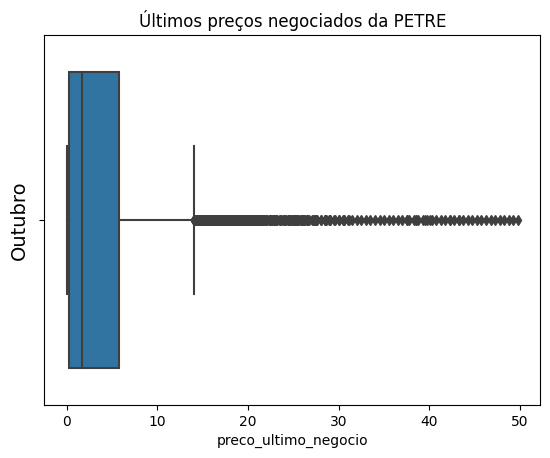

In [33]:
boxplot_empresa1_precoultimo_plt = sns.boxplot(x=empresa_1["preco_ultimo_negocio"]) # colocando o boxplot numa variável para manipular melhor
boxplot_empresa1_precoultimo_plt.set_ylabel('Outubro', fontsize=14) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

boxplot_empresa1_precoultimo_plt.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Últimos preços negociados da PETRE') # O título que se deseja colocar acima do gráfico

plt.show() # Impressão do gráfico

### > Total trading volume (Volume total negociado)

In [43]:
empresa1 = setData.set_meta_data(dados_acoes ,"PETRE" , "volume_total_negociado")

In [50]:
#We can also create a tuple with data, an pair ordenared with vm and tc measures
x , y  = (measures.get_central_tendency_measures(empresa1["column"]) , measures.get_variability_measures(empresa1["column"]))
print(x , y)

[1.362216e+06 6.657000e+04 1.125000e+03 ... 2.100000e+03 2.000000e+00
 4.099220e+05]
mean                                          710625.809016
mode      0    1.0
Name: volume_total_negociado, dtype: ...
median                                              38973.0
max                                             338019130.0
min                                                     1.0
dtype: object variance                                           37278271829902.65625
standard deviation                                       6105593.487115
shifiting_range       [-338019035.0, -271605728.0, -171381074.0, -12...
CV                                                             8.591426
dtype: object


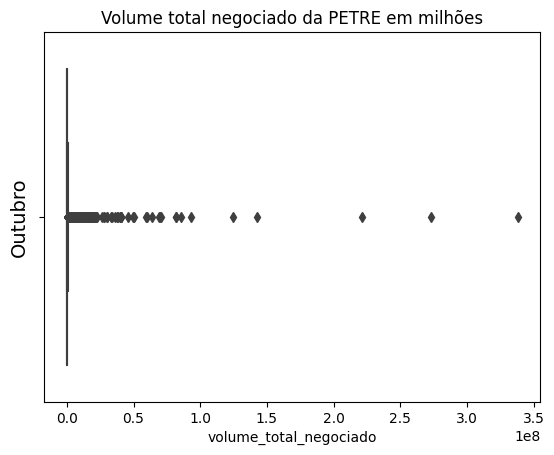

In [51]:
boxplot_empresa1_volumetotal_plt = sns.boxplot(x=empresa_1["volume_total_negociado"])
boxplot_empresa1_volumetotal_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_volumetotal_plt.plot()


plt.title('Volume total negociado da PETRE em milhões')

plt.show()

### > Number of Trades (Número de negócios)

In [52]:
empresa_1["numero_negocios"].std()

384.4783561749843

In [53]:
empresa_1["numero_negocios"].mean()

124.9536252119278

In [54]:
empresa_1["numero_negocios"].median()

13.0

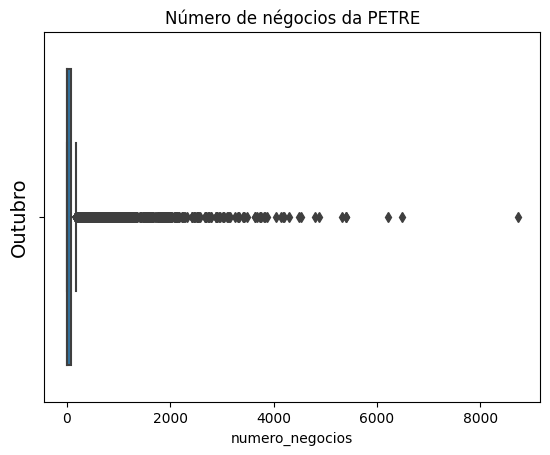

In [55]:
boxplot_empresa1_numeronegocios_plt = sns.boxplot(x=empresa_1["numero_negocios"])
boxplot_empresa1_numeronegocios_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_numeronegocios_plt.plot()


plt.title('Número de négocios da PETRE')

plt.show()

### > Maximum Closing Prices (Preço máximo das ações)

In [56]:
empresa_1["preco_maximo"].std()

5.776885233996004

In [57]:
empresa_1["preco_maximo"].mean()

4.266220205445298

In [58]:
empresa_1["preco_maximo"].median()

1.9

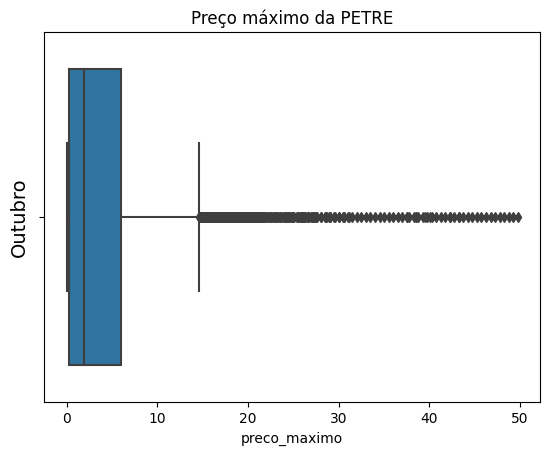

In [59]:
boxplot_empresa1_maximo_plt = sns.boxplot(x = empresa_1["preco_maximo"])
boxplot_empresa1_maximo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_maximo_plt.plot()


plt.title('Preço máximo da PETRE') # em R$ - Reais

plt.show()

### > Minimum Closing Prices (Preço mínimo das ações)

In [60]:
empresa_1["preco_minimo"].std()

5.660947624318514

In [61]:
empresa_1["preco_minimo"].mean()

3.9287164655430344

In [62]:
empresa_1["preco_minimo"].median()

1.5

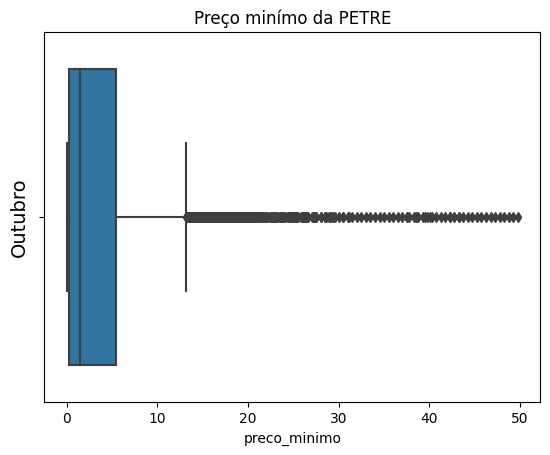

In [63]:
boxplot_empresa1_minimo_plt = sns.boxplot(x = empresa_1["preco_minimo"])
boxplot_empresa1_minimo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_minimo_plt.plot()


plt.title('Preço minímo da PETRE') # em R$ - Reais

plt.show()

### > Stock Opening Price (Preço de abertura das ações)

In [64]:
empresa_1["preco_abertura"].mean()

4.0933928393337995

In [65]:
empresa_1["preco_abertura"].std()

5.707135405067762

In [66]:
empresa_1["preco_abertura"].median()

1.71

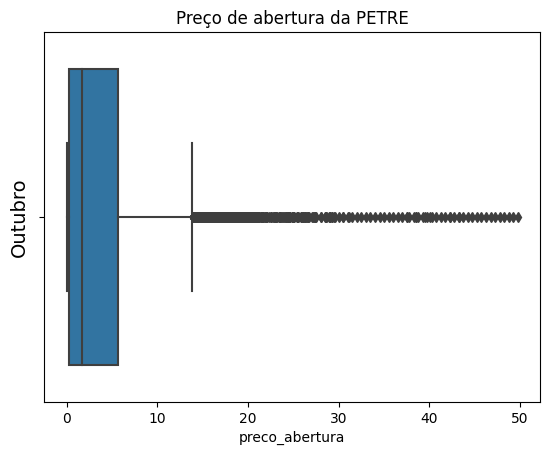

In [67]:
boxplot_empresa1_abertura_plt = sns.boxplot(x = empresa_1["preco_abertura"])
boxplot_empresa1_abertura_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_abertura_plt.plot()


plt.title('Preço de abertura da PETRE') # em R$ - Reais

plt.show()

### >> Table with some correlations

In [68]:
empresa_1[["preco_abertura", "preco_ultimo_negocio","preco_minimo","preco_maximo","numero_negocios","volume_total_negociado"]].corr()

preco_abertura  preco_ultimo_negocio  preco_minimo  \
preco_abertura                1.000000              0.997253      0.998526   
preco_ultimo_negocio          0.997253              1.000000      0.998425   
preco_minimo                  0.998526              0.998425      1.000000   
preco_maximo                  0.998428              0.998670      0.997138   
numero_negocios              -0.109370             -0.111930     -0.119470   
volume_total_negociado        0.207455              0.206519      0.207331   

                        preco_maximo  numero_negocios  volume_total_negociado  
preco_abertura              0.998428        -0.109370                0.207455  
preco_ultimo_negocio        0.998670        -0.111930                0.206519  
preco_minimo                0.997138        -0.119470                0.207331  
preco_maximo                1.000000        -0.102856                0.206406  
numero_negocios            -0.102856         1.000000                0.146719  
volume_total_negociado      0.206406         0.146719                1.000000

# Data Visualization

### - Scatter Plot

<AxesSubplot: xlabel='preco_abertura', ylabel='preco_ultimo_negocio'>

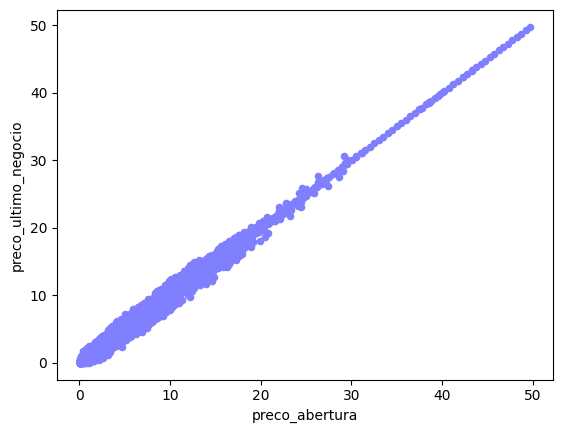

In [69]:
color=np.array([0.5, 0.5, 1]).reshape(1,-1)
empresa_1.plot.scatter(x="preco_abertura",y="preco_ultimo_negocio", c=color)

<AxesSubplot: xlabel='numero_negocios', ylabel='volume_total_negociado'>

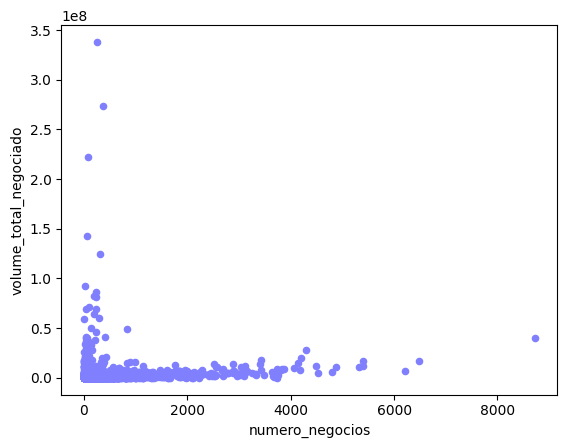

In [70]:
empresa_1.plot.scatter(x="numero_negocios",y="volume_total_negociado",c=color)

<AxesSubplot: xlabel='preco_minimo', ylabel='preco_maximo'>

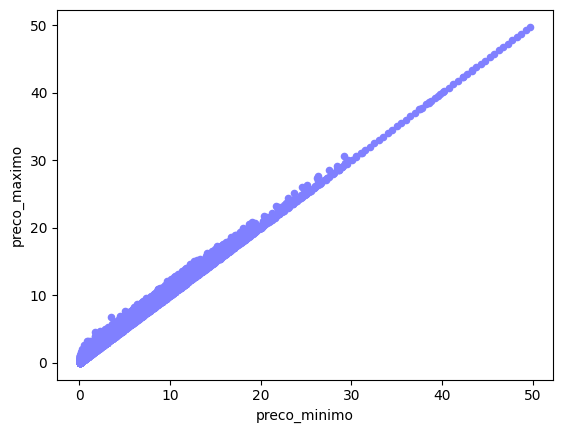

In [71]:
empresa_1.plot.scatter(x="preco_minimo",y="preco_maximo",c=color)

<AxesSubplot: xlabel='numero_negocios', ylabel='preco_ultimo_negocio'>

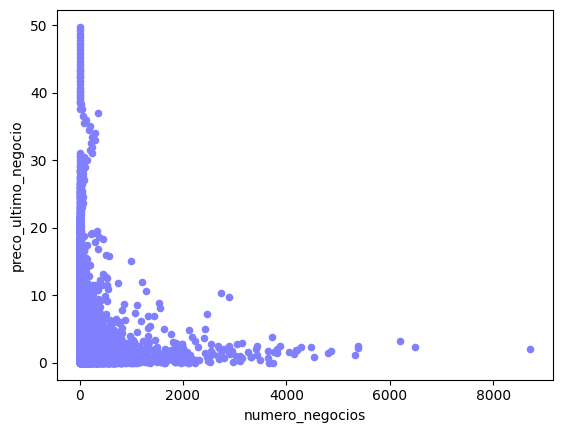

In [72]:
empresa_1.plot.scatter(x="numero_negocios",y="preco_ultimo_negocio",c=color)

<AxesSubplot: xlabel='volume_total_negociado', ylabel='preco_ultimo_negocio'>

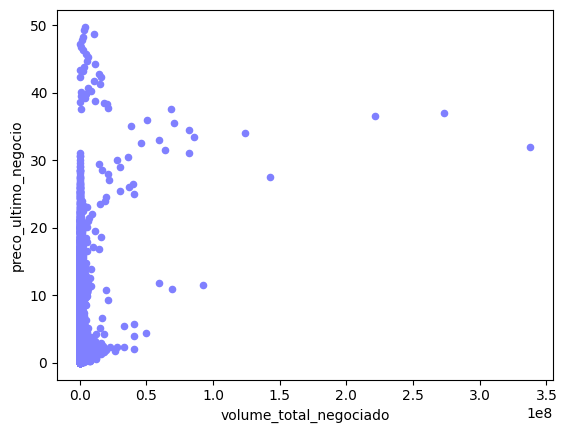

In [73]:
empresa_1.plot.scatter(x="volume_total_negociado",y="preco_ultimo_negocio",c=color)

In [74]:
#Using seaborn
sns.set_palette('Set1')

###### > Creating others dataframes of some companies from the main dataframe and then concatenating them.

In [75]:
empresa_2 = dados_acoes[dados_acoes["empresa"] == "VALEE"]
empresa_3 = dados_acoes[dados_acoes["empresa"] == "BBASE"]
empresa_4 = dados_acoes[dados_acoes["empresa"] == "MGLUE"]
empresa_5 = dados_acoes[dados_acoes["empresa"] == "COGNE"]

In [76]:
empresas = pd.concat([empresa_1, empresa_2, empresa_3, empresa_4, empresa_5])

In [77]:
empresas

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
103684              1    20221003     82.0       PETRW387            80   
104371              1    20221003     78.0       PETRA257            70   
104414              1    20221003     82.0       PETRX171            80   
104429              1    20221003     82.0       PETRX229            80   
104026              1    20221003     82.0       PETRW412            80   
...               ...         ...      ...            ...           ...   
57287               1    20221031     82.0       COGNM365            80   
57290               1    20221031     82.0       COGNV400            80   
57298               1    20221031     82.0       COGNW415            80   
173792              1    20221031     82.0       COGNM300            80   
173723              1    20221031     78.0       COGNL315            70   

       empresa especificacao_papel  preco_abertura  preco_maximo  \
103684   PETRE          PN      N2            9.36          9.66   
104371   PETRE          PN      N2            2.25          2.25   
104414   PETRE          PN      N2            1.45          1.48   
104429   PETRE          PN      N2            0.08          0.08   
104026   PETRE          PN      N2            8.42          9.44   
...        ...                 ...             ...           ...   
57287    COGNE          ON      NM            0.46          0.46   
57290    COGNE          ON      NM            0.97          0.97   
57298    COGNE          ON      NM            0.80          0.80   
173792   COGNE          ON      NM            0.14          0.17   
173723   COGNE          ON      NM            0.38          0.49   

        preco_minimo  ...  preco_ultimo_negocio  preco_melhor_oferta_compra  \
103684          9.36  ...                  9.66                        0.00   
104371          2.25  ...                  2.25                        1.60   
104414          1.35  ...                  1.40                        1.21   
104429          0.08  ...                  0.08                        0.03   
104026          8.42  ...                  9.44                        0.00   
...              ...  ...                   ...                         ...   
57287           0.46  ...                  0.46                        0.00   
57290           0.97  ...                  0.97                        0.00   
57298           0.80  ...                  0.80                        0.50   
173792          0.14  ...                  0.17                        0.17   
173723          0.29  ...                  0.35                        0.27   

        preco_melhor_oferta_venda  numero_negocios  \
103684                       0.00              2.0   
104371                       0.00              1.0   
104414                       2.96              5.0   
104429                       0.00              1.0   
104026                       0.00              2.0   
...                           ...              ...   
57287                        0.00              1.0   
57290                        0.97              1.0   
57298                        0.00              1.0   
173792                       0.00              2.0   
173723                       0.41             23.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
103684                        7000.0                 66570.0            42.02   
104371                         500.0                  1125.0            34.02   
104414                        1100.0                  1535.0            29.27   
104429                        1000.0                    80.0            19.02   
104026                        3600.0                 33882.0            41.77   
...                              ...                     ...              ...   
57287                        10000.0                  4600.0             3.65   
57290                         3000.0        

In [78]:
empresas['total']=(empresas['preco_exercicio']*empresas['quantidade_papeis_negociados'])

In [79]:
empresas

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
103684              1    20221003     82.0       PETRW387            80   
104371              1    20221003     78.0       PETRA257            70   
104414              1    20221003     82.0       PETRX171            80   
104429              1    20221003     82.0       PETRX229            80   
104026              1    20221003     82.0       PETRW412            80   
...               ...         ...      ...            ...           ...   
57287               1    20221031     82.0       COGNM365            80   
57290               1    20221031     82.0       COGNV400            80   
57298               1    20221031     82.0       COGNW415            80   
173792              1    20221031     82.0       COGNM300            80   
173723              1    20221031     78.0       COGNL315            70   

       empresa especificacao_papel  preco_abertura  preco_maximo  \
103684   PETRE          PN      N2            9.36          9.66   
104371   PETRE          PN      N2            2.25          2.25   
104414   PETRE          PN      N2            1.45          1.48   
104429   PETRE          PN      N2            0.08          0.08   
104026   PETRE          PN      N2            8.42          9.44   
...        ...                 ...             ...           ...   
57287    COGNE          ON      NM            0.46          0.46   
57290    COGNE          ON      NM            0.97          0.97   
57298    COGNE          ON      NM            0.80          0.80   
173792   COGNE          ON      NM            0.14          0.17   
173723   COGNE          ON      NM            0.38          0.49   

        preco_minimo  ...  preco_melhor_oferta_compra  \
103684          9.36  ...                        0.00   
104371          2.25  ...                        1.60   
104414          1.35  ...                        1.21   
104429          0.08  ...                        0.03   
104026          8.42  ...                        0.00   
...              ...  ...                         ...   
57287           0.46  ...                        0.00   
57290           0.97  ...                        0.00   
57298           0.80  ...                        0.50   
173792          0.14  ...                        0.17   
173723          0.29  ...                        0.27   

        preco_melhor_oferta_venda  numero_negocios  \
103684                       0.00              2.0   
104371                       0.00              1.0   
104414                       2.96              5.0   
104429                       0.00              1.0   
104026                       0.00              2.0   
...                           ...              ...   
57287                        0.00              1.0   
57290                        0.97              1.0   
57298                        0.00              1.0   
173792                       0.00              2.0   
173723                       0.41             23.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
103684                        7000.0                 66570.0            42.02   
104371                         500.0                  1125.0            34.02   
104414                        1100.0                  1535.0            29.27   
104429                        1000.0                    80.0            19.02   
104026                        3600.0                 33882.0            41.77   
...                              ...                     ...              ...   
57287                        10000.0                  4600.0             3.65   
57290                         3000.0                  2910.0             4.00   
57298                         3000.0                  2400.0             4.15   
173792                        3000.0                   450.0             3.00   
173723                      125700.0                 45670.0     

In [80]:
#empresas['total']=(empresas['preco_exercicio']*empresas['quantidade_papeis_negociados'])
df30 = pd.DataFrame(empresas.groupby(by=['empresa'])['total'].sum())
df30.reset_index(inplace=True)
df30.sort_values('total')

empresa         total
1   COGNE  9.894191e+08
2   MGLUE  2.416456e+09
0   BBASE  1.150452e+10
4   VALEE  5.640137e+10
3   PETRE  1.246605e+11

<AxesSubplot: xlabel='data_pregao', ylabel='numero_negocios'>

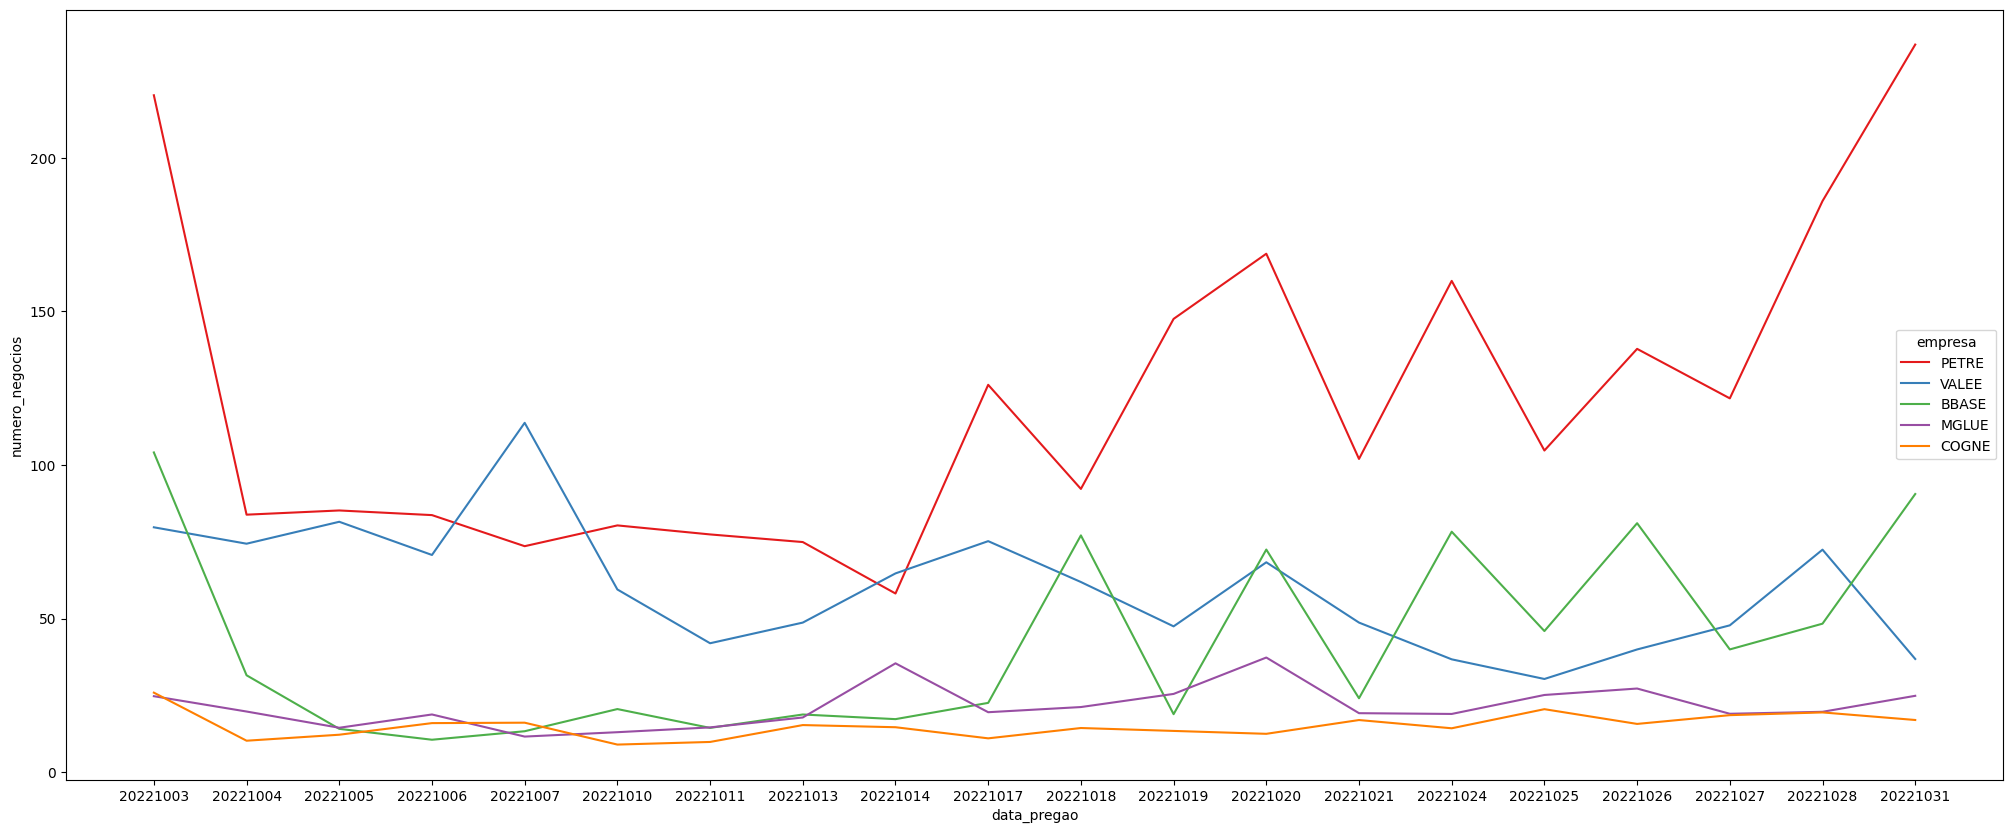

In [81]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="numero_negocios", hue="empresa", err_style=None)
# Lembrando que 202210 -> mes de outubro em 2022

<AxesSubplot: xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

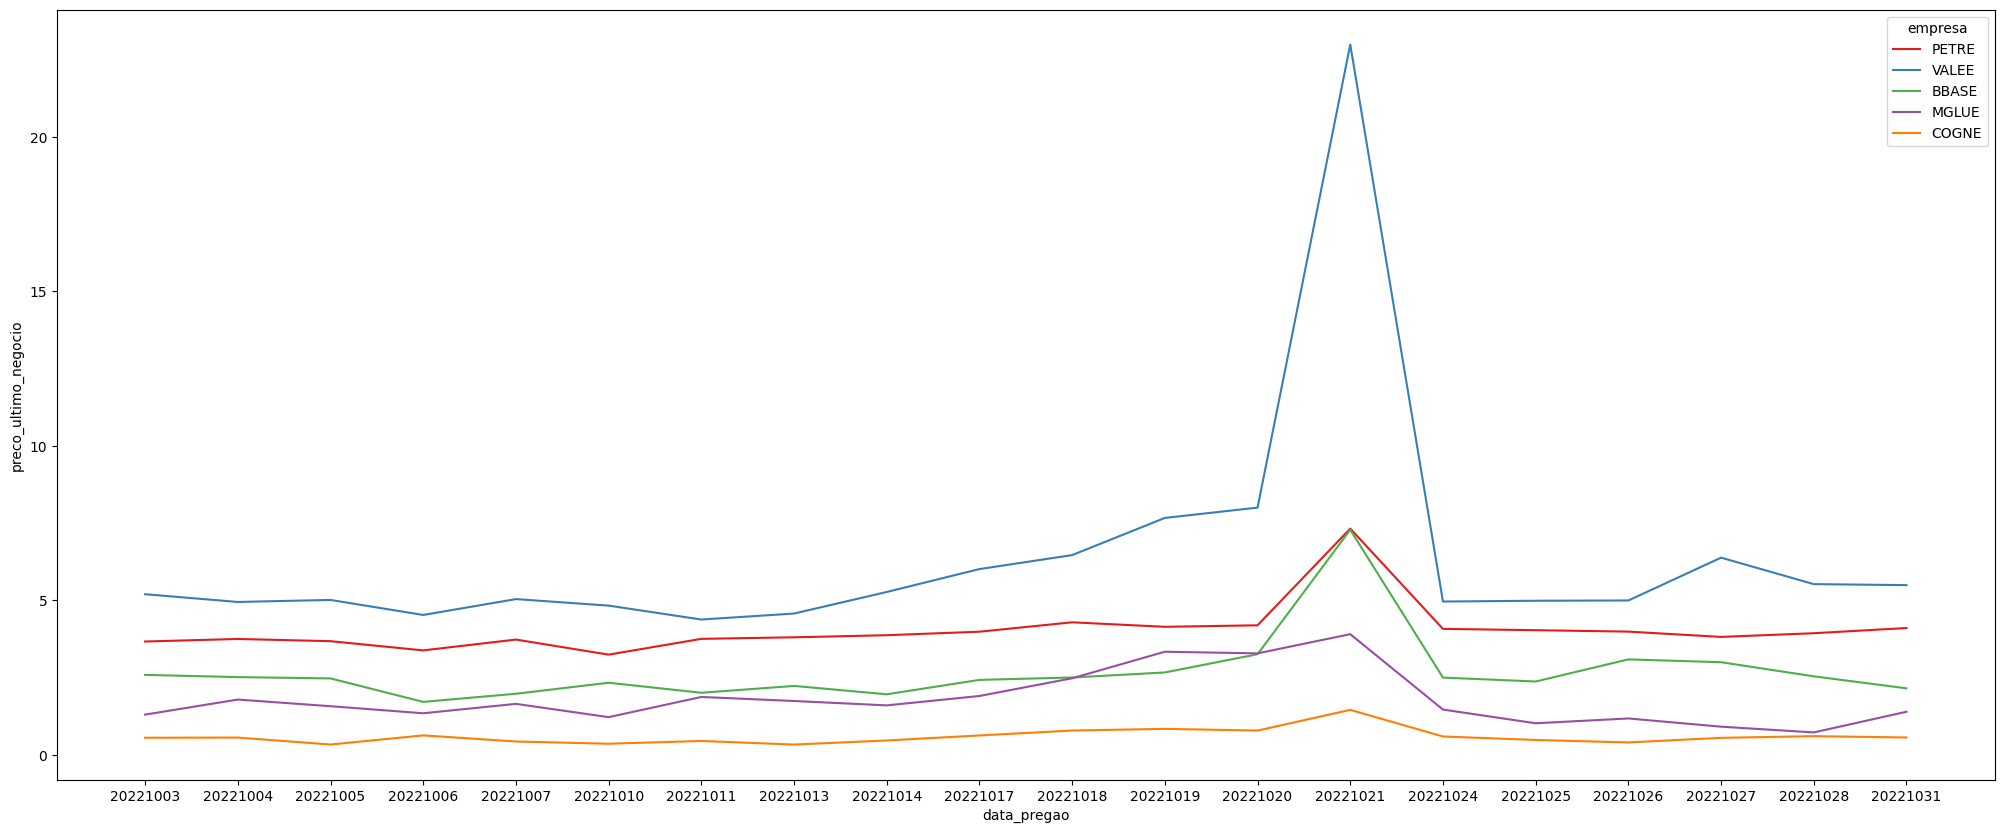

In [82]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None)

<AxesSubplot: xlabel='data_pregao', ylabel='volume_total_negociado'>

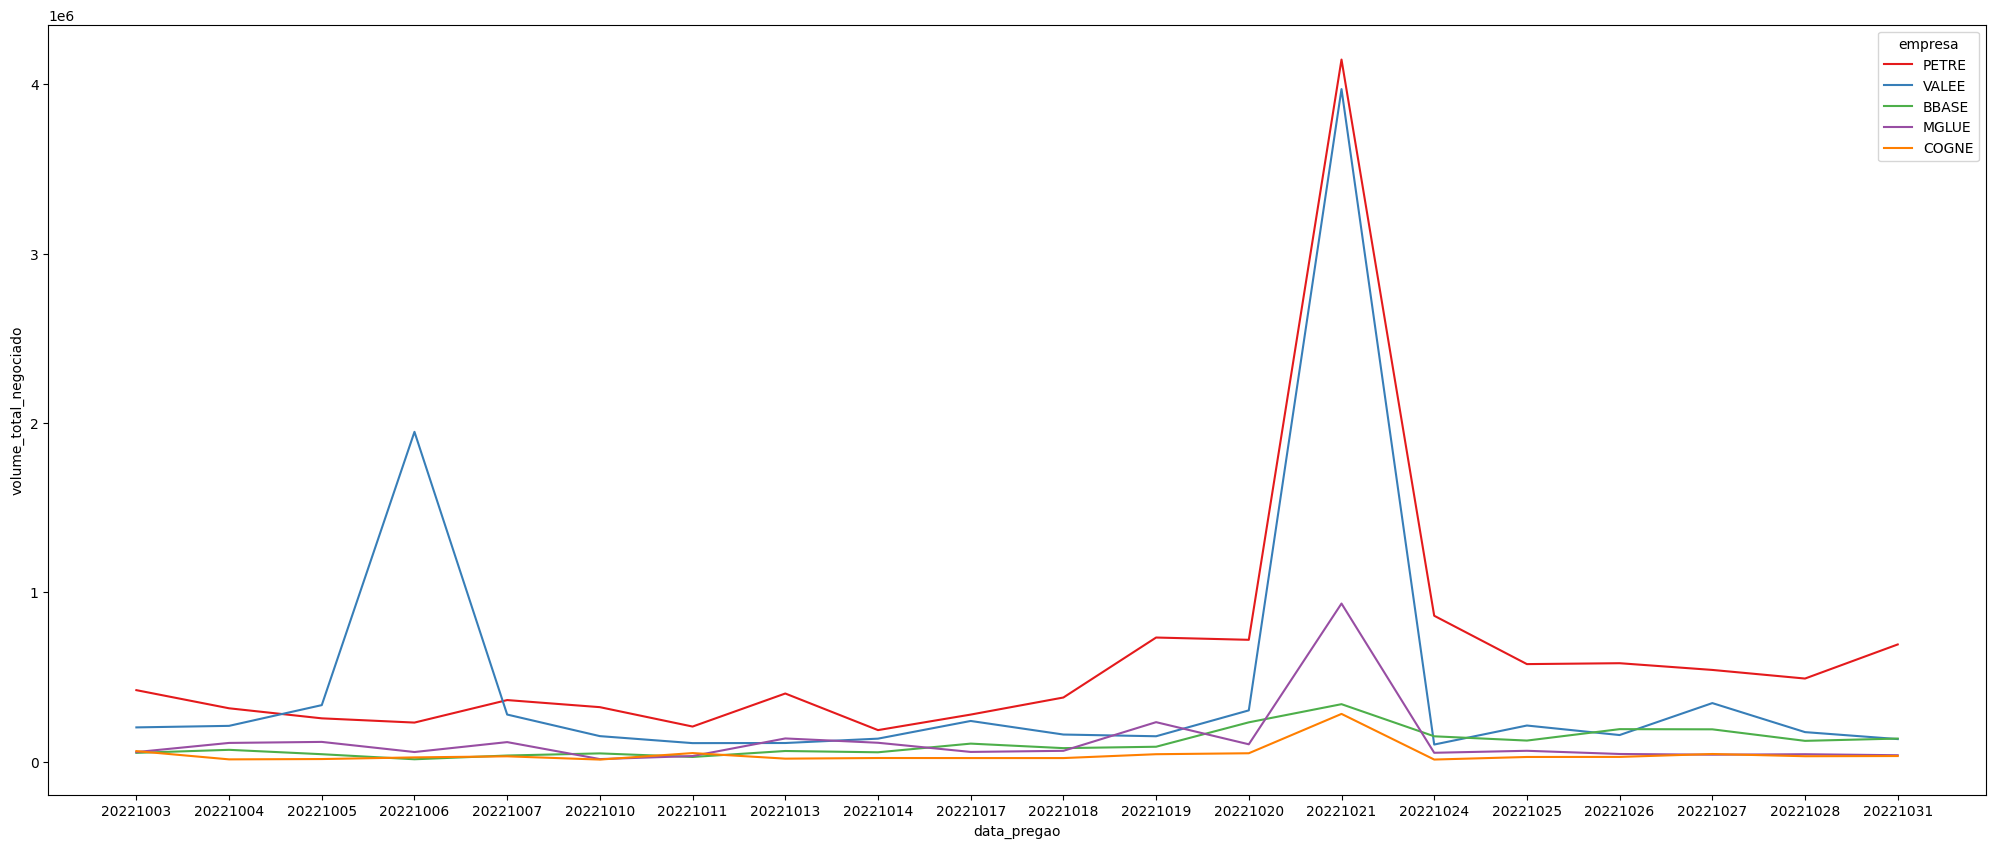

In [83]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="volume_total_negociado", hue="empresa", err_style=None)

<AxesSubplot: xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

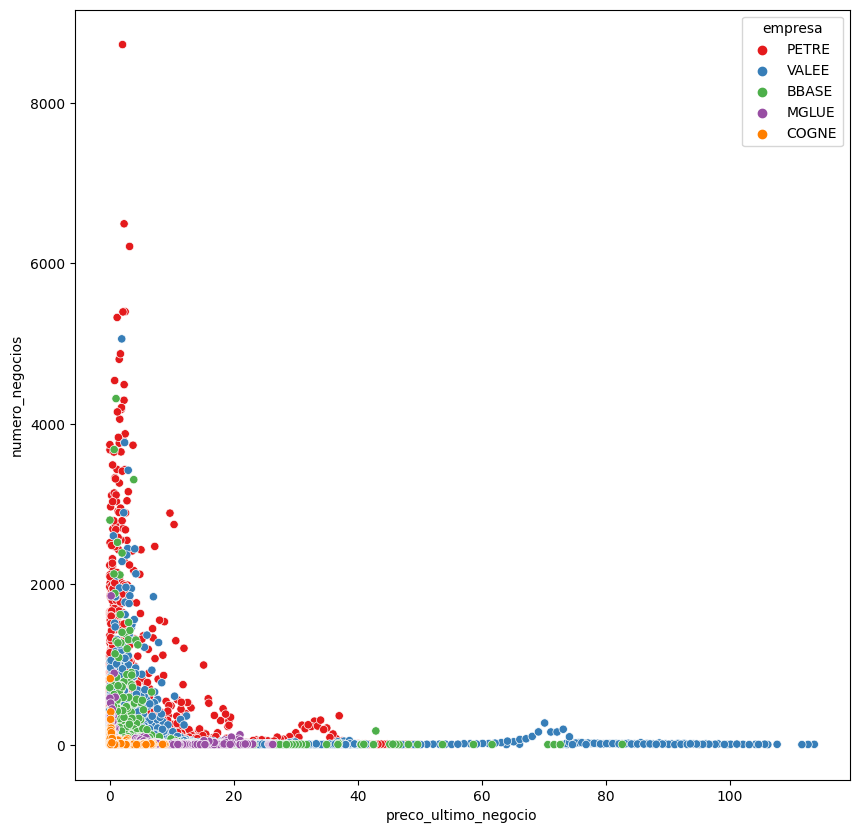

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=empresas, x='preco_ultimo_negocio', y='numero_negocios', hue="empresa")

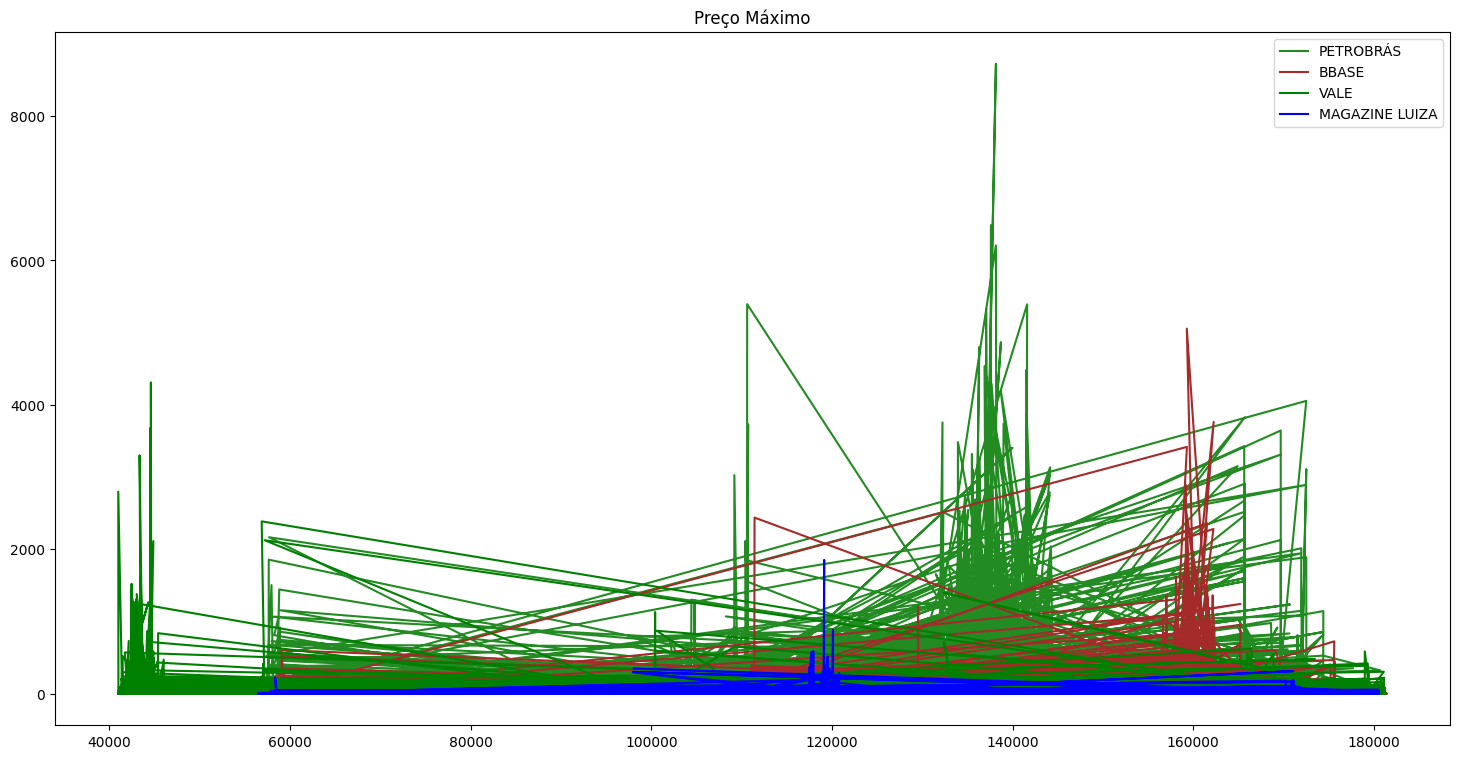

In [85]:
empresa_1['numero_negocios'].plot(label = "PETROBRÁS", color = "forestgreen", figsize = (18,9))
empresa_2['numero_negocios'].plot(label = "BBASE", color = 'brown')
empresa_3['numero_negocios'].plot(label = "VALE", color = 'green')
empresa_4['numero_negocios'].plot(label = "MAGAZINE LUIZA", color = 'blue')



plt.title('Preço Máximo')
plt.legend()
plt.show()

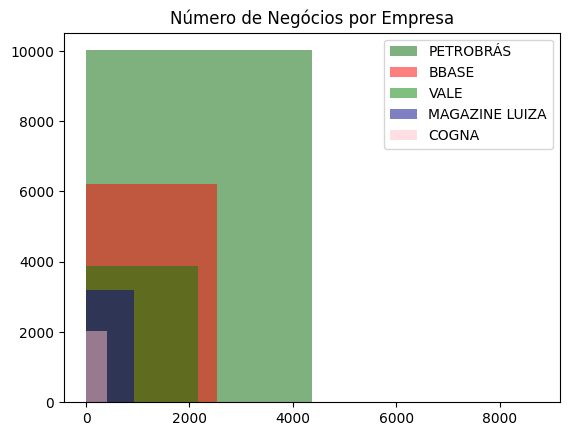

In [86]:
plt.hist(empresa_1['numero_negocios'], alpha=0.5, label='PETROBRÁS', bins=2, color='darkgreen')
plt.hist(empresa_2['numero_negocios'], alpha=0.5, label='BBASE', bins=2, color='red')
plt.hist(empresa_3['numero_negocios'], alpha=0.5, label='VALE', bins=2, color='g')
plt.hist(empresa_4['numero_negocios'], alpha=0.5, label='MAGAZINE LUIZA', bins=2, color='darkblue')
plt.hist(empresa_5['numero_negocios'], alpha=0.5, label='COGNA', bins=2, color='pink')
plt.title("Número de Negócios por Empresa")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 9)

<AxesSubplot: xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

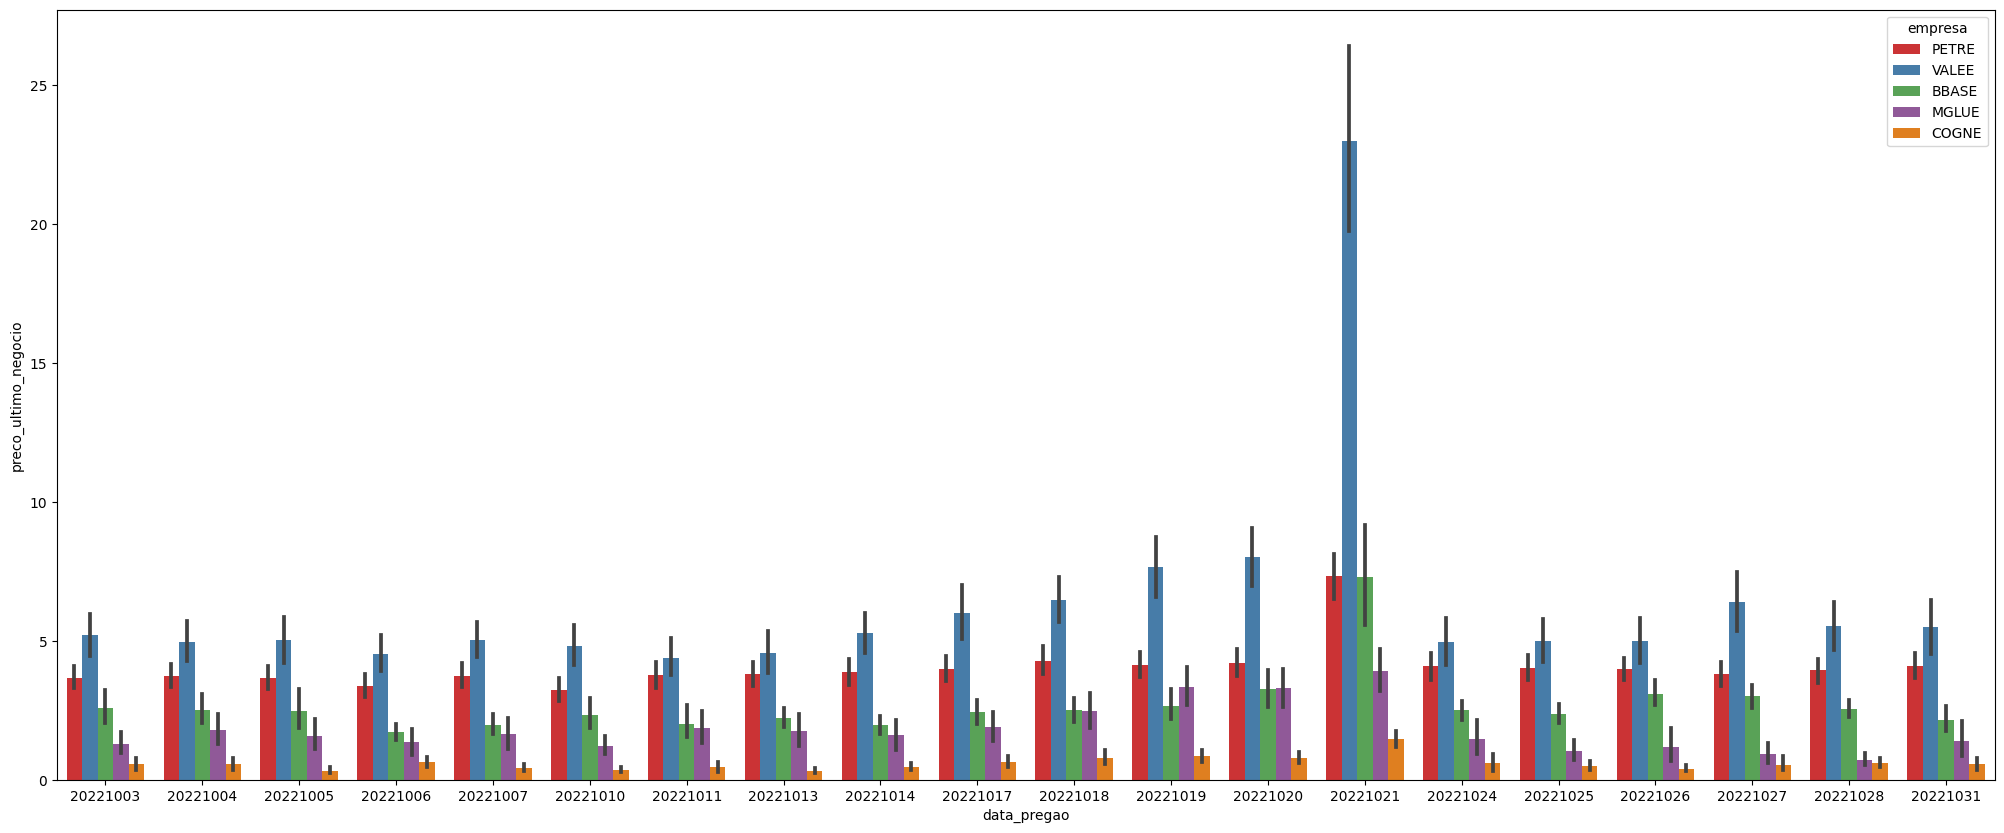

In [87]:
plt.figure(figsize=(25,10))
sns.barplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue = "empresa")

In [135]:
fig = px.scatter(empresas, x = 'numero_negocios', y = 'preco_maximo', color = 'empresa', hover_name = "empresa", log_x = True, width = 800)
fig.update_traces(marker=dict(size = 10,line = dict(width = 1)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'Análise de Nº de Negócios vs. Preço Máximo')
fig.update_xaxes(title = 'Nº de Negócios')
fig.update_yaxes(title = 'Preço Máximo')
fig.show()

<AxesSubplot: xlabel='total', ylabel='empresa'>

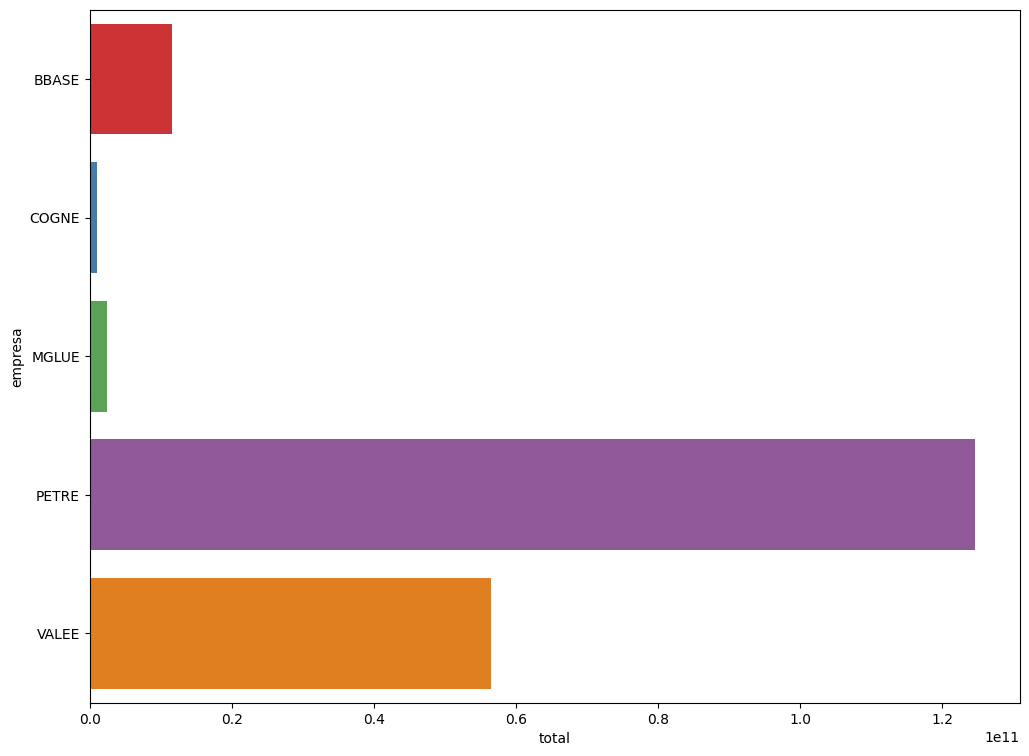

In [89]:
sns.barplot(data=df30, x='total', y='empresa', linewidth=3, dodge=False)

<AxesSubplot: xlabel='numero_negocios', ylabel='empresa'>

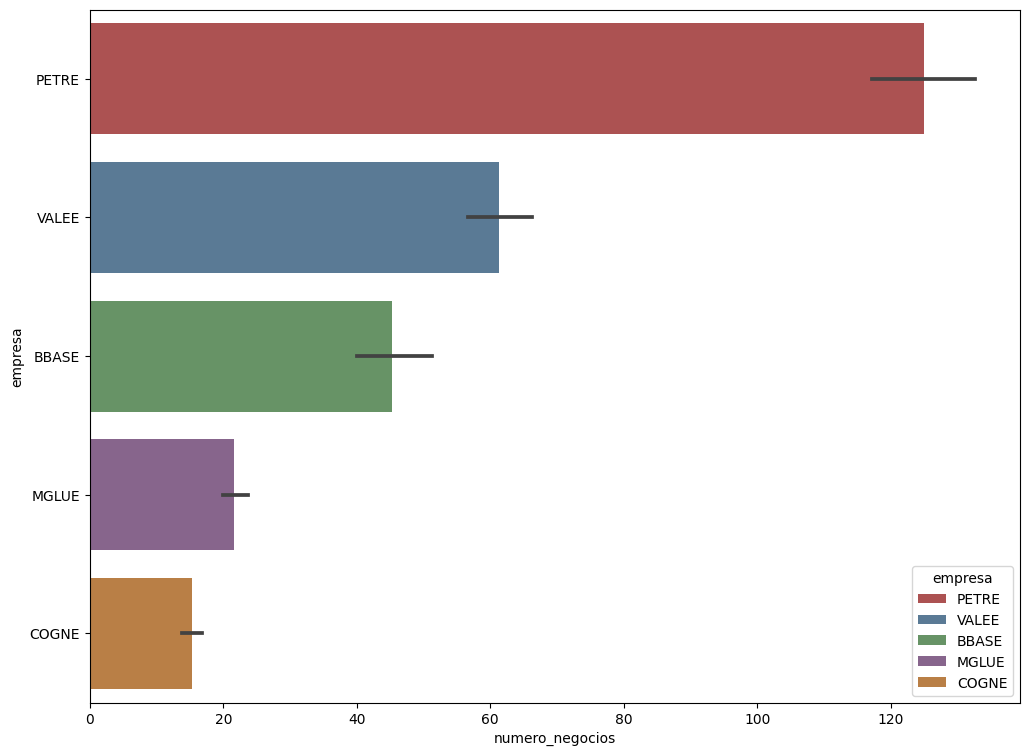

In [90]:
sns.barplot(data=empresas, y="empresa", x="numero_negocios", hue="empresa", saturation=0.45, orient = 'h', linewidth=3, dodge=False)

In [91]:
empresas_lite = empresas[["data_pregao", "empresa", "preco_abertura", "preco_maximo", "quantidade_papeis_negociados", "volume_total_negociado" ]]

In [92]:
empresas_lite['quantidade_papeis_negociados'].unique()

array([7.0000e+03, 5.0000e+02, 1.1000e+03, ..., 1.3029e+06, 8.2920e+05,
       3.9340e+05])

In [93]:
emp1 = empresas_lite.loc[(empresas_lite['empresa'] == 'PETRE') & (empresas_lite['preco_maximo'] == 49.77)]
emp2 = empresas_lite.loc[(empresas_lite['empresa'] == 'VALEE') & (empresas_lite['preco_maximo'] == 113.66)]
emp3 = empresas_lite.loc[(empresas_lite['empresa'] == 'BBASE') & (empresas_lite['preco_maximo'] > 80)]
emp4 = empresas_lite.loc[(empresas_lite['empresa'] == 'MGLUE') & (empresas_lite['preco_maximo'] > 26.20)]

In [94]:
list = []
for value in empresas_lite.columns.values:
    list.append(value)

In [95]:
df = pd.DataFrame(emp1, columns = list)

In [96]:
dff = pd.concat([emp1, emp2, emp3, emp4])

# - K-means (Algoritmo de Lloyd Max)

In [97]:
#import k-means module to work with
from sklearn.cluster import KMeans

## -- Comparing Last Price with Number of Trades

### + Company: Petrobrás

#### > Ellbow Method to determine the number of clusters

In [98]:
df_group = empresa_1[['preco_ultimo_negocio', 'numero_negocios']]

<AxesSubplot: >

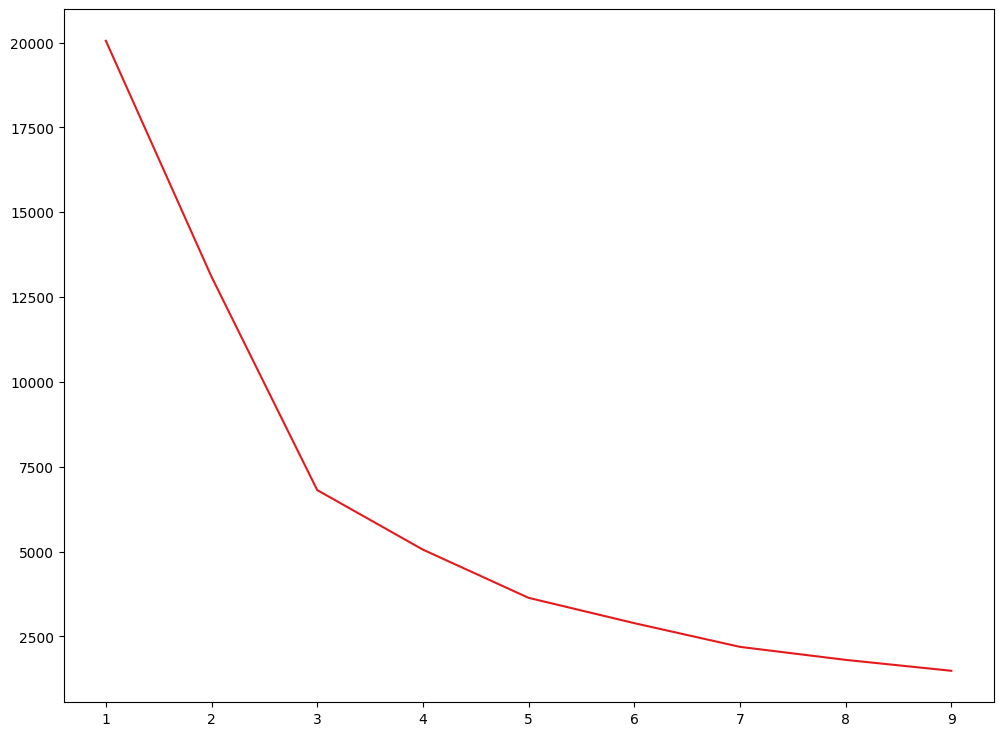

In [99]:
disps = []
scaler_object = StandardScaler()
df_group_elb = scaler_object.fit_transform(df_group)
for i in range(1,10):
    kmeansp = KMeans(n_clusters=i)
    kmeansp.fit(df_group_elb)
    disps.append(kmeansp.inertia_)
sns.lineplot(x=range(1,10), y=disps)

### > Separate the dataset into groups

In [100]:
kmeansp = KMeans(n_clusters=5)
kmeansp.fit(df_group)

KMeans(n_clusters=5)

<AxesSubplot: xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

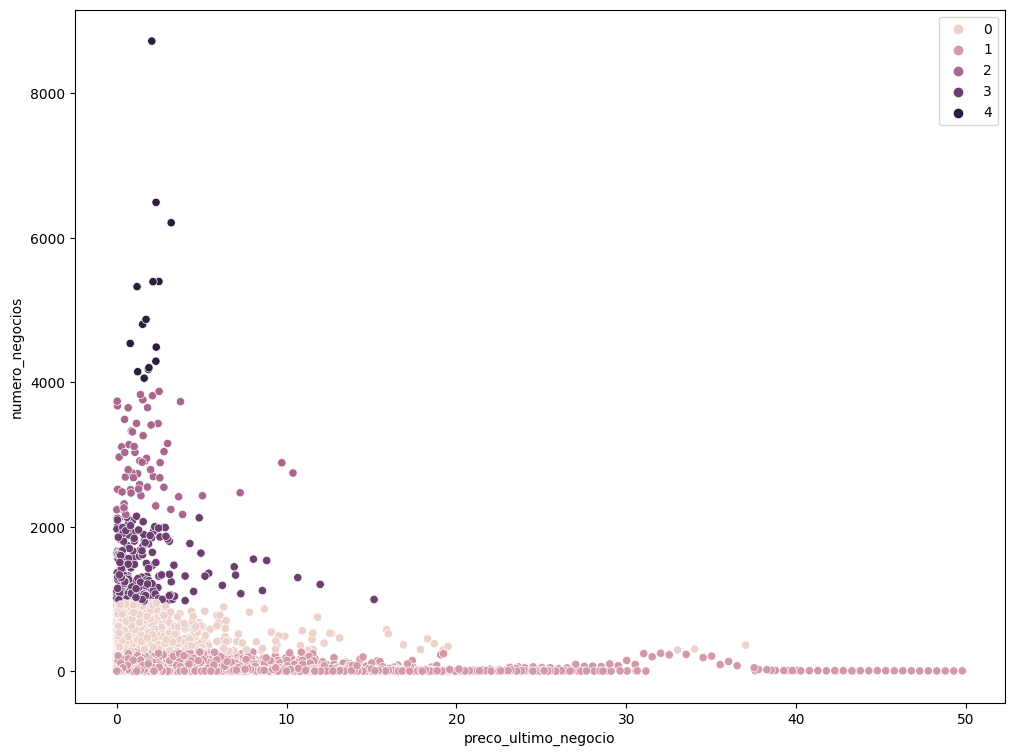

In [101]:
sns.scatterplot(data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansp.labels_)

### + Company: Cogna

<AxesSubplot: >

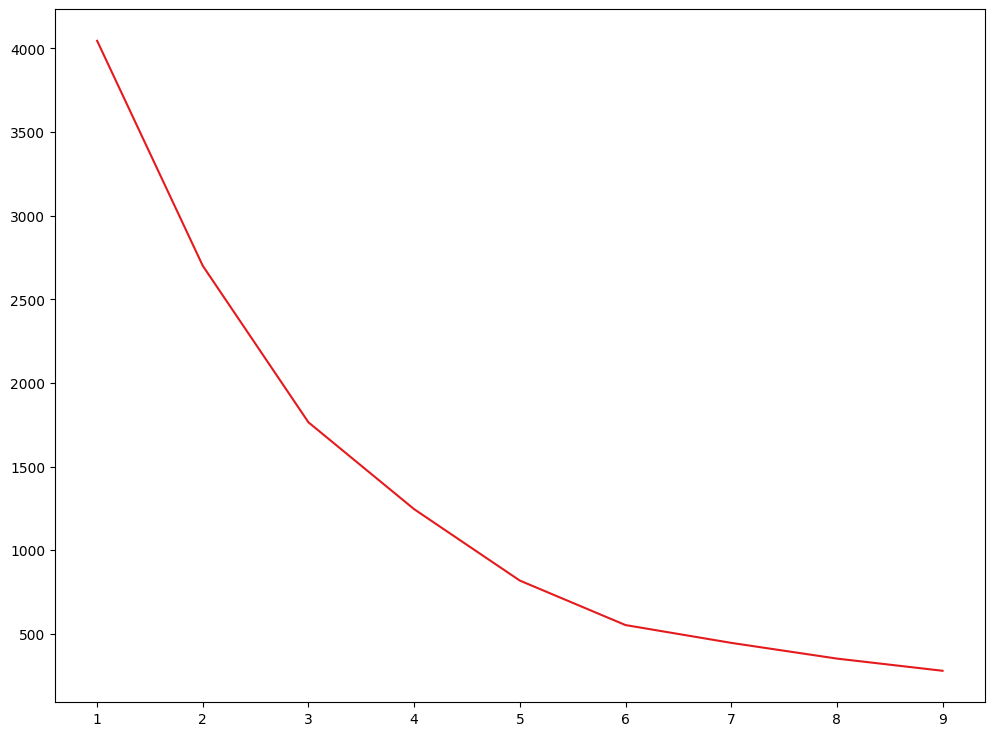

In [102]:
df2_group = empresa_5[['preco_ultimo_negocio', 'numero_negocios']]
disps = []
scaler_object = StandardScaler()
df2_group_elb = scaler_object.fit_transform(df2_group)
for i in range(1,10):
    kmeansc = KMeans(n_clusters=i)
    kmeansc.fit(df2_group_elb)
    disps.append(kmeansc.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot: xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

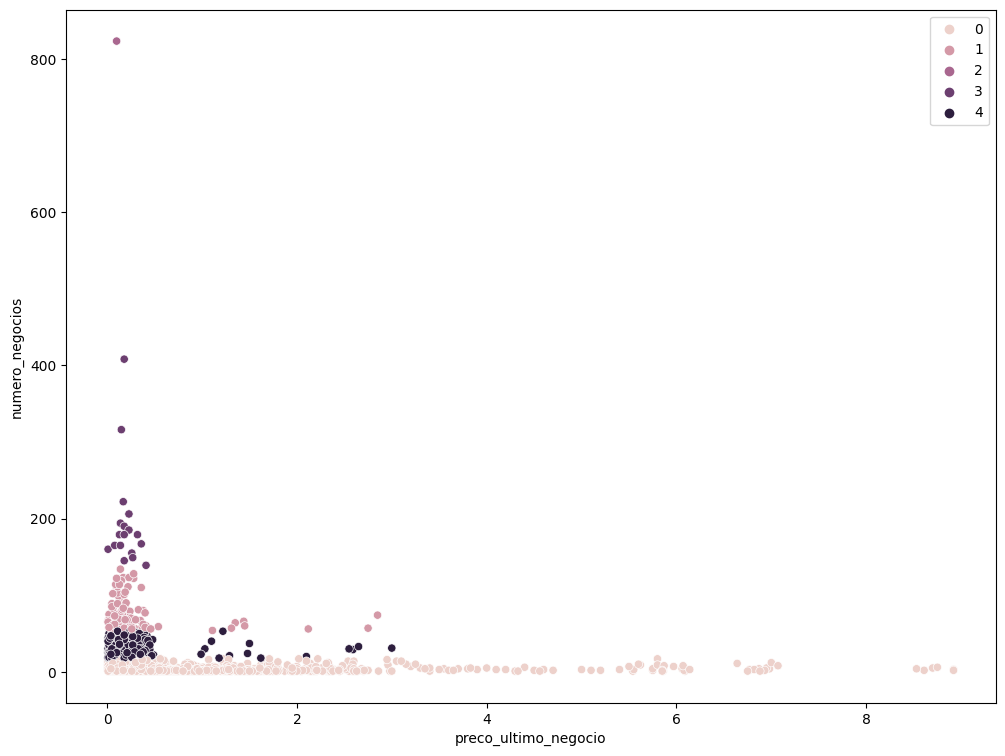

In [103]:
kmeansc = KMeans(n_clusters=5)
kmeansc.fit(df2_group)
sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansc.labels_)

## -- Comparing Total Trading Volume with Opening Price

### + Company: Petrobrás

<AxesSubplot: >

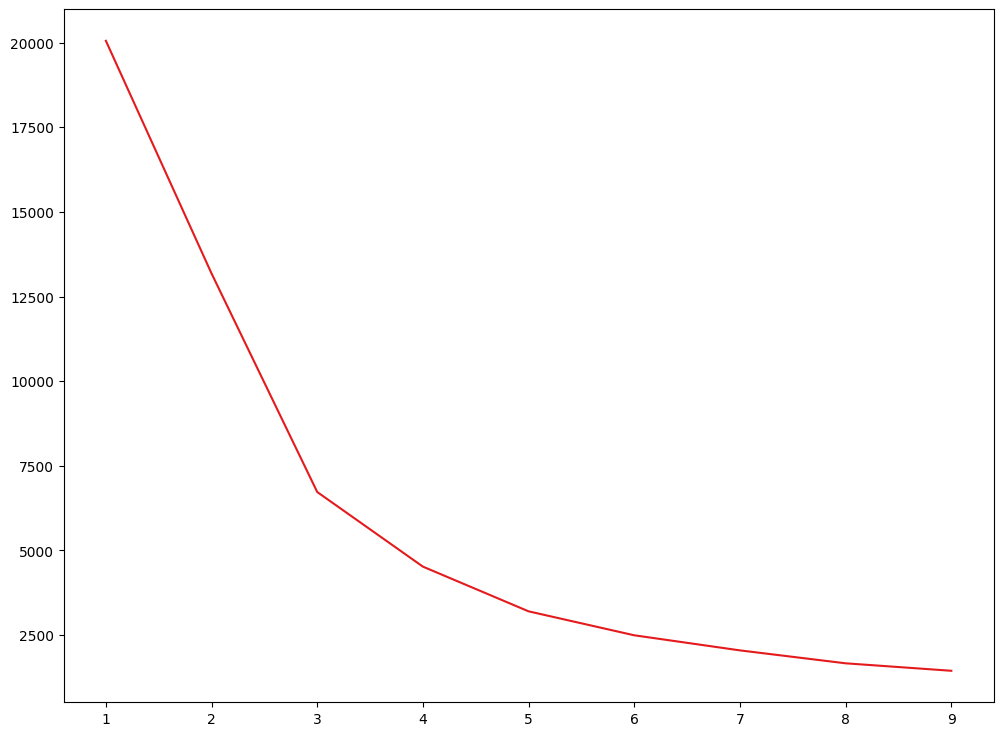

In [104]:
df_group_comparing2 = empresa_1[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df_group_elb_2 = scaler_object.fit_transform(df_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot: xlabel='volume_total_negociado', ylabel='preco_abertura'>

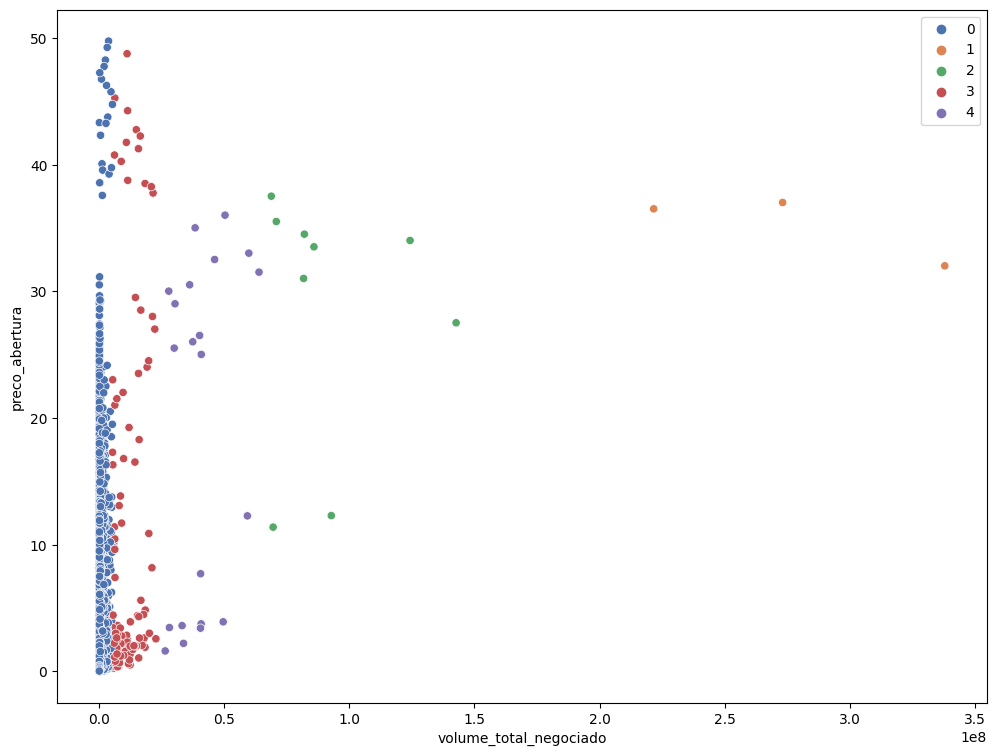

In [105]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_group_comparing2)
sns.scatterplot(data=df_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

### + Company: Cogna

<AxesSubplot: >

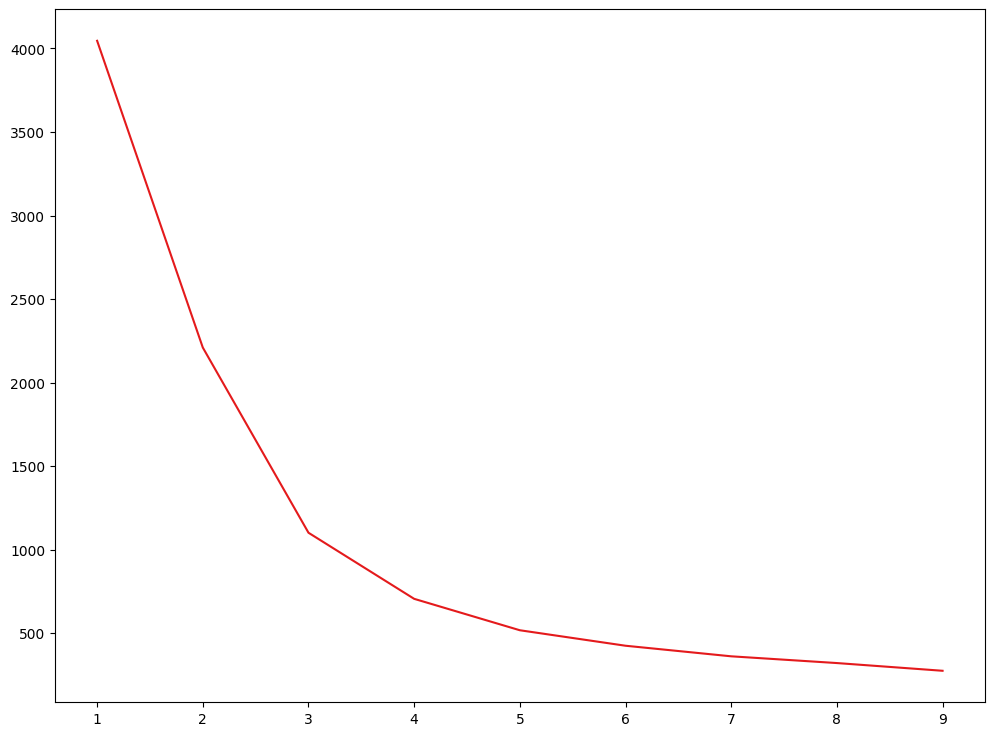

In [106]:
df2_group_comparing2 = empresa_5[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df2_group_elb_2 = scaler_object.fit_transform(df2_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot: xlabel='volume_total_negociado', ylabel='preco_abertura'>

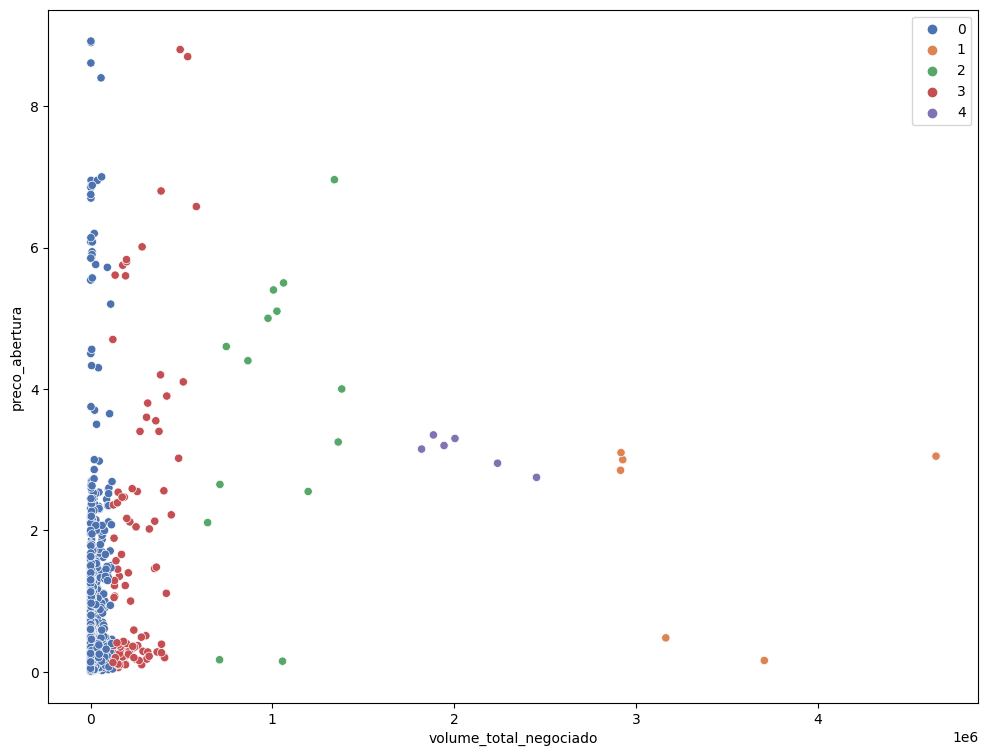

In [107]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2_group_comparing2)
sns.scatterplot(data=df2_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

#### Have any patterns been dectected?

Group 0 is the group that has a significant number of outliers, however, most of them had an intermediate opening price, however, a very low total volume traded, differently from group 3 that maintained a similar opening price, but a higher volume of trades.

#### Were any new questions discovered when analyzing the clusters?

The question in the next section , "which firm has the highest probability of a return in the one-month period?"
It follows from this analysis

# Questions answers (respostas para as questões)

## >  Which company is most likely to return within a month? (Qual a empresa com maior probabilidade de retorno no período de um mês?)

In [108]:
empresas['total']=(empresas['preco_exercicio']*empresas['quantidade_papeis_negociados'])

In [109]:
empresas

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
103684              1    20221003     82.0       PETRW387            80   
104371              1    20221003     78.0       PETRA257            70   
104414              1    20221003     82.0       PETRX171            80   
104429              1    20221003     82.0       PETRX229            80   
104026              1    20221003     82.0       PETRW412            80   
...               ...         ...      ...            ...           ...   
57287               1    20221031     82.0       COGNM365            80   
57290               1    20221031     82.0       COGNV400            80   
57298               1    20221031     82.0       COGNW415            80   
173792              1    20221031     82.0       COGNM300            80   
173723              1    20221031     78.0       COGNL315            70   

       empresa especificacao_papel  preco_abertura  preco_maximo  \
103684   PETRE          PN      N2            9.36          9.66   
104371   PETRE          PN      N2            2.25          2.25   
104414   PETRE          PN      N2            1.45          1.48   
104429   PETRE          PN      N2            0.08          0.08   
104026   PETRE          PN      N2            8.42          9.44   
...        ...                 ...             ...           ...   
57287    COGNE          ON      NM            0.46          0.46   
57290    COGNE          ON      NM            0.97          0.97   
57298    COGNE          ON      NM            0.80          0.80   
173792   COGNE          ON      NM            0.14          0.17   
173723   COGNE          ON      NM            0.38          0.49   

        preco_minimo  ...  preco_melhor_oferta_compra  \
103684          9.36  ...                        0.00   
104371          2.25  ...                        1.60   
104414          1.35  ...                        1.21   
104429          0.08  ...                        0.03   
104026          8.42  ...                        0.00   
...              ...  ...                         ...   
57287           0.46  ...                        0.00   
57290           0.97  ...                        0.00   
57298           0.80  ...                        0.50   
173792          0.14  ...                        0.17   
173723          0.29  ...                        0.27   

        preco_melhor_oferta_venda  numero_negocios  \
103684                       0.00              2.0   
104371                       0.00              1.0   
104414                       2.96              5.0   
104429                       0.00              1.0   
104026                       0.00              2.0   
...                           ...              ...   
57287                        0.00              1.0   
57290                        0.97              1.0   
57298                        0.00              1.0   
173792                       0.00              2.0   
173723                       0.41             23.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
103684                        7000.0                 66570.0            42.02   
104371                         500.0                  1125.0            34.02   
104414                        1100.0                  1535.0            29.27   
104429                        1000.0                    80.0            19.02   
104026                        3600.0                 33882.0            41.77   
...                              ...                     ...              ...   
57287                        10000.0                  4600.0             3.65   
57290                         3000.0                  2910.0             4.00   
57298                         3000.0                  2400.0             4.15   
173792                        3000.0                   450.0             3.00   
173723                      125700.0                 45670.0     

In [110]:
df30 = pd.DataFrame(empresas.groupby(by=['empresa'])['total'].sum())
df30.reset_index(inplace=True)
df30.sort_values('total')


empresa         total
1   COGNE  9.894191e+08
2   MGLUE  2.416456e+09
0   BBASE  1.150452e+10
4   VALEE  5.640137e+10
3   PETRE  1.246605e+11

[Text(0.5, 0, 'TOTAL (R$)'), Text(0, 0.5, 'EMPRESAS')]

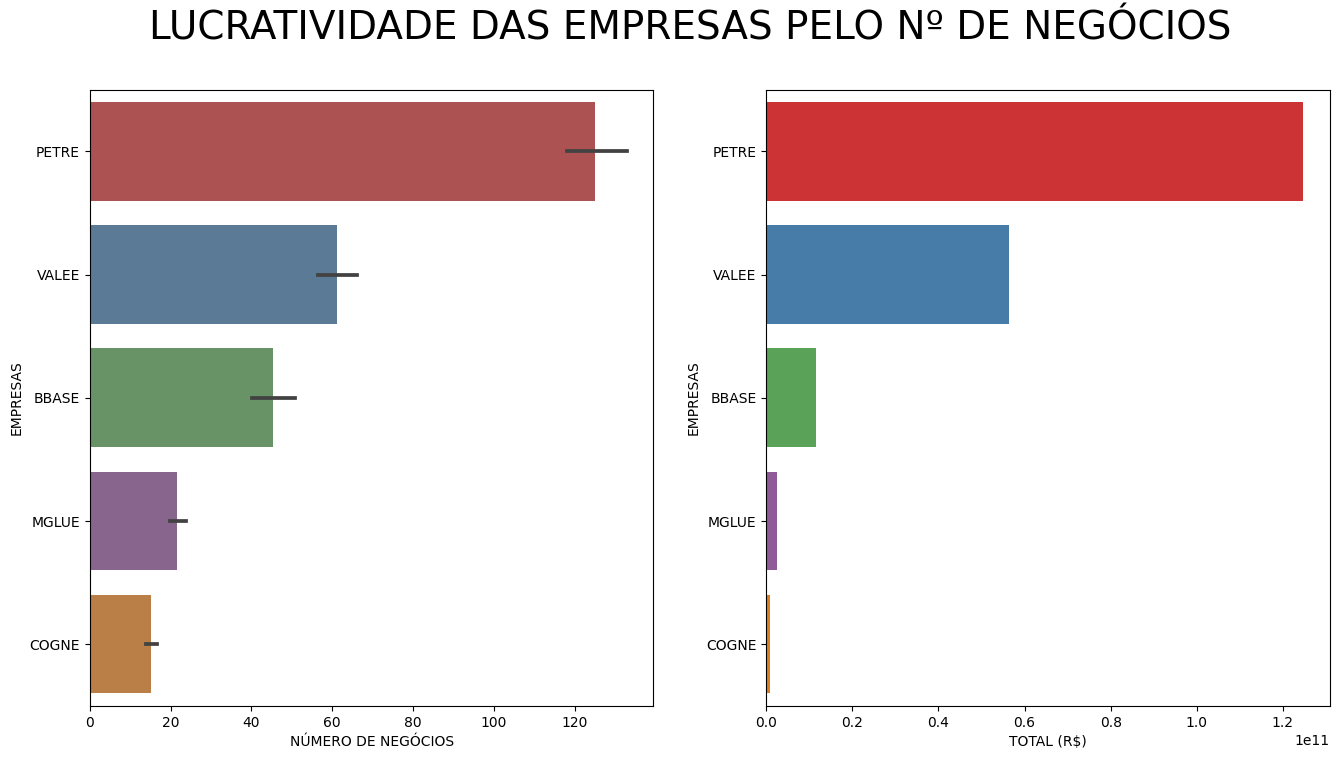

In [111]:


fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("LUCRATIVIDADE DAS EMPRESAS PELO Nº DE NEGÓCIOS", fontsize = 28)
a= sns.barplot(ax=axes[0],data=empresas, y="empresa", x="numero_negocios", saturation=0.45, orient = 'h', linewidth=3, dodge=False)
a.set(xlabel='NÚMERO DE NEGÓCIOS', ylabel='EMPRESAS')
b = sns.barplot(ax=axes[1], data=df30, x='total', y='empresa', linewidth=3, dodge=False, order=df30.sort_values('total',ascending = False).empresa)
b.set(xlabel='TOTAL (R$)', ylabel='EMPRESAS')


## > What's the difference between the stocks of PETRE and COGNE? (Qual a diferença entre as ações da PETRE e COGNE?)

In [112]:
compare = pd.concat([empresa_1, empresa_5])

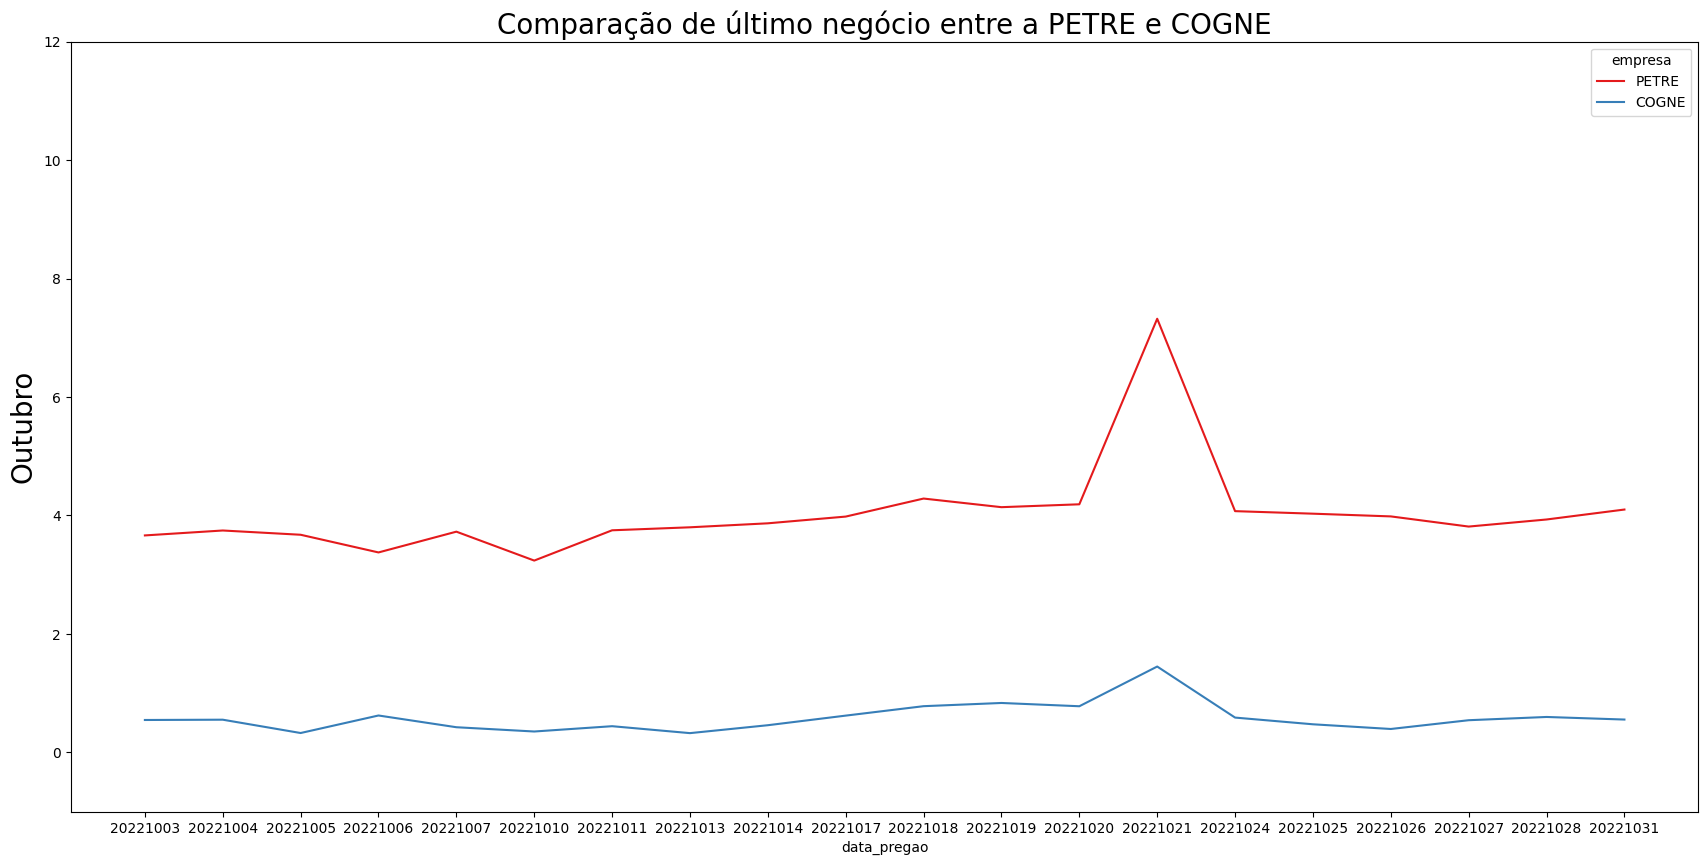

In [113]:
plt.figure(figsize=(21,10))
comparacao_ultimo_negocio = sns.lineplot(data=compare, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None) # colocando o boxplot numa variável para manipular melhor
comparacao_ultimo_negocio.set_ylabel('Outubro', fontsize=20) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

comparacao_ultimo_negocio.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

plt.ylim(-1, 12)
# em R$ - Reais
plt.title('Comparação de último negócio entre a PETRE e COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

 Comparando mês de Outubro com Novembro

-Tratando os dados do mês de novembro

In [114]:
#this file is compressed in the datasets repository, 
#extract it before running this code snippet
arquivo_bovespa_2 = 'https://raw.githubusercontent.com/data-science-ci/actions-price-analysis/main/datasets/COTAHIST_M112022' 


#Define the size of fields
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

# Read the data and receive two positional arguments, widhts who have the fields size and header = 0
dados_acoes_2=pd.read_fwf(arquivo_bovespa_2, widths=tamanho_campos, header=0)


# Name the columns
# Data structure available at http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
dados_acoes_2.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Remove last line
linha=len(dados_acoes_2["data_pregao"])
dados_acoes_2=dados_acoes_2.drop(linha-1)

# Adjust values with a comma (divide the values of these columns by 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes_2[coluna]=[i/100. for i in dados_acoes_2[coluna]]
    
dados_acoes_2 = dados_acoes_2.sort_values(by=['data_pregao'])

empresa2_1 = dados_acoes_2[dados_acoes_2["empresa"] == "PETRE"]
empresa2_2 = dados_acoes_2[dados_acoes_2["empresa"] == "VALEE"]
empresa2_3 = dados_acoes_2[dados_acoes_2["empresa"] == "BBASE"]
empresa2_4 = dados_acoes_2[dados_acoes_2["empresa"] == "MGLUE"]
empresa2_5 = dados_acoes_2[dados_acoes_2["empresa"] == "COGNE"]
empresas2 = pd.concat([empresa2_1,empresa2_2,empresa2_3,empresa2_4, empresa2_5])

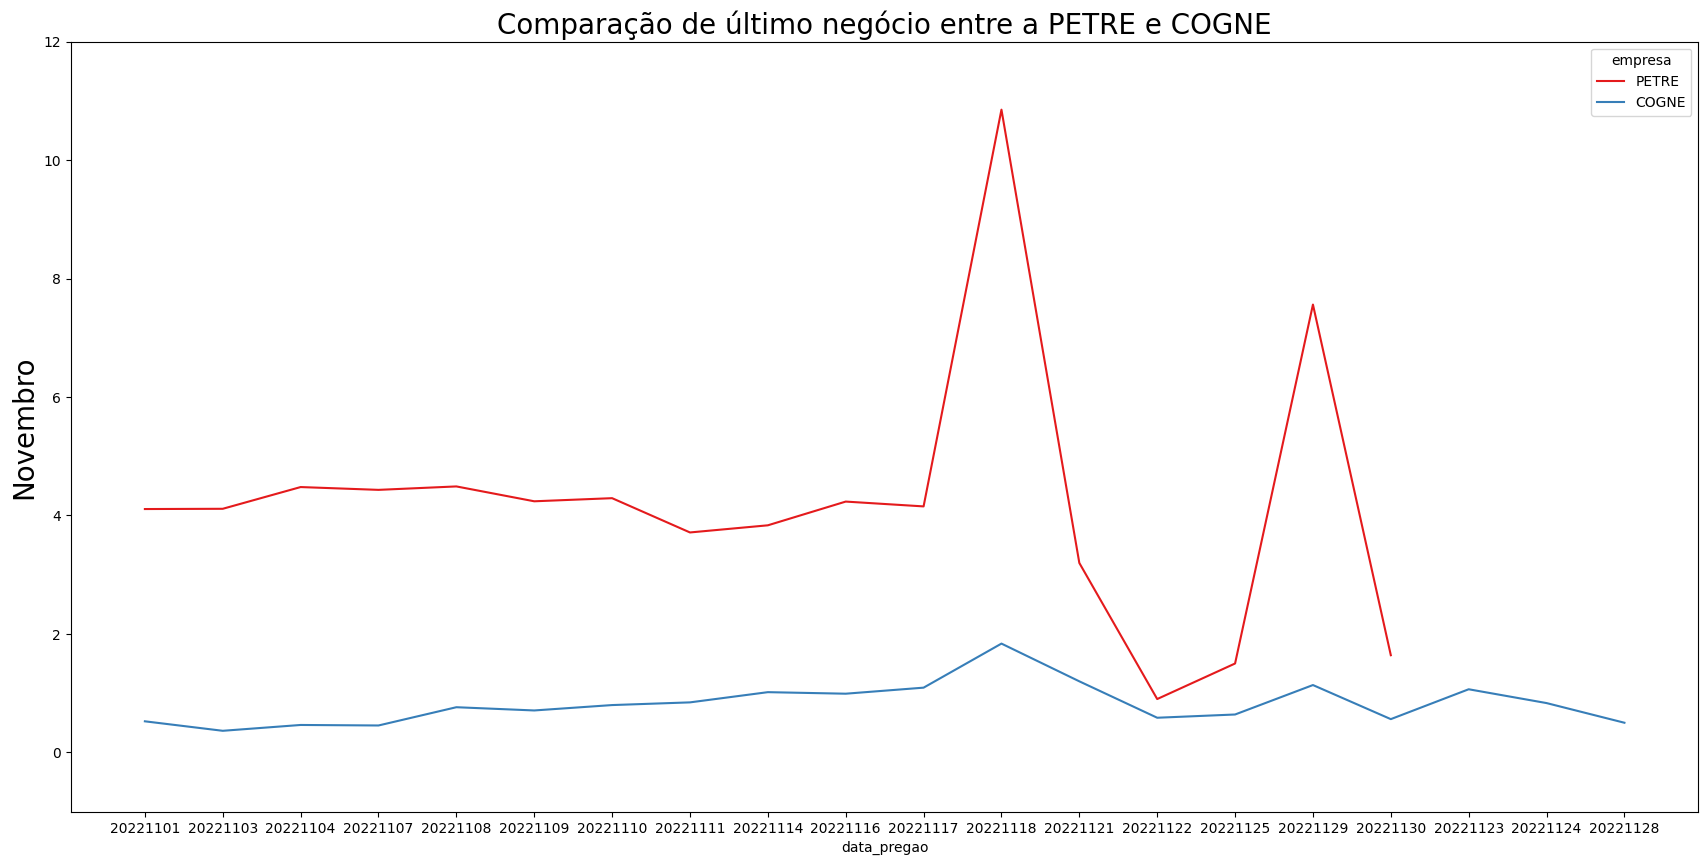

In [115]:
compare2 = pd.concat([empresa2_1, empresa2_5])
plt.figure(figsize=(21,10))
comparacao_ultimo_negocio2 = sns.lineplot(data=compare2, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None) # colocando o boxplot numa variável para manipular melhor
comparacao_ultimo_negocio2.set_ylabel('Novembro', fontsize=20) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

comparacao_ultimo_negocio2.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

plt.ylim(-1, 12)
# em R$ - Reais
plt.title('Comparação de último negócio entre a PETRE e COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

> A ação variou mais no mês de novembro, dia 18, porém variou ainda mais na PETRE do que na COGNE

### Comparing grouping of 2 companies (Comparando agrupamento em 2 empresas)

### Cogna

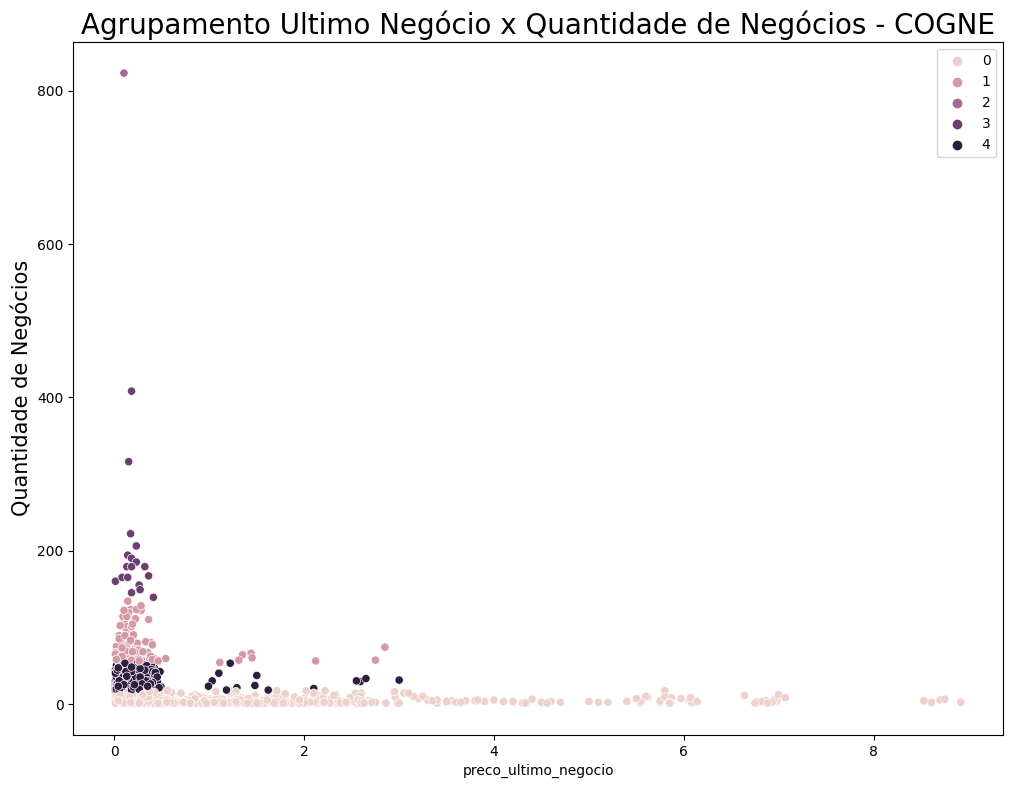

In [116]:
agrupar_cogna = sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansc.labels_)
agrupar_cogna.set_ylabel('Quantidade de Negócios', fontsize=15) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

agrupar_cogna.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Agrupamento Ultimo Negócio x Quantidade de Negócios - COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

Sem escala

### Petre

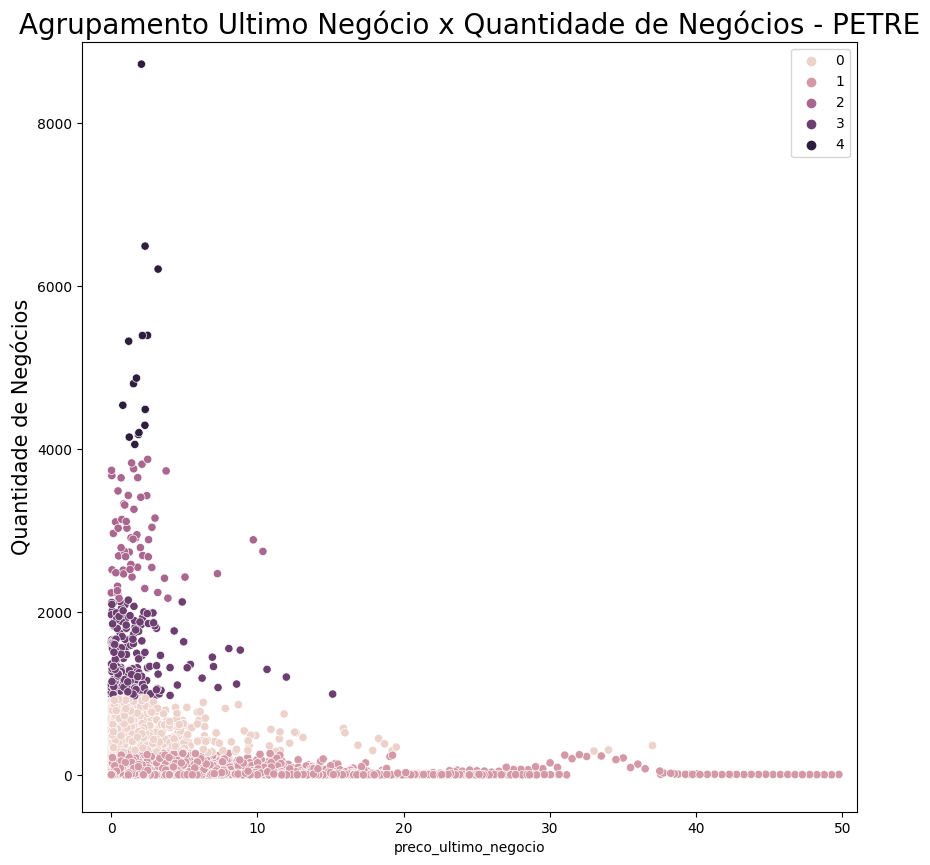

In [117]:
plt.figure(figsize=(10,10))
agrupar_petre = sns.scatterplot(data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansp.labels_)
agrupar_petre.set_ylabel('Quantidade de Negócios', fontsize=15) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

agrupar_petre.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.xlim(-2, 51)
plt.ylim(-450, 9000)
plt.title('Agrupamento Ultimo Negócio x Quantidade de Negócios - PETRE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

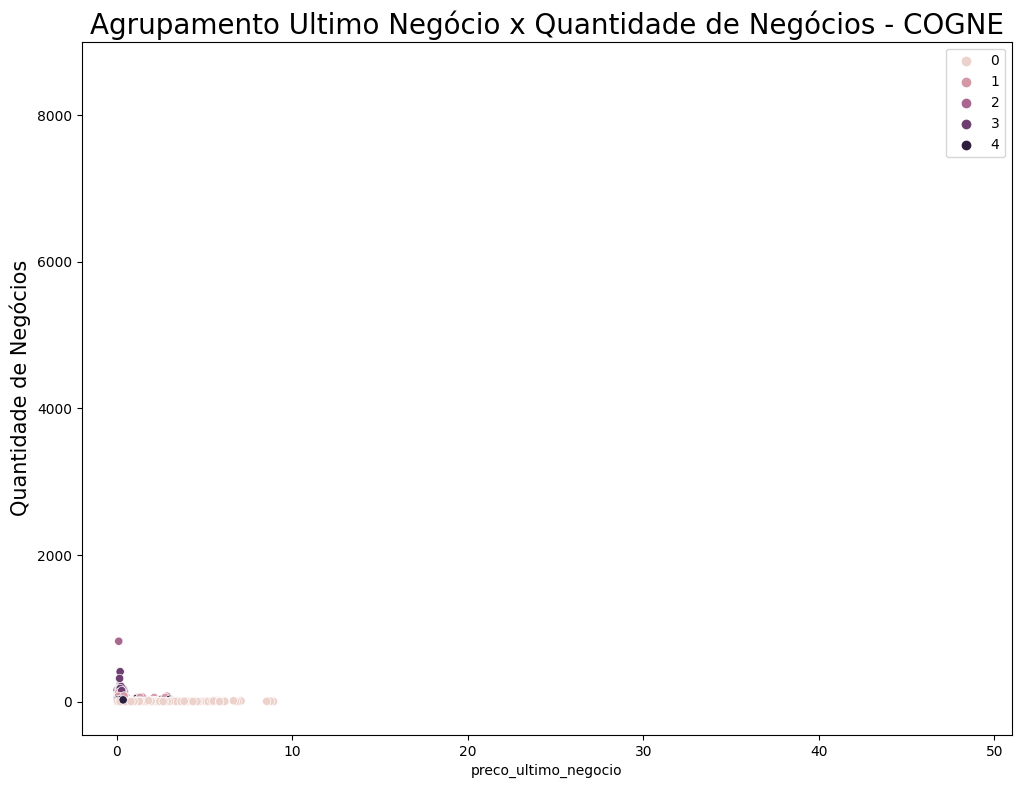

In [120]:
agrupar_cogna = sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansc.labels_)
agrupar_cogna.set_ylabel('Quantidade de Negócios', fontsize=15) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

agrupar_cogna.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.xlim(-2, 51)
plt.ylim(-450, 9000)
plt.title('Agrupamento Ultimo Negócio x Quantidade de Negócios - COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

> A Cogna ficou como parte do agrupamento "0" da Petrobrás, deixando mais visível a diferença de tamanho entre a empresa de petróleo x educação

<AxesSubplot: xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

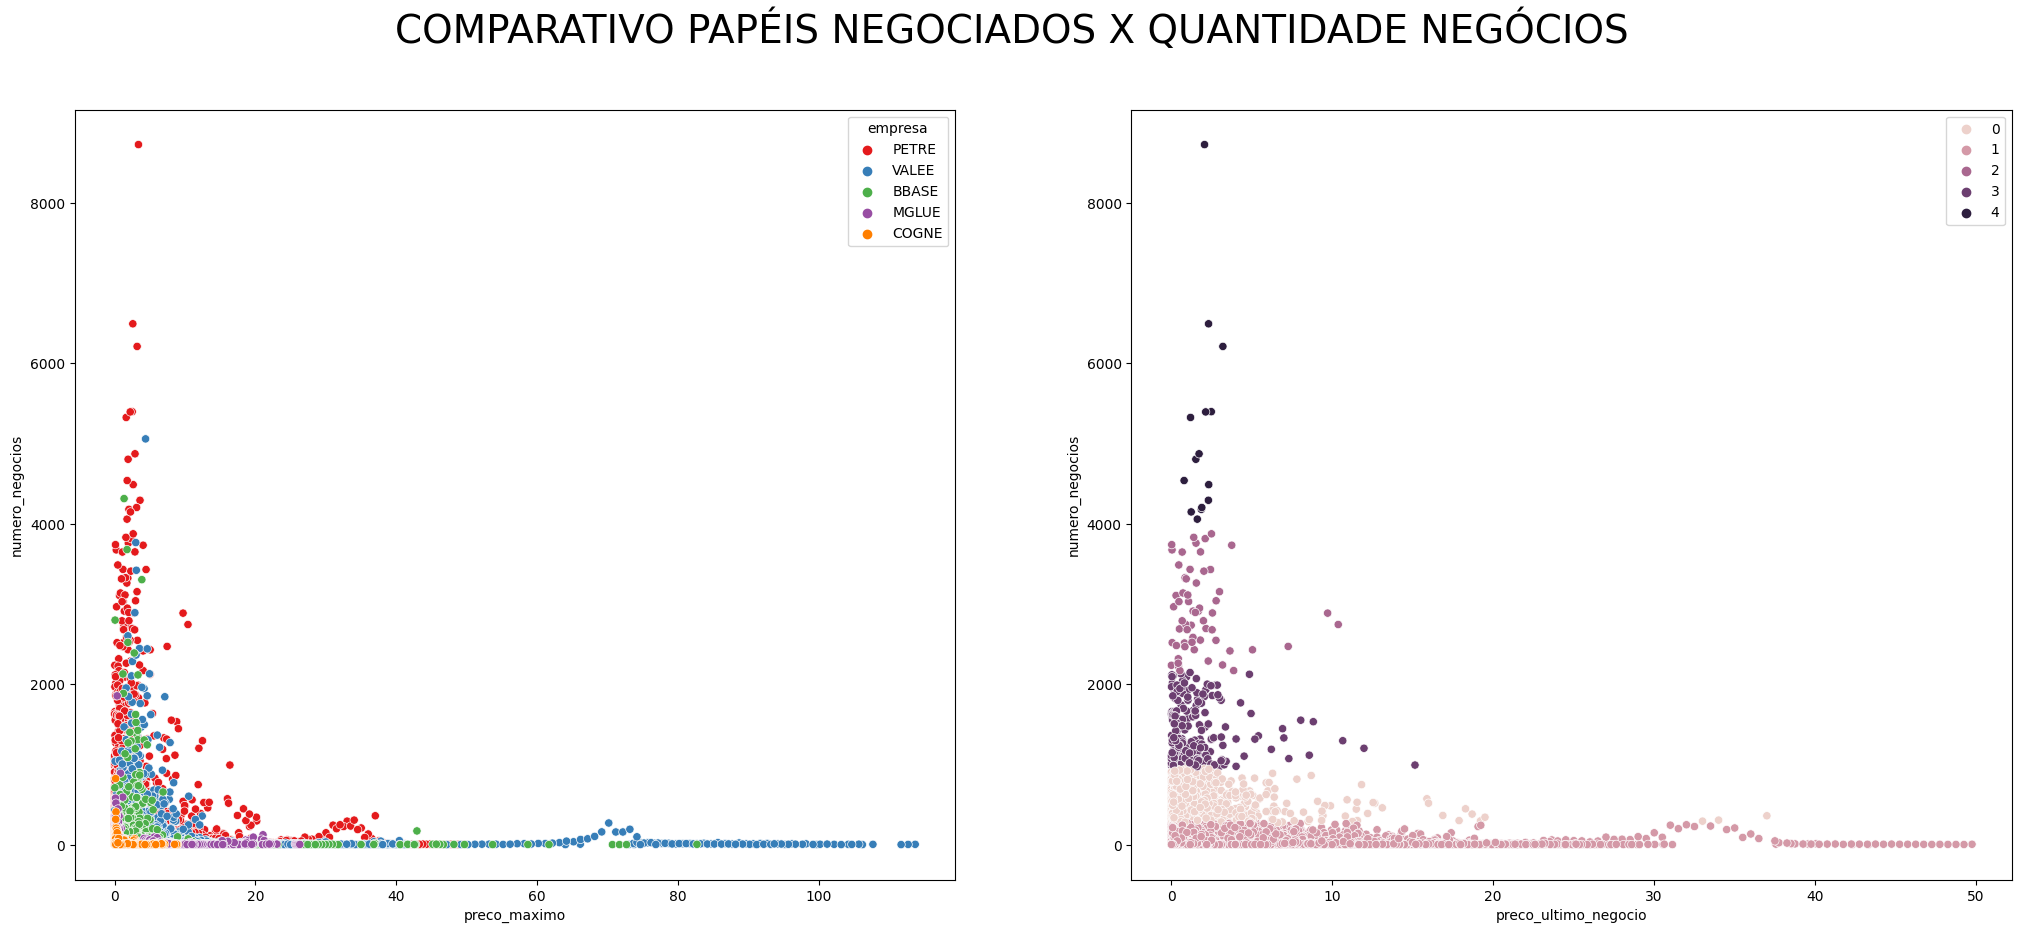

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle("COMPARATIVO PAPÉIS NEGOCIADOS X QUANTIDADE NEGÓCIOS", fontsize = 28)
sns.scatterplot(ax=axes[0], data=empresas, x='preco_maximo', y='numero_negocios', hue='empresa')
sns.scatterplot(ax=axes[1], data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansp.labels_)

<AxesSubplot: xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

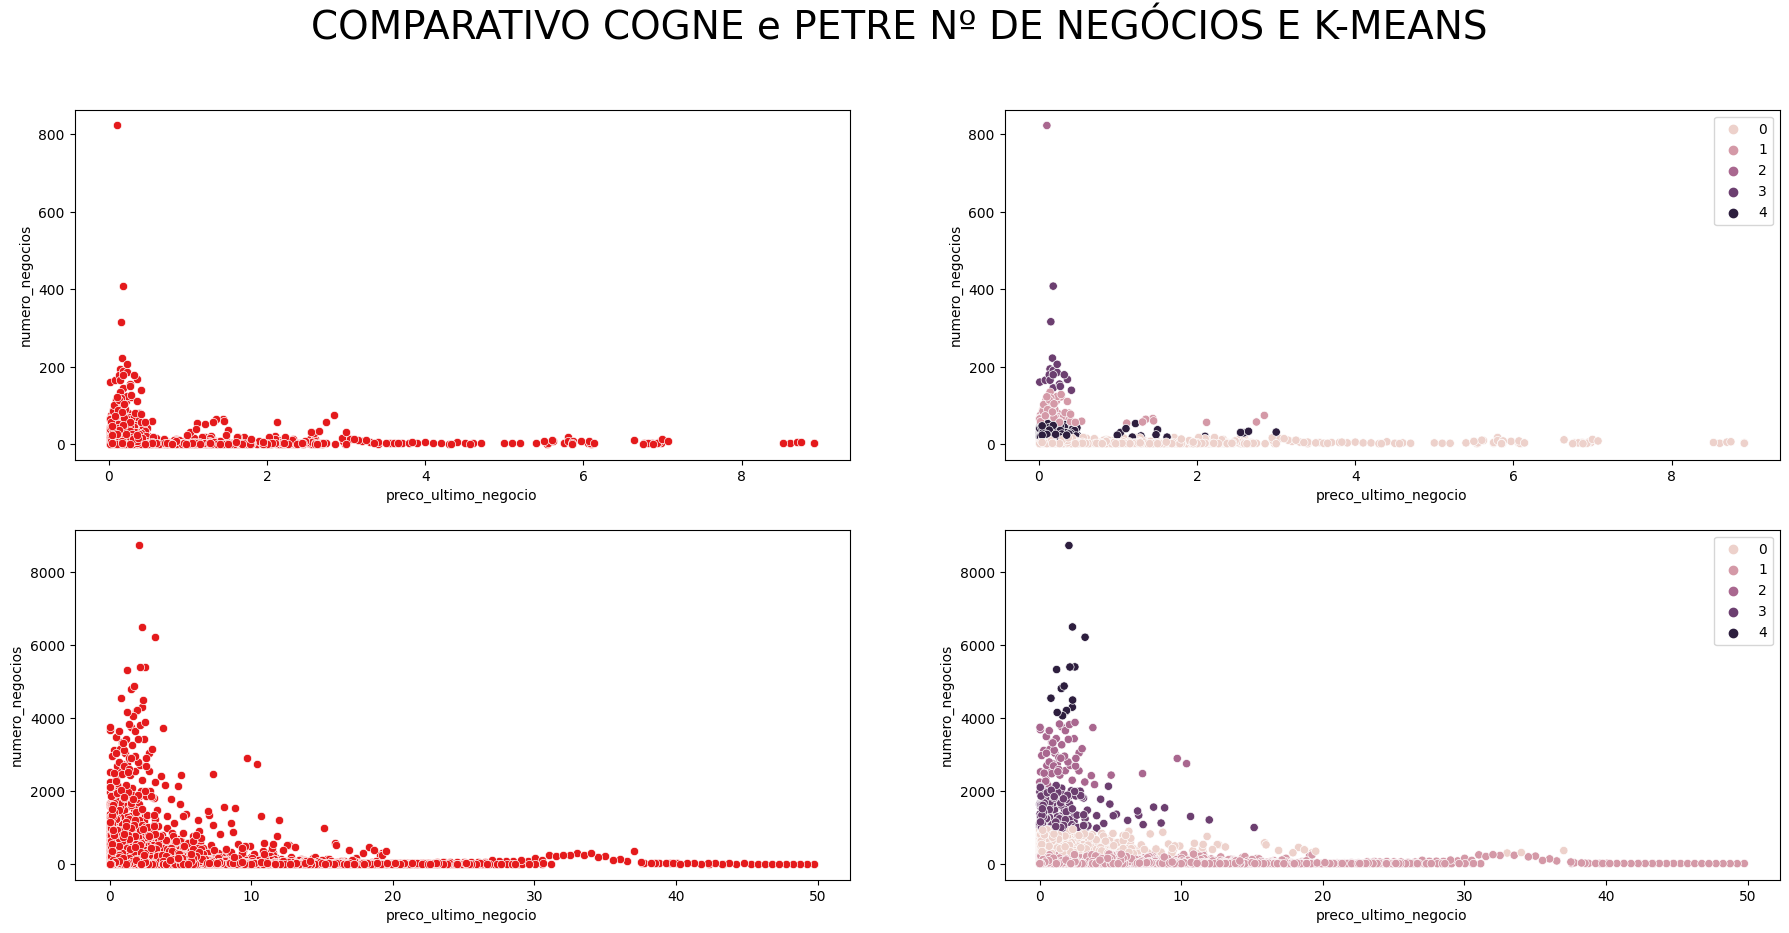

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))
fig.suptitle("COMPARATIVO COGNE e PETRE Nº DE NEGÓCIOS E K-MEANS", fontsize = 28)
sns.scatterplot(ax=axes[0,0], data=df2_group, x='preco_ultimo_negocio', y='numero_negocios')
sns.scatterplot(ax=axes[0,1], data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansc.labels_)
sns.scatterplot(ax=axes[1,0], data=df_group, x='preco_ultimo_negocio', y='numero_negocios')
sns.scatterplot(ax=axes[1,1], data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansp.labels_)

>Com escala

## >     Which company had the highest rate of change in price in the last deal?

This question can be answered in a few steps by reusing the anapy object created during preprocessing called companies_data_vm, this object has how metadata argument, the column "preco_ultimo_negocio", and your atributtes are variability measures, in this case we'll use variation coeficient to solve this problem

In [123]:
#Access variability measures for Petrobrás
companies_data_vm["PETRE"]

variance                                                      32.826294
standard deviation                                             5.729424
shifiting_range       [-40.21, -38.91, -38.53, -37.760000000000005, ...
CV                                                             1.395402
dtype: object

In [124]:
#access the CV of Petrobrás 
companies_data_vm["PETRE"]["CV"]

1.3954020477268407

In [134]:
#ELETROMIDIA is the first value in our object
biggiest = companies_data_vm["ELETROMIDIA"]["CV"]
#The max value be inside of companies_data_tc object
for companie in companies_data_vm:
    if(companies_data_vm[companie]["CV"] > biggiest):
        biggiest = companies_data_vm[companie]["CV"]
        biggiest_company = companie
    
company = biggiest_company , biggiest
company

('VIVT', 4.697339800105581)

as you can see the company with the highest rate of change for the value of the last trades is 'VIVT'


### Graphs

In [156]:
#empresas.groupby(by=['empresa'])['total'].sum()
companies_data_vm_df = pd.DataFrame(companies_data_vm)
companies_data_vm_df = companies_data_vm_df.sort_values(by="CV", ascending = False)

In [175]:
companies_data_vm_df = companies_data_vm_df[0:5] 
names = ['VIVT' , 'EGIE' , 'CCRO' , 'EQTLE' , 'RDOR'] 
companies_data_vm_df['company'] = names
companies_data_vm_df

variance standard deviation  \
VIVT   23.945662            4.89343   
EGIE    27.89033            5.28113   
CCRO    5.129778           2.264901   
EQTLE   4.830006           2.197727   
RDOR   24.194784           4.918819   

                                         shifiting_range        CV company  
VIVT   [-38.34, -4.34, -4.25, -3.3, -1.84, -1.7899999...   4.69734    VIVT  
EGIE   [-38.87, -38.82, -7.25, -4.49, -3.48, -2.87, -...  4.638991    EGIE  
CCRO   [-12.46, -1.48, -0.32999999999999996, -0.26, -...  4.252639    CCRO  
EQTLE  [-27.78, -1.79, -1.74, -1.73, -1.7000000000000...  3.804321   EQTLE  
RDOR   [-29.23, -1.73, -1.01, -0.99, -0.98, -0.82, -0...  3.662682    RDOR

<AxesSubplot: xlabel='company', ylabel='CV'>

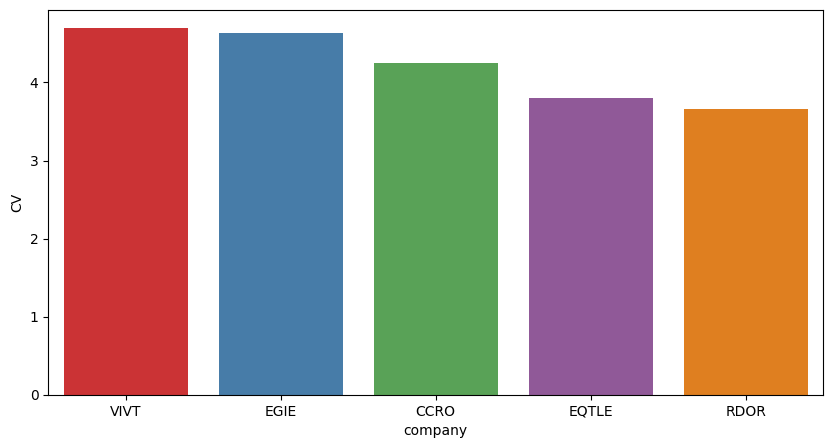

In [176]:
plt.figure(figsize=(10,5))
sns.barplot(data=companies_data_vm_df, x='company' ,  y="CV" )

## Conclusion

 #### Future works
 As an improvement and future work there is the possibility of improving the anapy library;
This library aims to provide less common but relevant static measures for the field of this analysis and these functions can be used in similar work in the business intelligence application domain <br>
     <p>An example of future improment is the modularization of the central_tendency_measures() function and also set_meta_data() to work with other datasets</p>